In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [209]:
df = pd.read_csv(r'C:/Users/U403439/Downloads/train_1.csv')

In [210]:
df.head()

Page  2015-07-01  2015-07-02  \
0            2NE1_zh.wikipedia.org_all-access_spider        18.0        11.0   
1             2PM_zh.wikipedia.org_all-access_spider        11.0        14.0   
2              3C_zh.wikipedia.org_all-access_spider         1.0         0.0   
3         4minute_zh.wikipedia.org_all-access_spider        35.0        13.0   
4  52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...         NaN         NaN   

   2015-07-03  2015-07-04  2015-07-05  2015-07-06  2015-07-07  2015-07-08  \
0         5.0        13.0        14.0         9.0         9.0        22.0   
1        15.0        18.0        11.0        13.0        22.0        11.0   
2         1.0         1.0         0.0         4.0         0.0         3.0   
3        10.0        94.0         4.0        26.0        14.0         9.0   
4         NaN         NaN         NaN         NaN         NaN         NaN   

   2015-07-09  ...  2016-12-22  2016-12-23  2016-12-24  2016-12-25  \
0        26.0  ...        32.0        63.0        15.0        26.0   
1        10.0  ...        17.0        42.0        28.0        15.0   
2         4.0  ...         3.0         1.0         1.0         7.0   
3        11.0  ...        32.0        10.0        26.0        27.0   
4         NaN  ...        48.0         9.0        25.0        13.0   

   2016-12-26  2016-12-27  2016-12-28  2016-12-29  2016-12-30  2016-12-31  
0        14.0        20.0        22.0        19.0        18.0        20.0  
1         9.0        30.0        52.0        45.0        26.0        20.0  
2         4.0         4.0         6.0         3.0         4.0        17.0  
3        16.0        11.0        17.0        19.0        10.0        11.0  
4         3.0        11.0        27.0        13.0        36.0        10.0  

[5 rows x 551 columns]

## **`Problem Statement`**

### We are given the per page view report for 145k different Wikipedia pages for 550 days. Our objective at Adease is to analyze and forecast the number of views, the client's can get on pages in different languages and on the basis of that, we can recommend few language pages which can get our client, the best Return on Investment (ROI).

## **`Observations on Data`**

- ### **Shape of Data:** There are 145063 rows and 551 columns in the data. Out of 551 columns, first column is "Page" and the other 550 columns are the dates starting from **"2015-07-01"** to **"2016-12-31"**

- ### **Data Types:** The column **"Page"** is of **"object datatype"** while the other 550 date columns are of **"float64 datatype"**

- ### **Data Statistics:** If we take a look at **"mean"** or **"median value (50th percentile)"** over the course of time, it seems to have a upward trend.

In [211]:
df.shape

(145063, 551)

In [212]:
df.dtypes

Page           object
2015-07-01    float64
2015-07-02    float64
2015-07-03    float64
2015-07-04    float64
               ...   
2016-12-27    float64
2016-12-28    float64
2016-12-29    float64
2016-12-30    float64
2016-12-31    float64
Length: 551, dtype: object

In [213]:
df.describe()

2015-07-01    2015-07-02    2015-07-03    2015-07-04    2015-07-05  \
count  1.243230e+05  1.242470e+05  1.245190e+05  1.244090e+05  1.244040e+05   
mean   1.195857e+03  1.204004e+03  1.133676e+03  1.170437e+03  1.217769e+03   
std    7.275352e+04  7.421515e+04  6.961022e+04  7.257351e+04  7.379612e+04   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    1.300000e+01  1.300000e+01  1.200000e+01  1.300000e+01  1.400000e+01   
50%    1.090000e+02  1.080000e+02  1.050000e+02  1.050000e+02  1.130000e+02   
75%    5.240000e+02  5.190000e+02  5.040000e+02  4.870000e+02  5.400000e+02   
max    2.038124e+07  2.075219e+07  1.957397e+07  2.043964e+07  2.077211e+07   

         2015-07-06    2015-07-07    2015-07-08    2015-07-09    2015-07-10  \
count  1.245800e+05  1.243990e+05  1.247690e+05  1.248190e+05  1.247210e+05   
mean   1.290273e+03  1.239137e+03  1.193092e+03  1.197992e+03  1.189651e+03   
std    8.054448e+04  7.576288e+04  6.820002e+04  7.149717e+04  7.214536e+04   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    1.100000e+01  1.300000e+01  1.300000e+01  1.400000e+01  1.400000e+01   
50%    1.130000e+02  1.150000e+02  1.170000e+02  1.150000e+02  1.130000e+02   
75%    5.550000e+02  5.510000e+02  5.540000e+02  5.490000e+02  5.450000e+02   
max    2.254467e+07  2.121089e+07  1.910791e+07  1.999385e+07  2.020182e+07   

       ...    2016-12-22    2016-12-23    2016-12-24    2016-12-25  \
count  ...  1.412100e+05  1.414790e+05  1.418740e+05  1.413190e+05   
mean   ...  1.394096e+03  1.377482e+03  1.393099e+03  1.523740e+03   
std    ...  8.574880e+04  7.732794e+04  8.478533e+04  8.752210e+04   
min    ...  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    ...  2.200000e+01  2.200000e+01  2.000000e+01  2.100000e+01   
50%    ...  1.490000e+02  1.430000e+02  1.320000e+02  1.450000e+02   
75%    ...  6.070000e+02  5.980000e+02  5.690000e+02  6.280000e+02   
max    ...  2.420108e+07  2.253925e+07  2.505662e+07  2.586575e+07   

         2016-12-26    2016-12-27    2016-12-28    2016-12-29    2016-12-30  \
count  1.411450e+05  1.413620e+05  1.412410e+05  1.412370e+05  1.414280e+05   
mean   1.679607e+03  1.678302e+03  1.633966e+03  1.684308e+03  1.467943e+03   
std    9.794534e+04  9.232482e+04  9.185831e+04  9.014266e+04  8.155481e+04   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    2.200000e+01  2.300000e+01  2.400000e+01  2.300000e+01  2.300000e+01   
50%    1.600000e+02  1.620000e+02  1.630000e+02  1.600000e+02  1.540000e+02   
75%    6.590000e+02  6.680000e+02  6.540000e+02  6.490000e+02  6.350000e+02   
max    2.834288e+07  2.691699e+07  2.702505e+07  2.607382e+07  2.436397e+07   

         2016-12-31  
count  1.415980e+05  
mean   1.478282e+03  
std    8.873567e+04  
min    0.000000e+00  
25%    2.100000e+01  
50%    1.360000e+02  
75%    5.610000e+02  
max    2.614954e+07  

[8 rows x 550 columns]

## **`Missing Values`**

- ### **Page :** There are 18536 (out of 145063 which is `13%`) pages for which the data is missing, more than 20 % of the times. We should just drop these records as imputing them would not be a good approach when more than 20 % of the data is missing.
- ### **Date :** The missing values are appearing more in the earlier time and decreasing with time.
- ### **Month of year :** The average number of missing values are more in January's, then starts gradually decreasing till June's where it is minimum. In July's, the nulls shoot abruptly and then starts decreasing again till December's.
- ### **Day of month :** The average number of missing values are more on 1st of every month, then starts gradually decreasing till 30th where it is minimum. On 31st, the nulls shoot abruptly.
- ### **Day of week :** The average number of missing values are maximum on Sundays and minimum on Saturdays.
### **`We can use linear interpolation to fill NaN's but in a smart way as follows. For a partcular page, we'll fill NaN's in Sundays with the average of the values in preceding and succeeding Sundays for the same page and same goes for each of the weekday. With this approach, we'll be much close to the actual trend`**

In [214]:
df[(df.isnull().sum(axis = 1) > 0.2 * 550)].reset_index(drop = True)

Page  2015-07-01  \
0      52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...         NaN   
1              91Days_zh.wikipedia.org_all-access_spider         NaN   
2             AlphaGo_zh.wikipedia.org_all-access_spider         NaN   
3           B-PROJECT_zh.wikipedia.org_all-access_spider         NaN   
4          BLACK_PINK_zh.wikipedia.org_all-access_spider         NaN   
...                                                  ...         ...   
18531  Underworld_(serie_de_películas)_es.wikipedia.o...         NaN   
18532  Resident_Evil:_Capítulo_Final_es.wikipedia.org...         NaN   
18533  Enamorándome_de_Ramón_es.wikipedia.org_all-acc...         NaN   
18534  Hasta_el_último_hombre_es.wikipedia.org_all-ac...         NaN   
18535  Francisco_el_matemático_(serie_de_televisión_d...         NaN   

       2015-07-02  2015-07-03  2015-07-04  2015-07-05  2015-07-06  2015-07-07  \
0             NaN         NaN         NaN         NaN         NaN         NaN   
1             NaN         NaN         NaN         NaN         NaN         NaN   
2             NaN         NaN         NaN         NaN         NaN         NaN   
3             NaN         NaN         NaN         NaN         NaN         NaN   
4             NaN         NaN         NaN         NaN         NaN         NaN   
...           ...         ...         ...         ...         ...         ...   
18531         NaN         NaN         NaN         NaN         NaN         NaN   
18532         NaN         NaN         NaN         NaN         NaN         NaN   
18533         NaN         NaN         NaN         NaN         NaN         NaN   
18534         NaN         NaN         NaN         NaN         NaN         NaN   
18535         NaN         NaN         NaN         NaN         NaN         NaN   

       2015-07-08  2015-07-09  ...  2016-12-22  2016-12-23  2016-12-24  \
0             NaN         NaN  ...        48.0         9.0        25.0   
1             NaN         NaN  ...         2.0         7.0        33.0   
2             NaN         NaN  ...        14.0        13.0        14.0   
3             NaN         NaN  ...         4.0        26.0        10.0   
4             NaN         NaN  ...        32.0        56.0        39.0   
...           ...         ...  ...         ...         ...         ...   
18531         NaN         NaN  ...         NaN         NaN         NaN   
18532         NaN         NaN  ...         NaN         NaN         NaN   
18533         NaN         NaN  ...         NaN         NaN         NaN   
18534         NaN         NaN  ...         NaN         NaN         NaN   
18535         NaN         NaN  ...         NaN         NaN         NaN   

       2016-12-25  2016-12-26  2016-12-27  2016-12-28  2016-12-29  2016-12-30  \
0            13.0         3.0        11.0        27.0        13.0        36.0   
1             8.0        11.0         4.0        15.0         6.0         8.0   
2            17.0        19.0        56.0        21.0        13.0        21.0   
3             5.0         5.0        11.0        10.0         4.0         8.0   
4            65.0        78.0       143.0        96.0        63.0        28.0   
...           ...         ...         ...         ...         ...         ...   
18531         NaN        13.0        12.0        13.0         3.0         5.0   
18532         NaN         NaN         NaN         NaN         NaN         NaN   
18533         NaN         NaN         NaN         NaN         NaN         NaN   
18534         NaN         NaN         NaN         NaN         NaN         NaN   
18535         NaN         NaN         NaN         NaN         NaN         NaN   

       2016-12-31  
0            10.0  
1             6.0  
2            11.0  
3             6.0  
4            75.0  
...           ...  
18531        10.0  
18532         NaN  
18533         NaN  
18534         NaN  
18535         NaN  

[18536 rows x 551 columns]

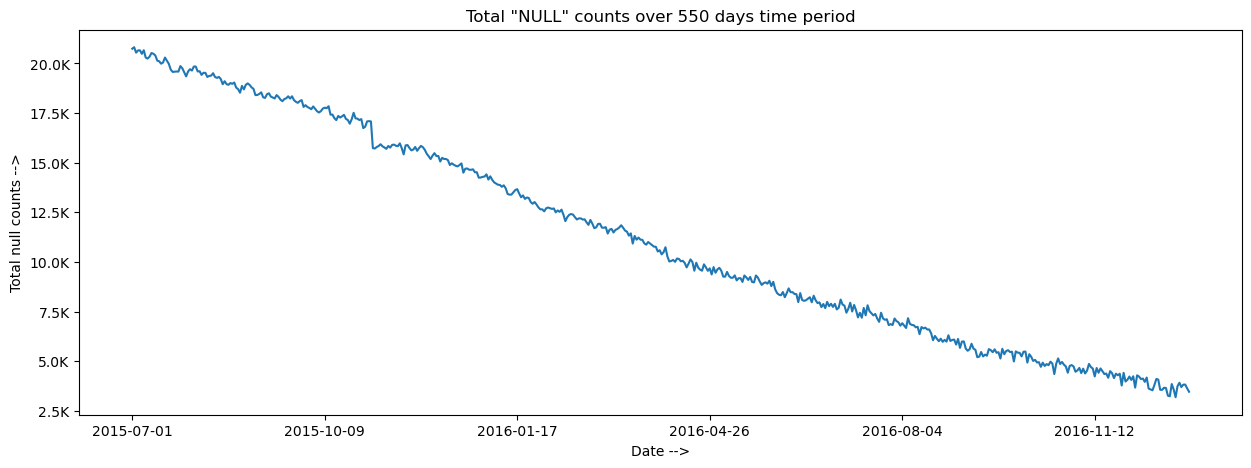

In [215]:
plt.figure(figsize = (15, 5))
df.iloc[:, 1:].isnull().sum(axis = 0).plot()
plt.xlabel('Date -->')
plt.ylabel('Total null counts -->')
plt.yticks(ticks = range(2500, 22500, 2500), 
           labels = [str(round((i/1000), 1)) + 'K' for i in range(2500, 22500, 2500)])
plt.title('Total "NULL" counts over 550 days time period')
plt.show()

In [216]:
month_wise_null_cnt = df.iloc[:, 1:].isnull().sum(axis = 0).to_frame('null_count')\
                                                           .reset_index().rename(columns = {'index': 'date'})
month_wise_null_cnt['date'] = month_wise_null_cnt['date'].astype('datetime64[ns]')
month_wise_null_cnt['month'] = month_wise_null_cnt['date'].dt.month
month_wise_null_cnt['month_name'] = month_wise_null_cnt['date'].dt.month_name()

In [217]:
plt.figure(figsize = (15, 5))
month_wise_null_cnt.groupby('month')['null_count'].mean().plot()
plt.xticks(ticks = range(1, 13), labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                                           'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.yticks(ticks = range(8000, 15000, 1000), 
           labels = [str(round((i/1000))) + 'K' for i in range(8000, 15000, 1000)])
plt.title('Mean "NULL" counts by month of year')
plt.xlabel('Month -->')
plt.ylabel('Mean null counts -->')
plt.title('Mean "NULL" counts by month of year')
plt.show()

In [218]:
day_wise_null_cnt = df.iloc[:, 1:].isnull().sum(axis = 0).to_frame('null_count')\
                                                         .reset_index().rename(columns = {'index': 'date'})
day_wise_null_cnt['date'] = day_wise_null_cnt['date'].astype('datetime64[ns]')
day_wise_null_cnt['day'] = day_wise_null_cnt['date'].dt.day
day_wise_null_cnt['weekday_name'] = day_wise_null_cnt['date'].dt.day_name()
day_wise_null_cnt['weekday'] = day_wise_null_cnt['date'].dt.weekday

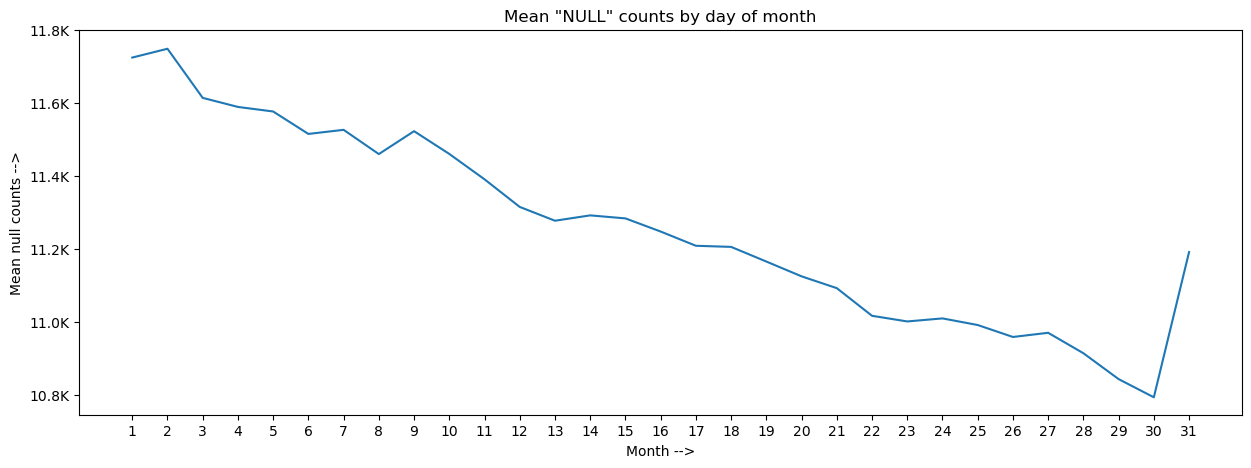

In [219]:
plt.figure(figsize = (15, 5))
day_wise_null_cnt.groupby('day')['null_count'].mean().plot()
plt.xticks(range(1, 32))
plt.yticks(ticks = range(10800, 12000, 200), 
           labels = [str(round((i/1000), 1)) + 'K' for i in range(10800, 12000, 200)])
plt.xlabel('Month -->')
plt.ylabel('Mean null counts -->')
plt.title('Mean "NULL" counts by day of month')
plt.show()

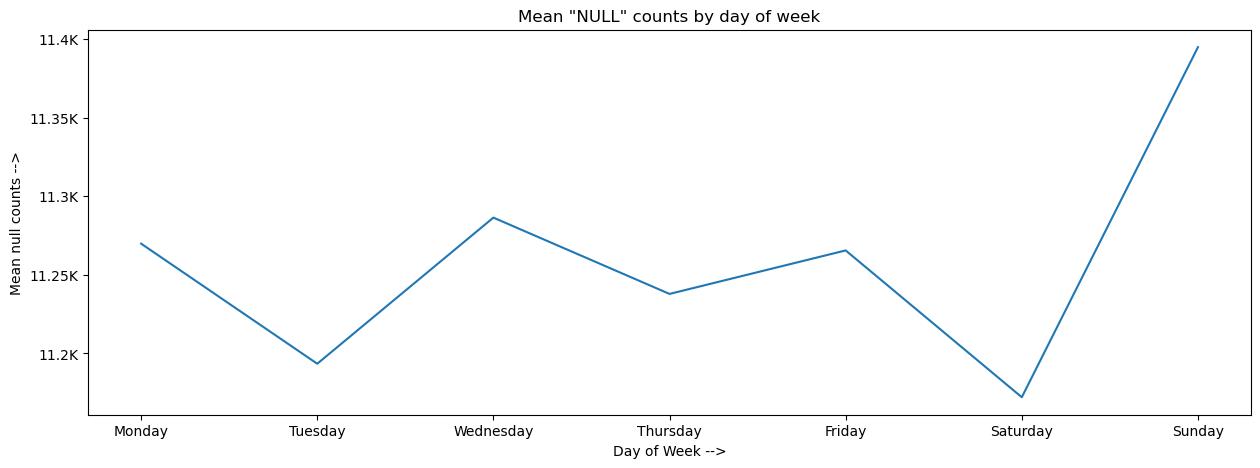

In [220]:
plt.figure(figsize = (15, 5))
null_cnt_by_weekday = day_wise_null_cnt.groupby(['weekday', 'weekday_name'])\
                                                ['null_count'].mean().reset_index()
plt.plot(null_cnt_by_weekday['weekday_name'], null_cnt_by_weekday['null_count'])
plt.yticks(ticks = range(11200, 11450, 50), 
           labels = [str(round((i/1000), 2)) + 'K' for i in range(11200, 11450, 50)])
plt.xlabel('Day of Week -->')
plt.ylabel('Mean null counts -->')
plt.title('Mean "NULL" counts by day of week')
plt.show()

In [221]:
df['language'] = df['Page'].str.split('_').str[-3].str.split('.').str[0]
df['access_origin'] = df['Page'].str.split('_').str[-1]
df['access_type'] = df['Page'].str.split('_').str[-2]

In [222]:
df['access_type'].value_counts()

all-access    74315
mobile-web    35939
desktop       34809
Name: access_type, dtype: int64

In [223]:
df['access_origin'].value_counts()

all-agents    110150
spider         34913
Name: access_origin, dtype: int64

In [224]:
df['language'].value_counts()

en         24108
ja         20431
de         18547
fr         17802
zh         17229
ru         15022
es         14069
commons    10555
www         7300
Name: language, dtype: int64

In [225]:
df.loc[df['language'] == 'www', 'Page']

19611    "Keep_me_logged_in"_extended_to_one_year_www.m...
19612    2017_wikitext_editor_www.mediawiki.org_all-acc...
19613    2017_wikitext_editor/Feedback_www.mediawiki.or...
19614          API_www.mediawiki.org_all-access_all-agents
19615    API:Account_creation_www.mediawiki.org_all-acc...
                               ...                        
84730    help:contents_www.mediawiki.org_all-access_spider
84731    how_to_contribute_www.mediawiki.org_all-access...
84732        mediawiki_www.mediawiki.org_all-access_spider
84733     special:book_www.mediawiki.org_all-access_spider
84734    special:translate_www.mediawiki.org_all-access...
Name: Page, Length: 7300, dtype: object

### **Dropping the records for those pages for which more than 20 % of the values are missing**

In [18]:
df.drop(df[(df.loc[:, '2015-07-01': '2016-12-31'].isnull().sum(axis = 1) > 0.2 * 550)].index,
        inplace = True)
df.reset_index(drop = True, inplace = True)

In [19]:
df.head()

Page  2015-07-01  2015-07-02  \
0     2NE1_zh.wikipedia.org_all-access_spider        18.0        11.0   
1      2PM_zh.wikipedia.org_all-access_spider        11.0        14.0   
2       3C_zh.wikipedia.org_all-access_spider         1.0         0.0   
3  4minute_zh.wikipedia.org_all-access_spider        35.0        13.0   
4     5566_zh.wikipedia.org_all-access_spider        12.0         7.0   

   2015-07-03  2015-07-04  2015-07-05  2015-07-06  2015-07-07  2015-07-08  \
0         5.0        13.0        14.0         9.0         9.0        22.0   
1        15.0        18.0        11.0        13.0        22.0        11.0   
2         1.0         1.0         0.0         4.0         0.0         3.0   
3        10.0        94.0         4.0        26.0        14.0         9.0   
4         4.0         5.0        20.0         8.0         5.0        17.0   

   2015-07-09  ...  2016-12-25  2016-12-26  2016-12-27  2016-12-28  \
0        26.0  ...        26.0        14.0        20.0        22.0   
1        10.0  ...        15.0         9.0        30.0        52.0   
2         4.0  ...         7.0         4.0         4.0         6.0   
3        11.0  ...        27.0        16.0        11.0        17.0   
4        24.0  ...        17.0        32.0        19.0        23.0   

   2016-12-29  2016-12-30  2016-12-31  language  access_origin  access_type  
0        19.0        18.0        20.0        zh         spider   all-access  
1        45.0        26.0        20.0        zh         spider   all-access  
2         3.0         4.0        17.0        zh         spider   all-access  
3        19.0        10.0        11.0        zh         spider   all-access  
4        17.0        17.0        50.0        zh         spider   all-access  

[5 rows x 554 columns]

## **`Missing Value Treatment:`**
#### For filling NaN's, we have chosen an unconventional approach which is as follows:
- #### **`Step 1 -->`** we have created a new DataFrame **"df_filled_by_interpolation"** filling NaN's using **.interpolate()** method with **limit_direction = "both"** which will approximate the mean of first previous and first next non null values.

#### **`But there's one minor issue that we haven't taken any weekly seasonality into account while doing this.`**

- #### **`Step 2 -->`** For each missing value, we have iterating over the time series to find out the previous and next non missing value with the same weekday (to previously weekly seasonality) limiting the search space upto 4 weeks only (in either direction) to ensure minimal change in trend.Next, we impute the missing value with the mean of previous and next non missing value. Create a new DataFrame **"df_filled_by_weekday"** out of this.

- #### **`Step 3 -->`** Take the average of these two DataFrames to get the final DataFrame **"imputed_df"**

In [20]:
df_filled_by_interpolation = df.set_index('Page').T.loc['2015-07-01':'2016-12-31', :]
df_filled_by_interpolation.index = (df_filled_by_interpolation.index).astype('datetime64[ns]')
df_filled_by_interpolation = df_filled_by_interpolation.astype('float64').interpolate(limit_direction = 'both')

In [21]:
df_filled_by_weekday = df.set_index('Page').T.loc['2015-07-01':'2016-12-31', :]
df_filled_by_weekday.index = (df_filled_by_weekday.index).astype('datetime64[ns]')
df_filled_by_weekday = df_filled_by_weekday.astype('float64')

In [22]:
def interpolate_by_weekday(df):
    for page in df.columns:
        for date in df.index:
            if np.isnan(df.loc[date, page]):
                weekly_prev_not_null_val = np.nan
                weekly_next_not_null_val = np.nan
                imputed_val = np.nan
                week_cnt = 1
                prev_date = date
                next_date = date
                min_date = min(df.index)
                max_date = max(df.index)
                while min_date <= prev_date <= max_date and min_date <= next_date <= max_date:
                    prev_date = date - pd.Timedelta(weeks = week_cnt)
                    next_date = date + pd.Timedelta(weeks = week_cnt)
                    if prev_date >= min_date and prev_date <= max_date:
                        prev_week_val = df.loc[prev_date, page]
                    else:
                        prev_week_val = np.nan
                    if next_date >= min_date and next_date <= max_date:
                        next_week_val = df.loc[next_date, page]
                    else:
                        next_week_val = np.nan
                    if np.isnan(weekly_prev_not_null_val) and not np.isnan(prev_week_val):
                        weekly_prev_not_null_val = prev_week_val
                    if np.isnan(weekly_next_not_null_val) and not np.isnan(next_week_val):
                        weekly_next_not_null_val = next_week_val
                    if not (np.isnan(weekly_prev_not_null_val) or np.isnan(weekly_next_not_null_val)):
                        break
                    else:
                        week_cnt += 1
                if np.isnan(weekly_prev_not_null_val) and not np.isnan(weekly_next_not_null_val):
                    imputed_val = weekly_next_not_null_val
                elif np.isnan(weekly_next_not_null_val) and not np.isnan(weekly_prev_not_null_val):
                    imputed_val = weekly_prev_not_null_val
                else:
                    if not np.isnan(weekly_next_not_null_val) and not np.isnan(weekly_prev_not_null_val):
                        imputed_val = (weekly_prev_not_null_val + weekly_next_not_null_val)/2

                df.loc[date, page] = imputed_val

In [23]:
interpolate_by_weekday(df_filled_by_weekday)

In [25]:
imputed_df = ((df_filled_by_interpolation + df_filled_by_weekday)/2).round().T

In [226]:
imputed_df.head()

2015-07-01  2015-07-02  \
Page                                                                 
2NE1_zh.wikipedia.org_all-access_spider           18.0        11.0   
2PM_zh.wikipedia.org_all-access_spider            11.0        14.0   
3C_zh.wikipedia.org_all-access_spider              1.0         0.0   
4minute_zh.wikipedia.org_all-access_spider        35.0        13.0   
5566_zh.wikipedia.org_all-access_spider           12.0         7.0   

                                            2015-07-03  2015-07-04  \
Page                                                                 
2NE1_zh.wikipedia.org_all-access_spider            5.0        13.0   
2PM_zh.wikipedia.org_all-access_spider            15.0        18.0   
3C_zh.wikipedia.org_all-access_spider              1.0         1.0   
4minute_zh.wikipedia.org_all-access_spider        10.0        94.0   
5566_zh.wikipedia.org_all-access_spider            4.0         5.0   

                                            2015-07-05  2015-07-06  \
Page                                                                 
2NE1_zh.wikipedia.org_all-access_spider           14.0         9.0   
2PM_zh.wikipedia.org_all-access_spider            11.0        13.0   
3C_zh.wikipedia.org_all-access_spider              0.0         4.0   
4minute_zh.wikipedia.org_all-access_spider         4.0        26.0   
5566_zh.wikipedia.org_all-access_spider           20.0         8.0   

                                            2015-07-07  2015-07-08  \
Page                                                                 
2NE1_zh.wikipedia.org_all-access_spider            9.0        22.0   
2PM_zh.wikipedia.org_all-access_spider            22.0        11.0   
3C_zh.wikipedia.org_all-access_spider              0.0         3.0   
4minute_zh.wikipedia.org_all-access_spider        14.0         9.0   
5566_zh.wikipedia.org_all-access_spider            5.0        17.0   

                                            2015-07-09  2015-07-10  ...  \
Page                                                                ...   
2NE1_zh.wikipedia.org_all-access_spider           26.0        24.0  ...   
2PM_zh.wikipedia.org_all-access_spider            10.0         4.0  ...   
3C_zh.wikipedia.org_all-access_spider              4.0         4.0  ...   
4minute_zh.wikipedia.org_all-access_spider        11.0        16.0  ...   
5566_zh.wikipedia.org_all-access_spider           24.0         7.0  ...   

                                            2016-12-22  2016-12-23  \
Page                                                                 
2NE1_zh.wikipedia.org_all-access_spider           32.0        63.0   
2PM_zh.wikipedia.org_all-access_spider            17.0        42.0   
3C_zh.wikipedia.org_all-access_spider              3.0         1.0   
4minute_zh.wikipedia.org_all-access_spider        32.0        10.0   
5566_zh.wikipedia.org_all-access_spider           16.0        27.0   

                                            2016-12-24  2016-12-25  \
Page                                                                 
2NE1_zh.wikipedia.org_all-access_spider           15.0        26.0   
2PM_zh.wikipedia.org_all-access_spider            28.0        15.0   
3C_zh.wikipedia.org_all-access_spider              1.0         7.0   
4minute_zh.wikipedia.org_all-access_spider        26.0        27.0   
5566_zh.wikipedia.org_all-access_spider            8.0        17.0   

                                            2016-12-26  2016-12-27  \
Page                                                                 
2NE1_zh.wikipedia.org_all-access_spider           14.0        20.0   
2PM_zh.wikipedia.org_all-access_spider             9.0        30.0   
3C_zh.wikipedia.org_all-access_spider              4.0         4.0   
4minute_zh.wikipedia.org_all-access_spider        16.0        11.0   
5566_zh.wikipedia.org_all-access_spider           32.0        19.0   

                                            2016-12-28  2016-12-29  \
Page       

### **Filling the imputed values in the original DataFrame `"new_df"`**

In [26]:
df.loc[:, '2015-07-01': '2016-12-31'] = imputed_df.loc[:, '2015-07-01': '2016-12-31'].values

In [27]:
df_melt = pd.melt(new_df.drop(columns = 'Page'), 
                  id_vars = ['language', 'access_origin', 'access_type'],
                  var_name = 'date', value_name = 'visits')

In [28]:
df_melt['quarter'] = df_melt['date'].astype('datetime64[ns]').dt.quarter
df_melt['year'] = df_melt['date'].astype('datetime64[ns]').dt.year
df_melt['month'] = df_melt['date'].astype('datetime64[ns]').dt.month
df_melt['YYYY-MM'] = df_melt['year'].astype('str') + '-' + df_melt['month']\
                                    .apply(lambda x: '0' + str(x) if 1 <= x <= 9 else str(x))
df_melt['QQ-YYYY'] = 'Q' + df_melt['quarter'].astype('str') + '-' + df_melt['year'].astype('str')

In [30]:
df_melt.head()

language access_origin access_type        date  visits  quarter  year  \
0       zh        spider  all-access  2015-07-01    18.0        3  2015   
1       zh        spider  all-access  2015-07-01    11.0        3  2015   
2       zh        spider  all-access  2015-07-01     1.0        3  2015   
3       zh        spider  all-access  2015-07-01    35.0        3  2015   
4       zh        spider  all-access  2015-07-01    12.0        3  2015   

   month  YYYY-MM  QQ-YYYY  
0      7  2015-07  Q3-2015  
1      7  2015-07  Q3-2015  
2      7  2015-07  Q3-2015  
3      7  2015-07  Q3-2015  
4      7  2015-07  Q3-2015

In [31]:
visits_by_lang_month = df_melt.groupby(['YYYY-MM', 'language'])\
                              .agg(total_visits_by_language = ('visits', 'sum'),
                                   mean_visits_by_language = ('visits', 'mean')).reset_index()
visits_by_lang_quarter = df_melt.groupby(['QQ-YYYY', 'language'])\
                                .agg(total_visits_by_language = ('visits', 'sum'),
                                     mean_visits_by_language = ('visits', 'mean')).reset_index()

In [32]:
visits_by_lang_month.head(2)

YYYY-MM language  total_visits_by_language  mean_visits_by_language
0  2015-07  commons                40519347.0               184.745683
1  2015-07       de               427037266.0               820.403530

In [33]:
visits_by_lang_quarter.head(2)

QQ-YYYY language  total_visits_by_language  mean_visits_by_language
0  Q1-2016  commons              1.431137e+08               222.286628
1  Q1-2016       de              1.618043e+09              1058.941740

In [34]:
visits_by_acc_orig_month = df_melt.groupby(['YYYY-MM', 'access_origin'])\
                                  .agg(total_visits_by_access_origin = ('visits', 'sum'),
                                       mean_visits_by_access_origin = ('visits', 'mean')).reset_index()
visits_by_acc_orig_quarter = df_melt.groupby(['QQ-YYYY', 'access_origin'])\
                                    .agg(total_visits_by_access_origin = ('visits', 'sum'),
                                         mean_visits_by_access_origin = ('visits', 'mean')).reset_index()

In [35]:
visits_by_acc_orig_month.head(2)

YYYY-MM access_origin  total_visits_by_access_origin  \
0  2015-07    all-agents                   4.625708e+09   
1  2015-07        spider                   2.184379e+07   

   mean_visits_by_access_origin  
0                   1557.679982  
1                     22.927741

In [36]:
visits_by_acc_orig_quarter.head(2)

QQ-YYYY access_origin  total_visits_by_access_origin  \
0  Q1-2016    all-agents                   1.721710e+10   
1  Q1-2016        spider                   2.071807e+08   

   mean_visits_by_access_origin  
0                   1975.060081  
1                     74.080329

In [37]:
visits_by_acc_type_month = df_melt.groupby(['YYYY-MM', 'access_type'])\
                                  .agg(total_visits_by_access_type = ('visits', 'sum'),
                                       mean_visits_by_access_type = ('visits', 'mean')).reset_index()
visits_by_acc_type_quarter = df_melt.groupby(['QQ-YYYY', 'access_type'])\
                                    .agg(total_visits_by_access_type = ('visits', 'sum'),
                                         mean_visits_by_access_type = ('visits', 'mean')).reset_index()

In [38]:
visits_by_acc_type_month.head(2)

YYYY-MM access_type  total_visits_by_access_type  \
0  2015-07  all-access                 2.343044e+09   
1  2015-07     desktop                 1.208294e+09   

   mean_visits_by_access_type  
0                 1164.251949  
1                 1300.845616

In [39]:
visits_by_acc_type_quarter.head(2)

QQ-YYYY access_type  total_visits_by_access_type  \
0  Q1-2016  all-access                 8.801166e+09   
1  Q1-2016     desktop                 4.501788e+09   

   mean_visits_by_access_type  
0                 1489.796744  
1                 1651.042851

In [40]:
access_orig_by_lang = df.groupby('language')['access_origin']\
                                            .value_counts(normalize = True)\
                                            .to_frame('pct_pages').reset_index()
access_orig_by_lang['pct_pages'] = (access_orig_by_lang['pct_pages'] * 100).round(1)

In [41]:
access_orig_by_lang.head(2)

language access_origin  pct_pages
0  commons    all-agents       75.6
1  commons        spider       24.4

In [42]:
access_type_by_lang = df.groupby('language')['access_type']\
                                            .value_counts(normalize = True)\
                                            .to_frame('pct_pages').reset_index()
access_type_by_lang['pct_pages'] = (access_type_by_lang['pct_pages'] * 100).round(1)

In [43]:
access_type_by_lang.head(3)

language access_type  pct_pages
0  commons  all-access       48.7
1  commons  mobile-web       26.5
2  commons     desktop       24.7

## **`EXPLORATORY DATA ANALYSIS`**

### 1. **`English i.e. "en", Spanish i.e. "es", and Russian i.e. "ru"`** are the top 3 languages in terms of mean visits over all the quarters.

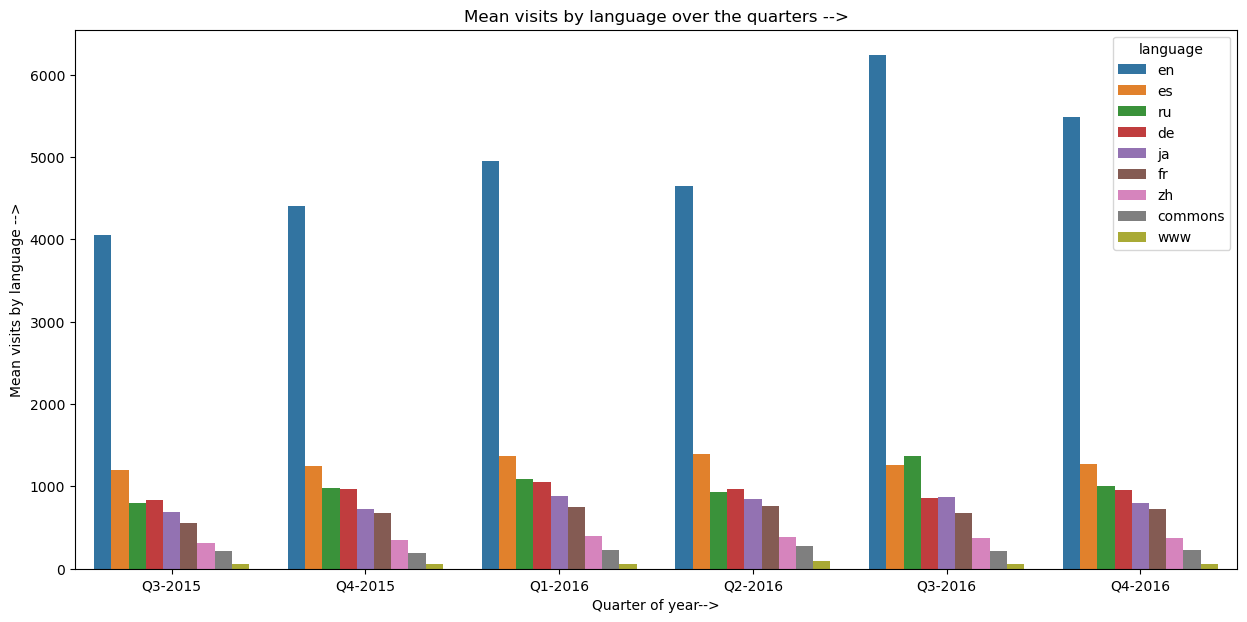

In [44]:
plt.figure(figsize = (15, 7))
sns.barplot(x = visits_by_lang_quarter['QQ-YYYY'], y = visits_by_lang_quarter['mean_visits_by_language'],
            order = ['Q3-2015', 'Q4-2015'] + ['Q' + str(i) + '-2016' for i in range(1, 5)], 
            hue = visits_by_lang_quarter['language'], 
            hue_order = ['en', 'es', 'ru', 'de', 'ja', 'fr', 'zh', 'commons', 'www'])
plt.xlabel('Quarter of year-->')
plt.ylabel('Mean visits by language -->')
plt.title('Mean visits by language over the quarters -->')
plt.show()

### 2. Access origin **`all-agents`** has very very high mean visits as compared to **`spider`** over all the quarters.

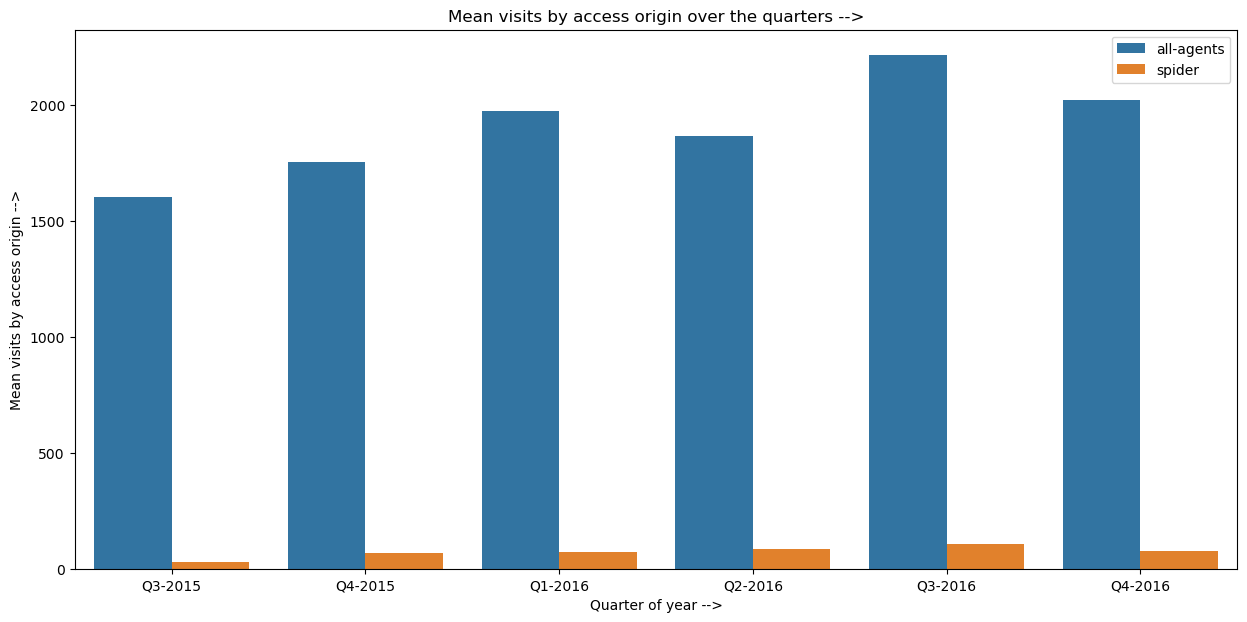

In [45]:
plt.figure(figsize = (15, 7))
sns.barplot(x = visits_by_acc_orig_quarter['QQ-YYYY'], y = visits_by_acc_orig_quarter['mean_visits_by_access_origin'],
            order = ['Q3-2015', 'Q4-2015'] + ['Q' + str(i) + '-2016' for i in range(1, 5)],
            hue = visits_by_acc_orig_quarter['access_origin'], hue_order = ['all-agents', 'spider'])
plt.xlabel('Quarter of year -->')
plt.ylabel('Mean visits by access origin -->')
plt.title('Mean visits by access origin over the quarters -->')
plt.legend(loc = 'upper right')
plt.show()

### 3. In terms of mean visits, access type **`desktop`** is on the top followed by **`all-access`** and then **`mobile-web`** over all the quarters.

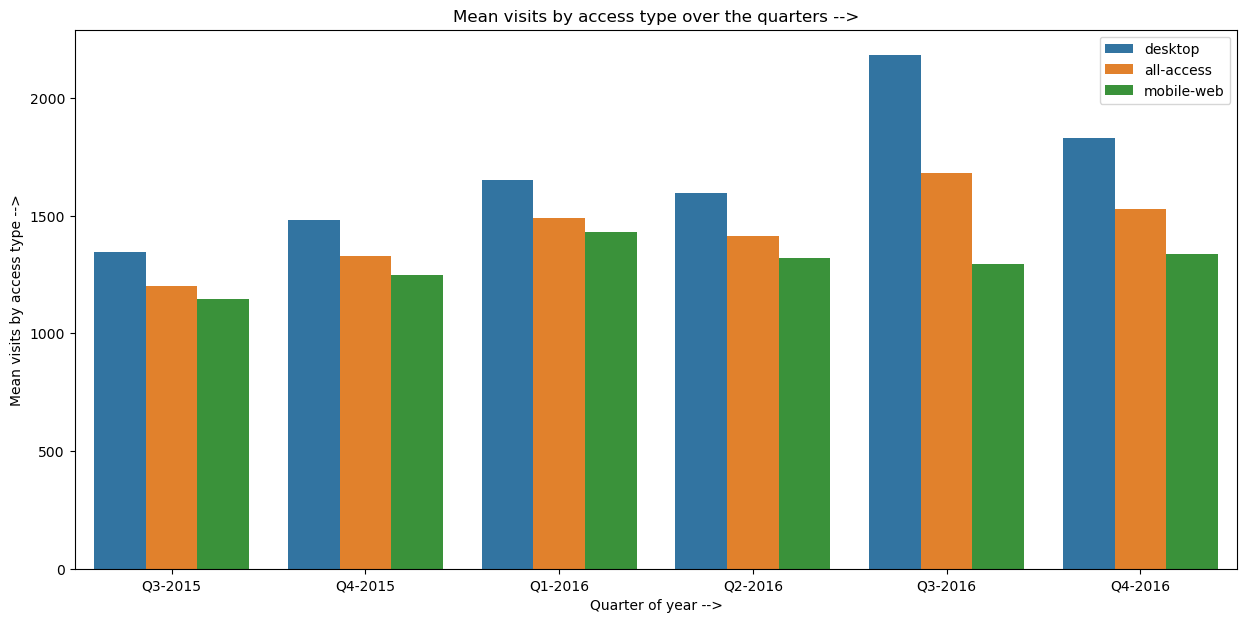

In [46]:
plt.figure(figsize = (15, 7))
sns.barplot(x = visits_by_acc_type_quarter['QQ-YYYY'], y = visits_by_acc_type_quarter['mean_visits_by_access_type'],
            order = ['Q3-2015', 'Q4-2015'] + ['Q' + str(i) + '-2016' for i in range(1, 5)],
            hue = visits_by_acc_type_quarter['access_type'], hue_order = ['desktop', 'all-access', 'mobile-web'])
plt.xlabel('Quarter of year -->')
plt.ylabel('Mean visits by access type -->')
plt.title('Mean visits by access type over the quarters -->')
plt.legend(loc = 'upper right')
plt.show()

### 4. Across all the languages, **`75% - 80%`** of "access_origin" are **`"all-agents"`**

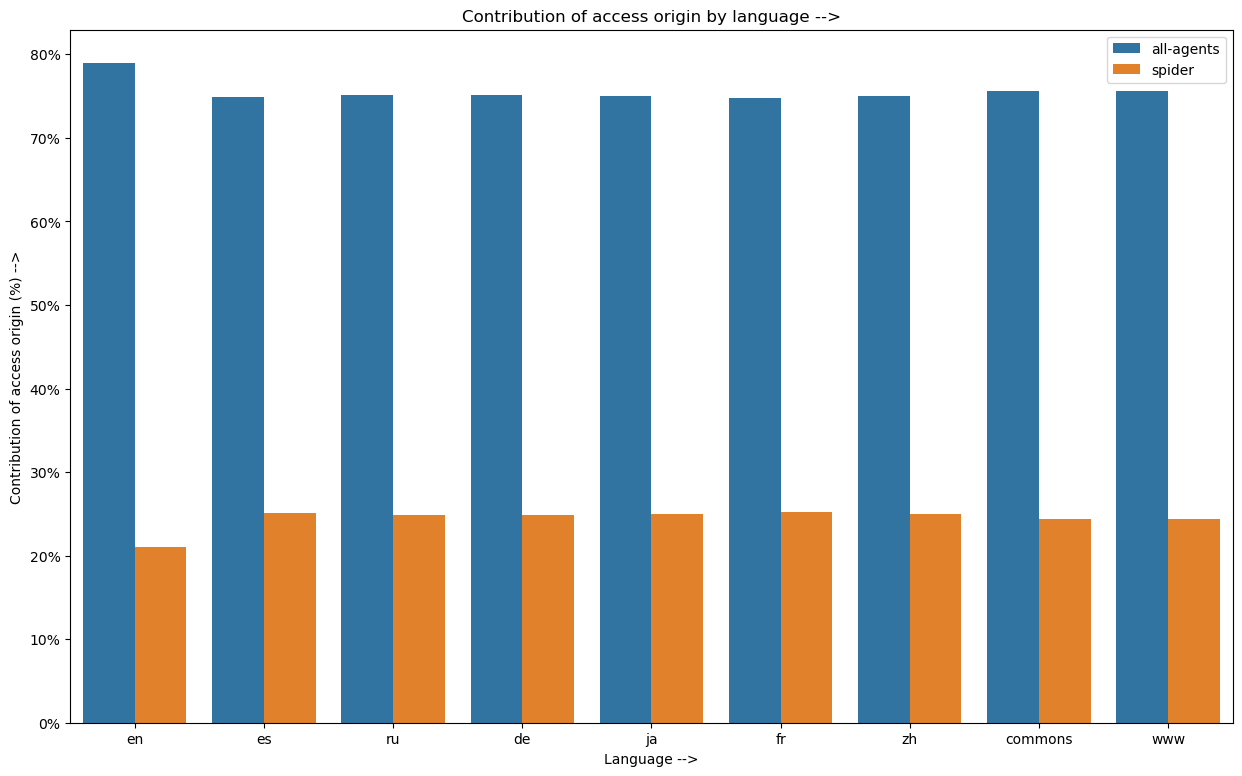

In [47]:
plt.figure(figsize = (15, 9))
sns.barplot(x = access_orig_by_lang['language'], y = access_orig_by_lang['pct_pages'],
            order = ['en', 'es', 'ru', 'de', 'ja', 'fr', 'zh', 'commons', 'www'],
            hue = access_orig_by_lang['access_origin'], hue_order = ['all-agents', 'spider'])
plt.xlabel('Language -->')
plt.ylabel('Contribution of access origin (%) -->')
plt.title('Contribution of access origin by language -->')
plt.yticks(ticks = range(0, 90, 10), labels = [str(i) + '%' for i in range(0, 90, 10)])
plt.legend(loc = 'upper right')
plt.show()

### 5. Across all the languages, **`50% - 60%`** of "access_type" are **`"all-access"`**, **`20% - 30%`** of "access_type" are **`"mobile-web"`** and rest **`20% - 30%`** are **`desktop`**

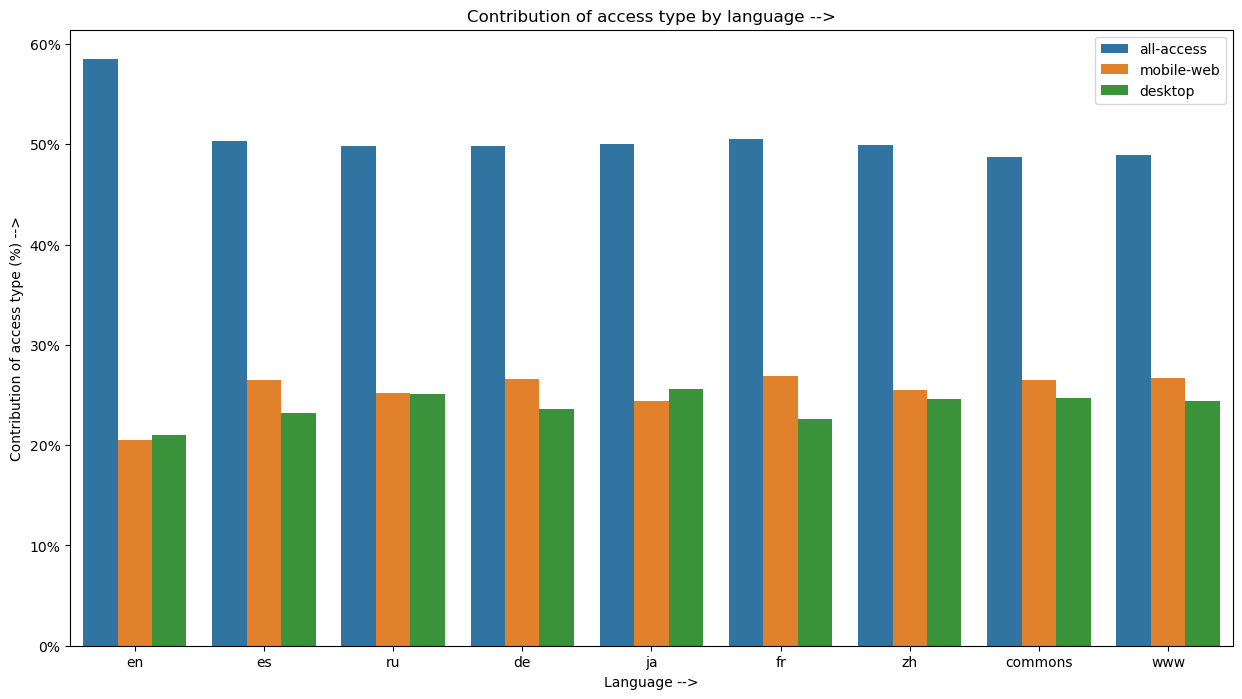

In [48]:
plt.figure(figsize = (15, 8))
sns.barplot(x = access_type_by_lang['language'], y = access_type_by_lang['pct_pages'],
            order = ['en', 'es', 'ru', 'de', 'ja', 'fr', 'zh', 'commons', 'www'],
            hue = access_type_by_lang['access_type'], hue_order = ['all-access', 'mobile-web', 'desktop'])
plt.xlabel('Language -->')
plt.ylabel('Contribution of access type (%) -->')
plt.title('Contribution of access type by language -->')
plt.yticks(ticks = range(0, 70, 10), labels = [str(i) + '%' for i in range(0, 70, 10)])
plt.legend(loc = 'upper right')
plt.show()

## **`Aggregating and Pivoting`**

In [49]:
final_df = df.drop(columns = ['Page', 'access_origin', 'access_type'])
final_df = final_df.groupby('language').mean().round().T
final_df.columns.name = None
final_df.index.name = 'date'

In [51]:
final_df.head()

commons     de      en      es     fr     ja     ru   www     zh
date                                                                        
2015-07-01    162.0  793.0  4045.0  1161.0  530.0  633.0  690.0  69.0  301.0
2015-07-02    168.0  782.0  4033.0  1110.0  536.0  726.0  701.0  75.0  301.0
2015-07-03    164.0  751.0  3829.0  1021.0  504.0  656.0  649.0  64.0  299.0
2015-07-04    136.0  690.0  3979.0   958.0  544.0  823.0  612.0  61.0  302.0
2015-07-05    151.0  802.0  4111.0  1042.0  542.0  790.0  650.0  66.0  321.0

## **`Plotting Time Series for each language`**

### **1. `"commons"`**

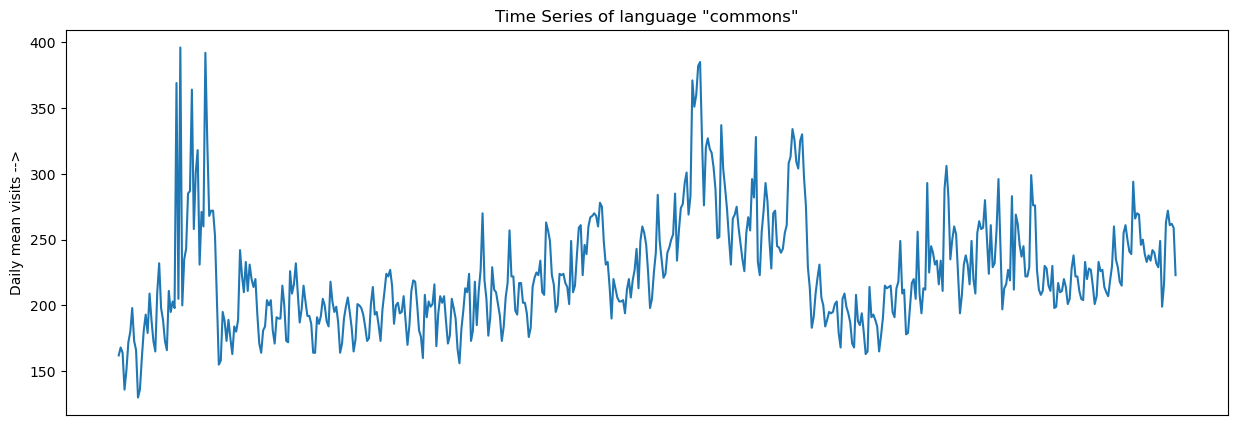

In [52]:
plt.figure(figsize = (15, 5))
plt.plot(final_df['commons'])
plt.tick_params(axis = 'x', which = 'both', bottom = False, top = False, labelbottom = False)
plt.title('Time Series of language "commons"')
plt.ylabel('Daily mean visits -->')
plt.show()

### **2. `"German (de)"`**

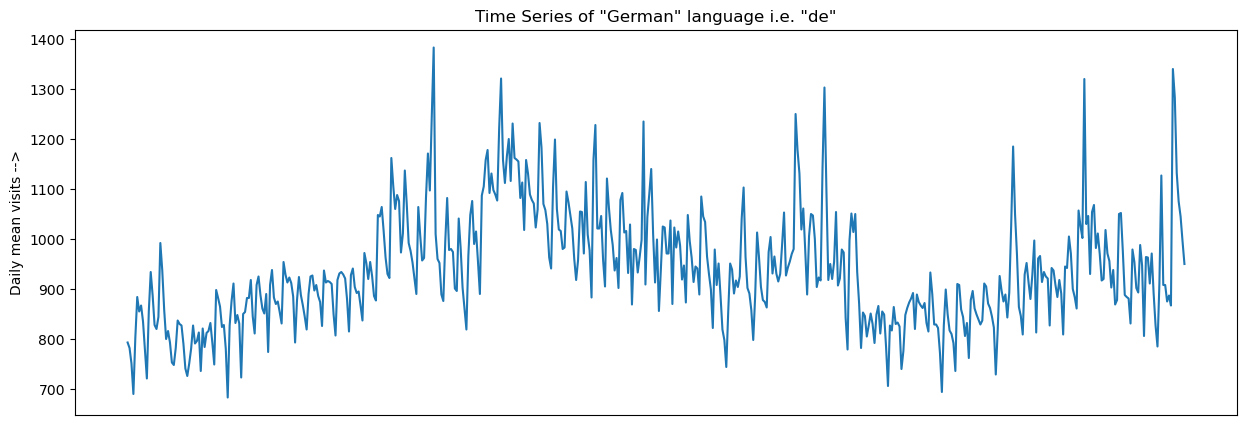

In [53]:
plt.figure(figsize = (15, 5))
plt.plot(final_df['de'])
plt.tick_params(axis = 'x', which = 'both', bottom = False, top = False, labelbottom = False)
plt.title('Time Series of "German" language i.e. "de"')
plt.ylabel('Daily mean visits -->')
plt.show()

### **3. `"English (en)"`**

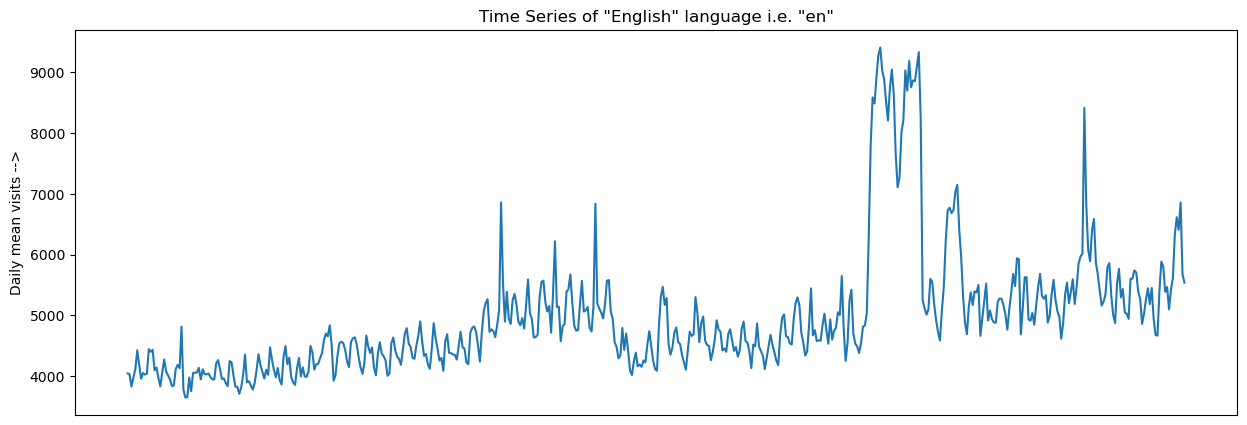

In [54]:
plt.figure(figsize = (15, 5))
plt.plot(final_df['en'])
plt.tick_params(axis = 'x', which = 'both', bottom = False, top = False, labelbottom = False)
plt.title('Time Series of "English" language i.e. "en"')
plt.ylabel('Daily mean visits -->')
plt.show()

### **4. `"Spanish (es)"`**

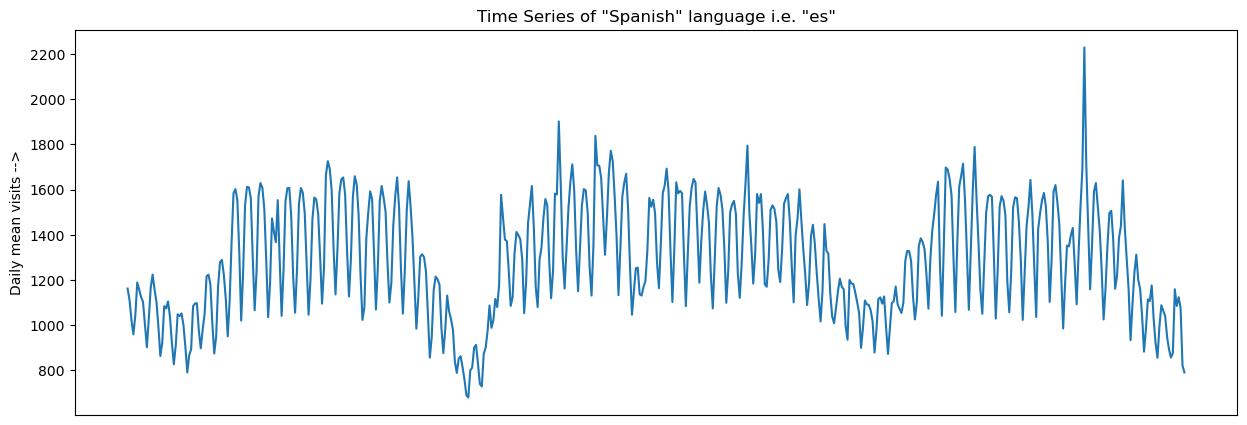

In [55]:
plt.figure(figsize = (15, 5))
plt.plot(final_df['es'])
plt.tick_params(axis = 'x', which = 'both', bottom = False, top = False, labelbottom = False)
plt.title('Time Series of "Spanish" language i.e. "es"')
plt.ylabel('Daily mean visits -->')
plt.show()

### **5. `"French (fr)"`**

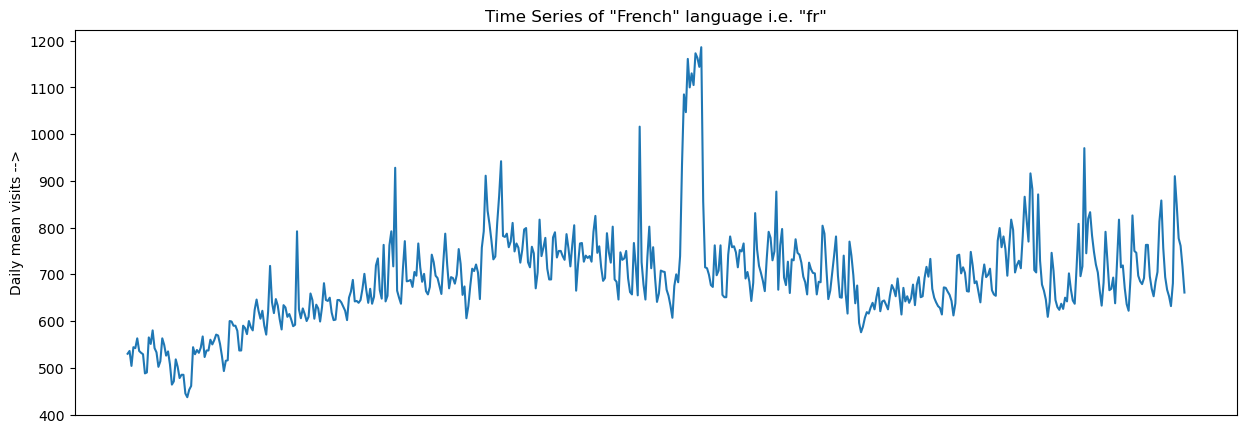

In [56]:
plt.figure(figsize = (15, 5))
plt.plot(final_df['fr'])
plt.tick_params(axis = 'x', which = 'both', bottom = False, top = False, labelbottom = False)
plt.title('Time Series of "French" language i.e. "fr"')
plt.ylabel('Daily mean visits -->')
plt.show()

### **6. `"Japanese (ja)"`**

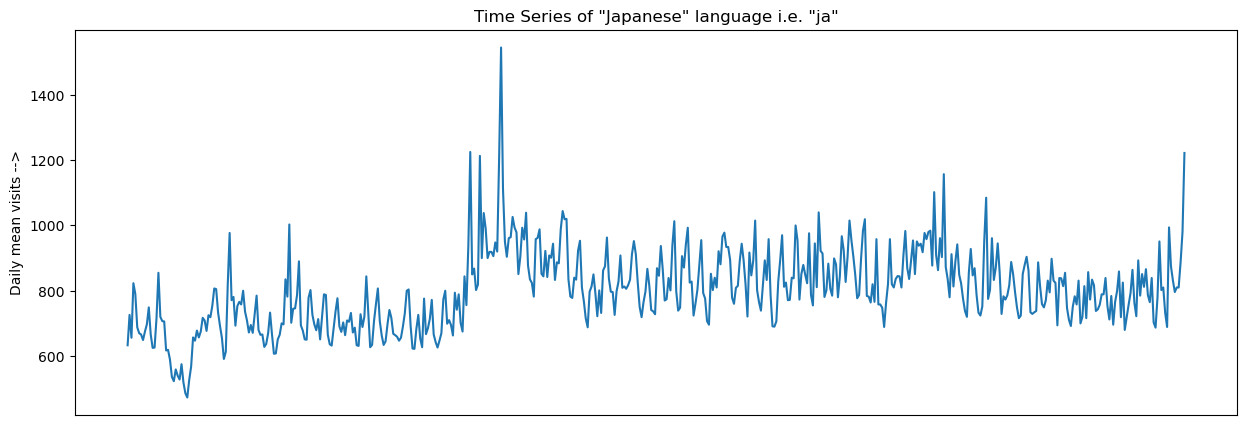

In [57]:
plt.figure(figsize = (15, 5))
plt.plot(final_df['ja'])
plt.tick_params(axis = 'x', which = 'both', bottom = False, top = False, labelbottom = False)
plt.title('Time Series of "Japanese" language i.e. "ja"')
plt.ylabel('Daily mean visits -->')
plt.show()

### **7. `"Russian (ru)"`**

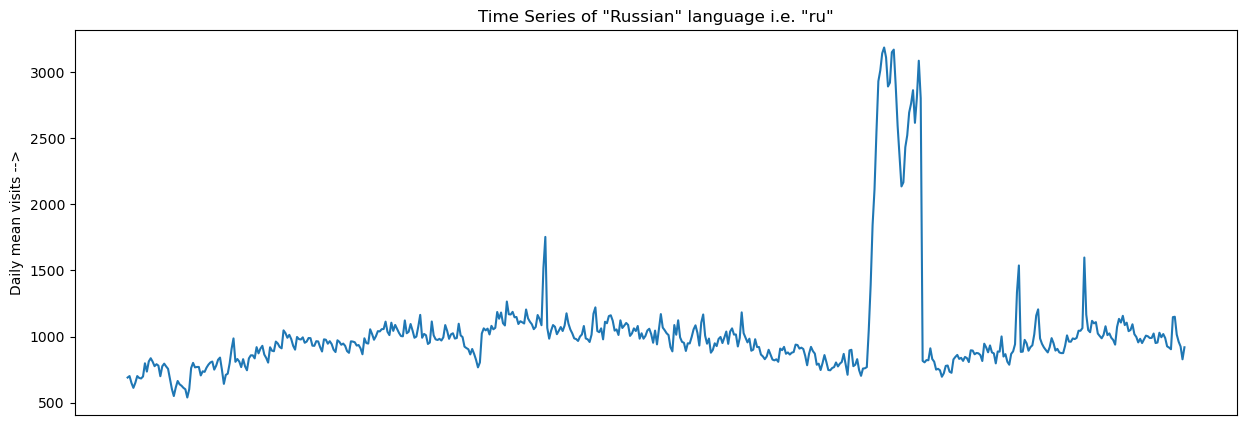

In [58]:
plt.figure(figsize = (15, 5))
plt.plot(final_df['ru'])
plt.tick_params(axis = 'x', which = 'both', bottom = False, top = False, labelbottom = False)
plt.title('Time Series of "Russian" language i.e. "ru"')
plt.ylabel('Daily mean visits -->')
plt.show()

### **8. `"www"`**

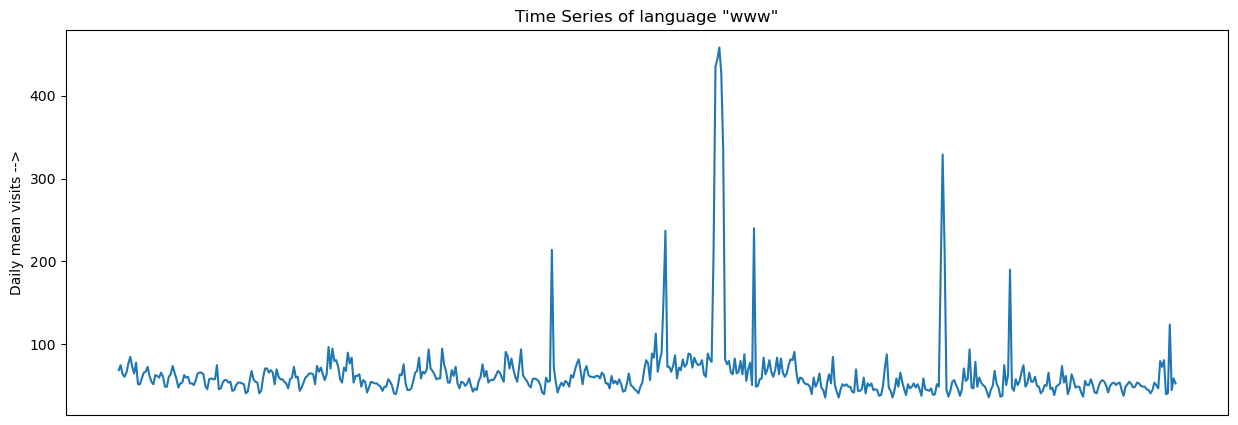

In [59]:
plt.figure(figsize = (15, 5))
plt.plot(final_df['www'])
plt.tick_params(axis = 'x', which = 'both', bottom = False, top = False, labelbottom = False)
plt.title('Time Series of language "www"')
plt.ylabel('Daily mean visits -->')
plt.show()

### **9. `"Chinese (zh)"`**

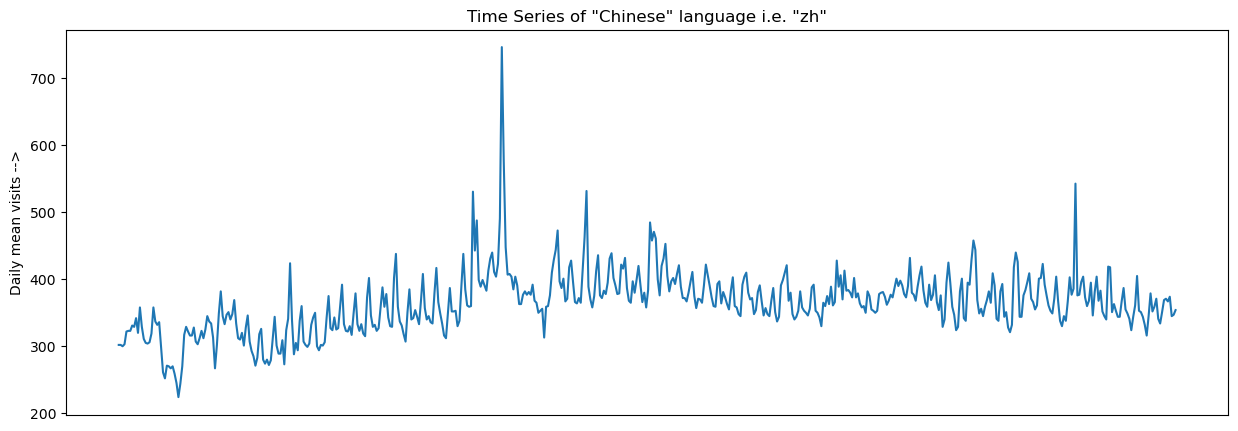

In [60]:
plt.figure(figsize = (15, 5))
plt.plot(final_df['zh'])
plt.tick_params(axis = 'x', which = 'both', bottom = False, top = False, labelbottom = False)
plt.title('Time Series of "Chinese" language i.e. "zh"')
plt.ylabel('Daily mean visits -->')
plt.show()

In [61]:
commons = final_df['commons']
german = final_df['de']
english = final_df['en']
spanish = final_df['es']
french = final_df['fr']
japanese = final_df['ja']
russian = final_df['ru']
www = final_df['www']
chinese = final_df['zh']

## **`Stationarity Test (Augmented Dickey Fuller Test)`**

In [62]:
from statsmodels.tsa.stattools import adfuller

In [63]:
def my_adfuller(time_series):
    adf, p_val, _, _, _, _ = adfuller(time_series)
    if p_val <= 0.05:
        return 'Time Series is stationary'
    else:
        return 'Time Series is not stationary'

### **The time series for language `"commons"` is stationary**

In [64]:
my_adfuller(commons)

'Time Series is stationary'

### **The time series for language `"German i.e. de"` is not stationary**

In [65]:
my_adfuller(german)

'Time Series is not stationary'

### **The time series for language `"English i.e. en"` is not stationary**

In [66]:
my_adfuller(english)

'Time Series is not stationary'

### **The time series for language `"Spanish i.e. es"` is stationary**

In [67]:
my_adfuller(spanish)

'Time Series is stationary'

### **The time series for language `"French i.e. fr"` is stationary**

In [68]:
my_adfuller(french)

'Time Series is stationary'

### **The time series for language `"Japanese i.e. ja"` is not stationary**

In [69]:
my_adfuller(japanese)

'Time Series is not stationary'

### **The time series for language `"Russian i.e. ru"` is stationary**

In [70]:
my_adfuller(russian)

'Time Series is stationary'

### **The time series for language `"www"` is stationary**

In [71]:
my_adfuller(www)

'Time Series is stationary'

### **The time series for language `"Chinese i.e. zh"` is not stationary**

In [72]:
my_adfuller(chinese)

'Time Series is not stationary'

## **`Decomposition:`** 
### As the time series for languages **`"de"`** i.e. German, **`"en"`** i.e. English, **`"ja"`** i.e. Japanese and **`"zh"`** i.e. Chinese are not stationary, we'll try decomposing it.

In [73]:
import statsmodels.api as sm

- ### **Decomposition of Time Series for "de" i.e. German language.**

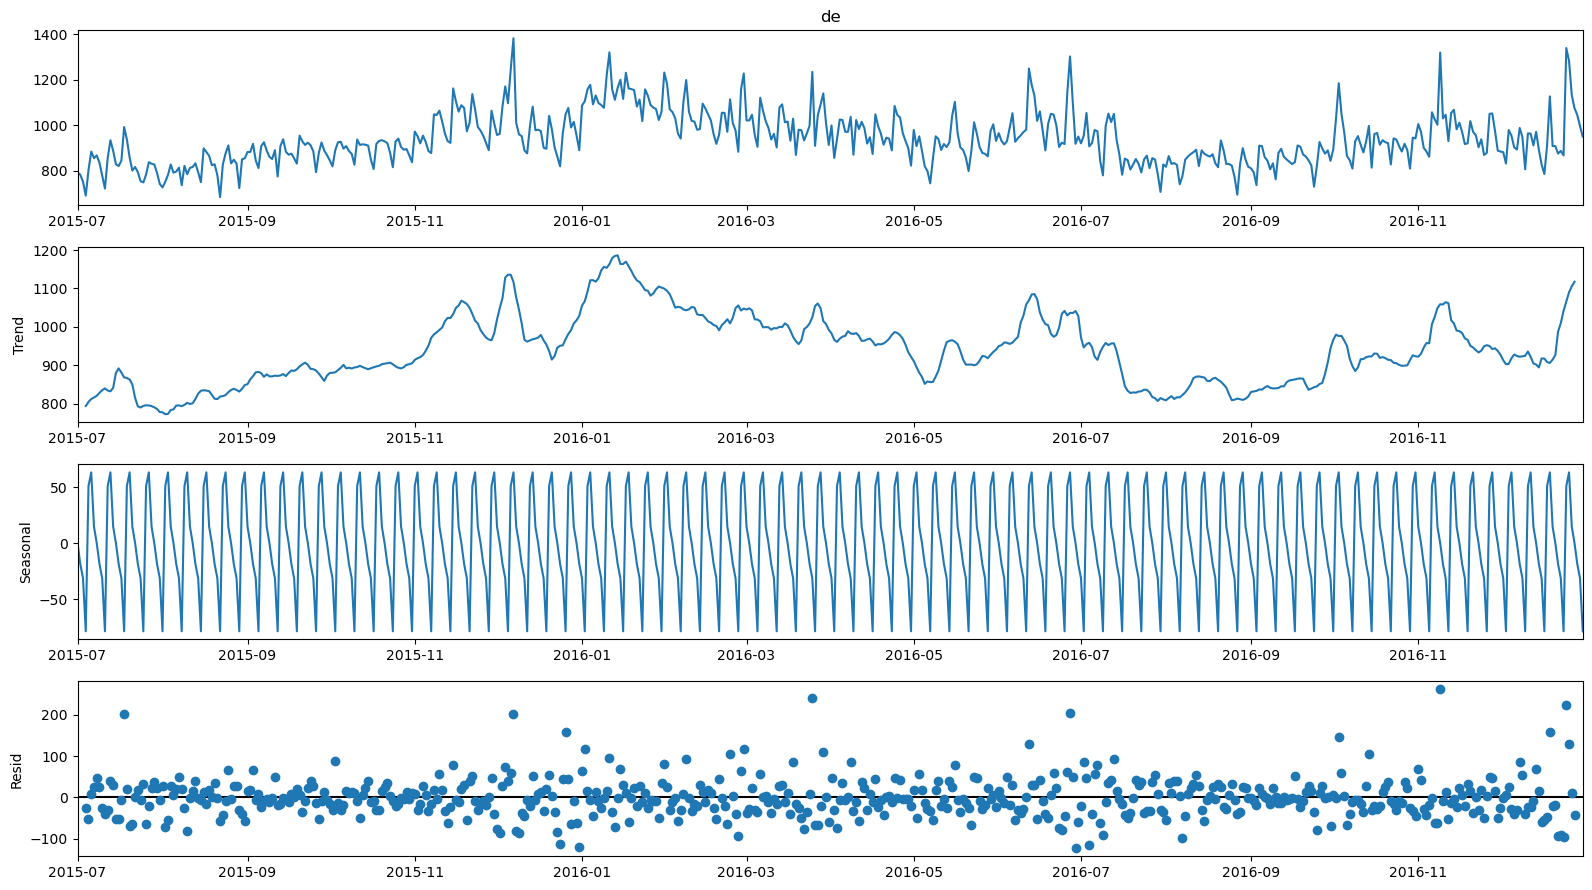

In [74]:
decomp_viz_german = sm.tsa.seasonal_decompose(german)
trend_german = decomp_viz_german.trend
seasonal_german = decomp_viz_german.seasonal
resid_german = decomp_viz_german.resid
fig_german = decomp_viz_german.plot()
fig_german.set_size_inches((16, 9))
fig_german.tight_layout()
plt.show()

- ### **Decomposition of Time Series for "en" i.e English language.**

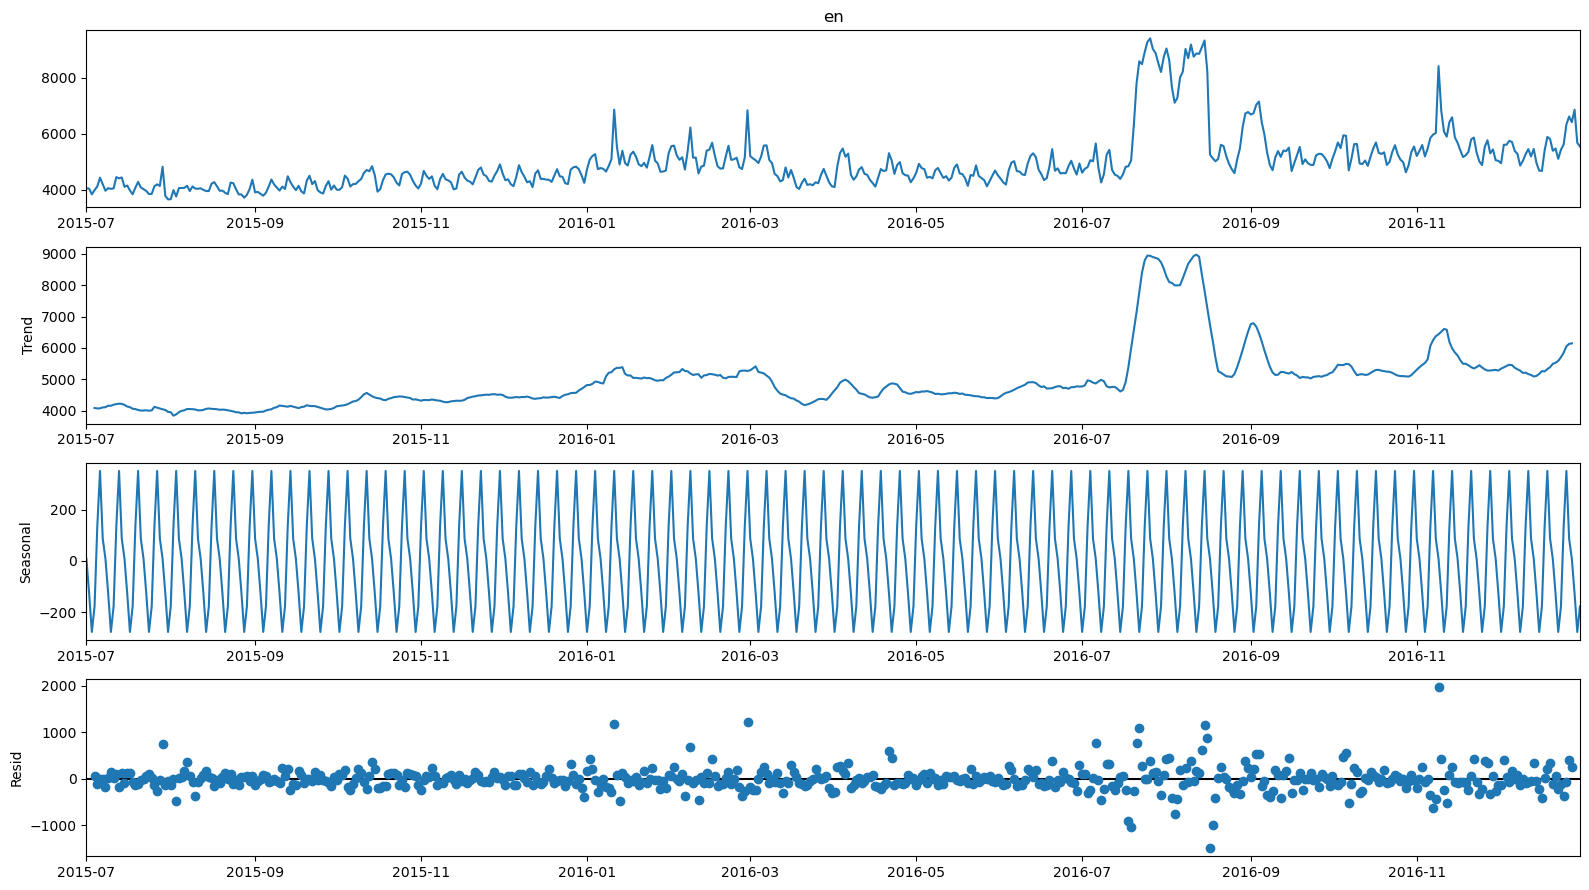

In [75]:
decomp_viz_english = sm.tsa.seasonal_decompose(english)
trend_english = decomp_viz_english.trend
seasonal_english = decomp_viz_english.seasonal
resid_english = decomp_viz_english.resid
fig_english = decomp_viz_english.plot()
fig_english.set_size_inches((16, 9))
fig_english.tight_layout()
plt.show()

- ### **Decomposition of Time Series for "ja" i.e Japanese language.**

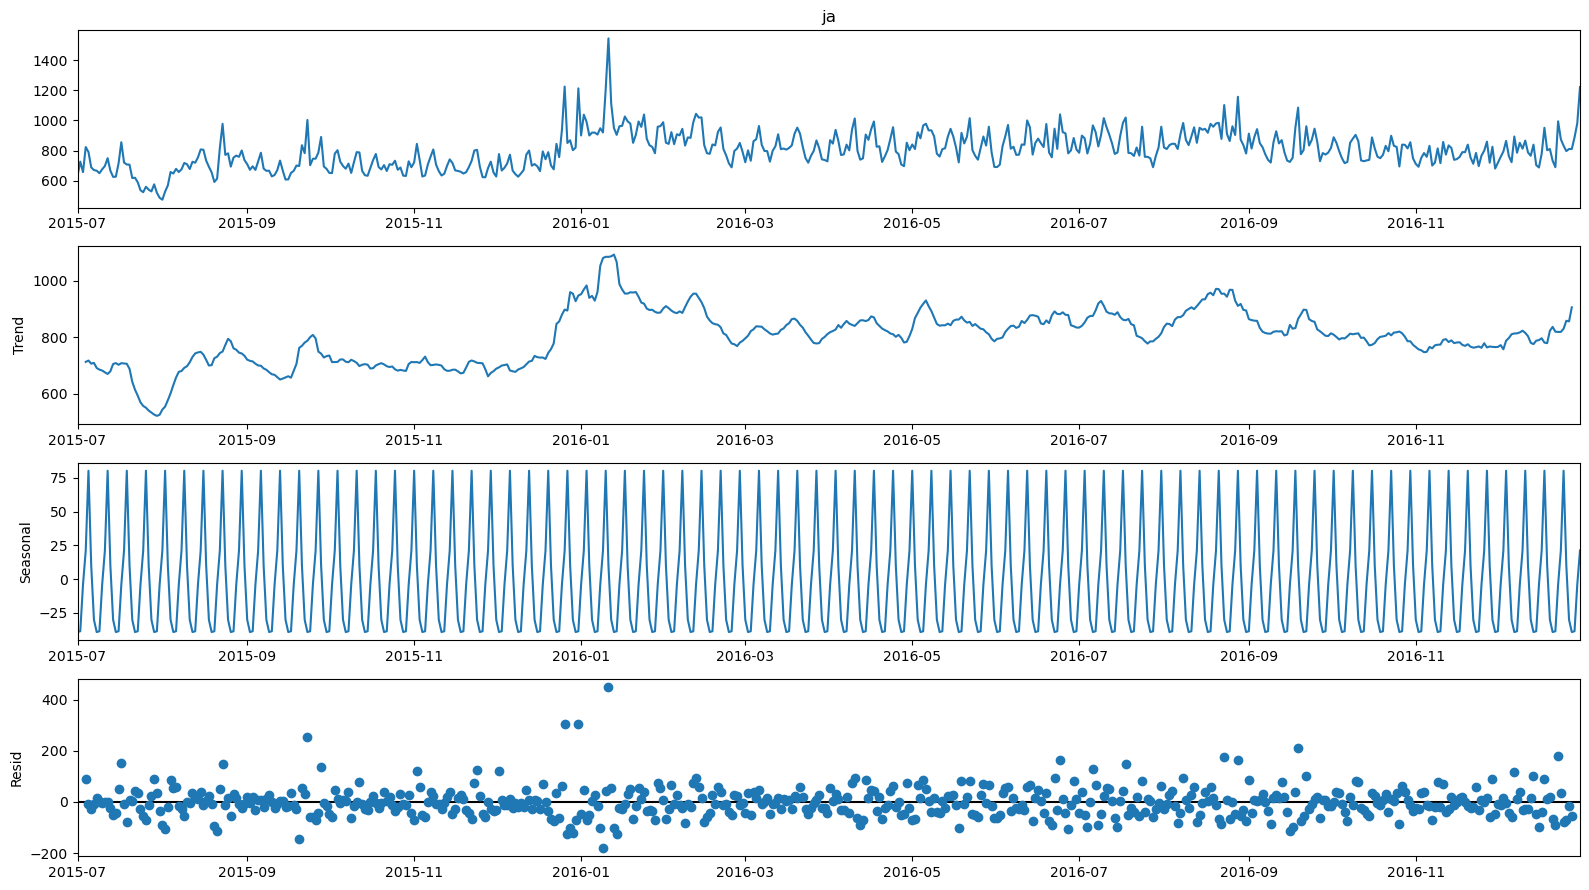

In [76]:
decomp_viz_japanese = sm.tsa.seasonal_decompose(japanese)
trend_japanese = decomp_viz_japanese.trend
seasonal_japanese = decomp_viz_japanese.seasonal
resid_japanese = decomp_viz_japanese.resid
fig_japanese = decomp_viz_japanese.plot()
fig_japanese.set_size_inches((16, 9))
fig_japanese.tight_layout()
plt.show()

- ### **Decomposition of Time Series for "zh" i.e Chinese language.**

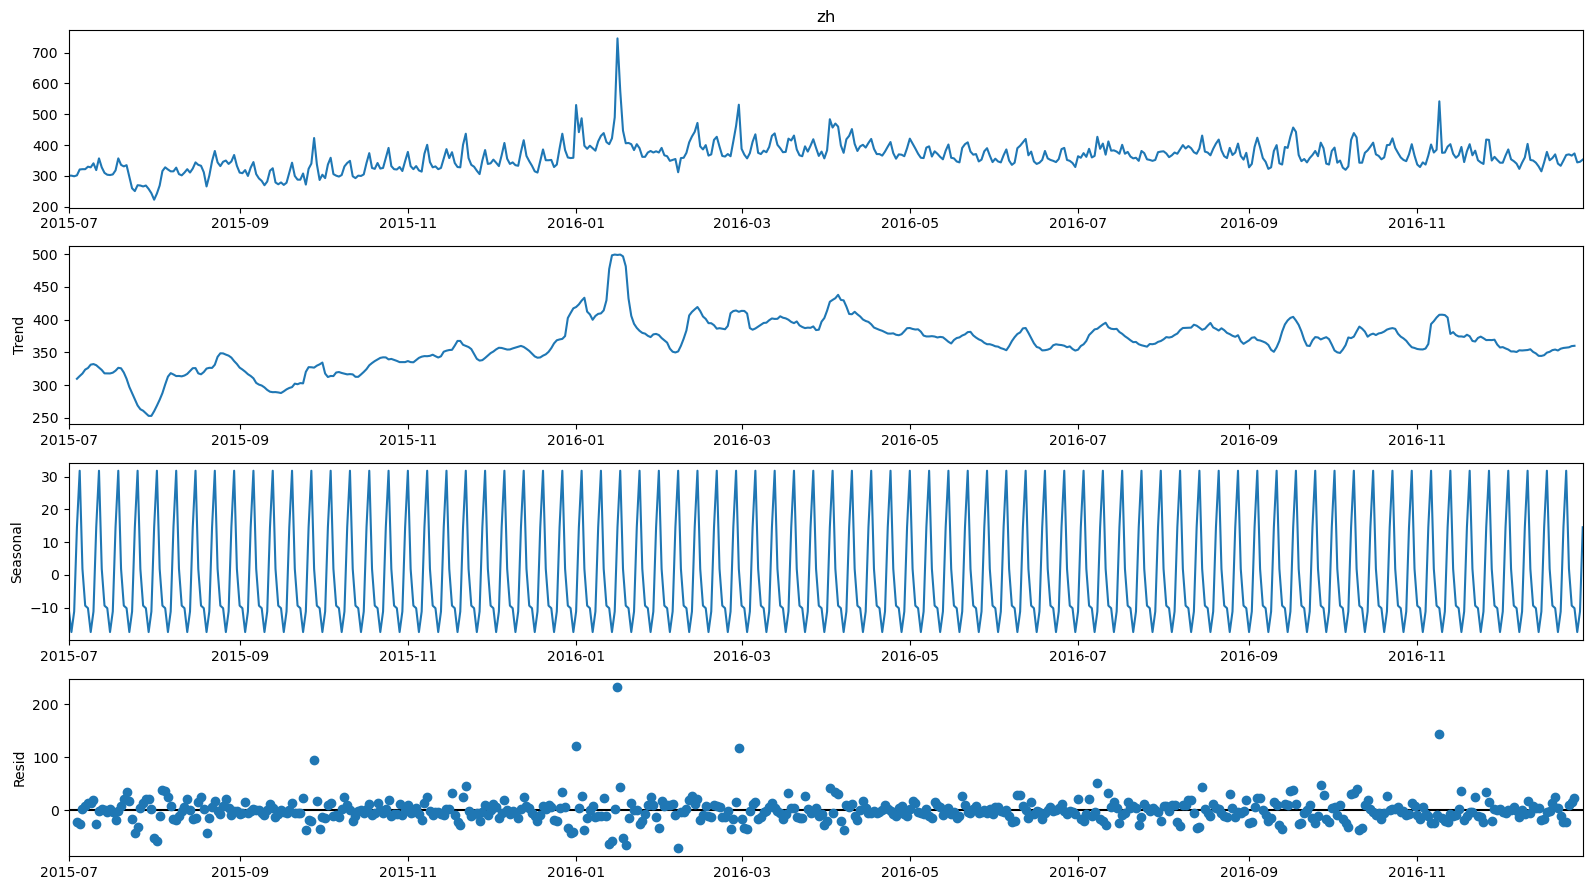

In [77]:
decomp_viz_chinese = sm.tsa.seasonal_decompose(chinese)
trend_chinese = decomp_viz_chinese.trend
seasonal_chinese = decomp_viz_chinese.seasonal
resid_chinese = decomp_viz_chinese.resid
fig_chinese = decomp_viz_chinese.plot()
fig_chinese.set_size_inches((16, 9))
fig_chinese.tight_layout()
plt.show()

## **`Outlier Treatment`**: As we saw earlier, that there are sudden peaks and dips which we can consider as outliers and they can distort the signal which can further makes bad predictions. So we'll clip the time series between 3rd & 97th percentile.

In [78]:
language_ts = [commons, german, english, spanish, french, japanese, russian, www, chinese]

for language in language_ts:
    language = language.clip(lower = np.percentile(language, 3), upper = np.percentile(language, 97))

## **`Detrending by Differencing`**
### As the time series for **commons**, **spanish**, **french**, **russian** and **www** are already stationary, therefore we'll detrend by differencing on the other languages i.e. **german**, **english**, **japanese** and **chinese**

In [79]:
german_st = german.diff(1).dropna()
english_st = english.diff(1).dropna()
japanese_st = japanese.diff(1).dropna()
chinese_st = chinese.diff(1).dropna()

### **Now let's check stationarity after differencing**

### **The time series for language `"German i.e. de"` is stationary after differencing**

In [80]:
my_adfuller(german_st)

'Time Series is stationary'

### **The time series for language `"English i.e. en"` is stationary after differencing**

In [81]:
my_adfuller(english_st)

'Time Series is stationary'

### **The time series for language `"Japanese i.e. ja"` is stationary after differencing**

In [82]:
my_adfuller(japanese_st)

'Time Series is stationary'

### **The time series for language `"Chinese i.e. zh"` is stationary after differencing**

In [83]:
my_adfuller(chinese_st)

'Time Series is stationary'

## **Getting insights into time series characteristics using**
- ### **ACF (Autocorrelation Function)**
- ### **and PACF(Partial Autocorrelation Function)**

## **ACF (Autocorrelation Function):** ACF will tell us the correlation between time series and its lagged series which will give us a rough estimate of the order of **`"q"`** in MA model.

## **PACF (Partial Autocorrelation Function):** PACF will tell us the direct correlation between time series and its lagged series which will give us a rough estimate of the order of **`"p"`** in AR model.

- ### **The ACF plot of time series for language `"commons"` suggests that the values of `"q"` in MA should be equal to 7 because on both sides i.e. left and right side of 7, the value starts to drop. We can see the same at 14 and 21 which also confirms that q should be 7**

- ### **The PACF plot of time series for language `"commons"` suggests that the values of `"p"` in AR should be in the range of `"1-2"` because after 2, the value suddenly drops.**

In [84]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

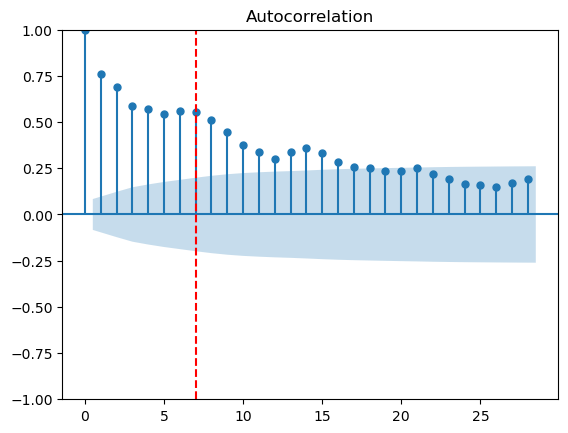

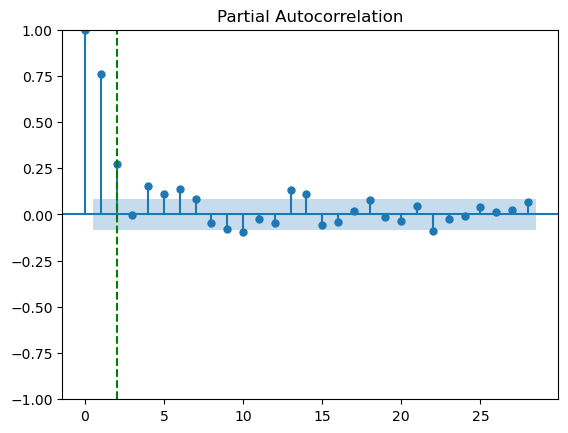

In [85]:
plot_acf(commons)
plt.axvline(7, color = 'r', linestyle = '--');
plot_pacf(commons)
plt.axvline(2, color = 'g', linestyle = '--');

- ### **The ACF plot of time series for language `"german"` suggests that the values of `"q"` in MA should be equal to 7 because on both sides i.e. left and right side of 7, the value starts to drop. We can see the same at 14 and 21 which also confirms that q should be 7**

- ### **The PACF plot of time series for language `"german"` suggests that the values of `"p"` in AR should be in the range of `"1-8"` because after 8, the value is low all throughout.**

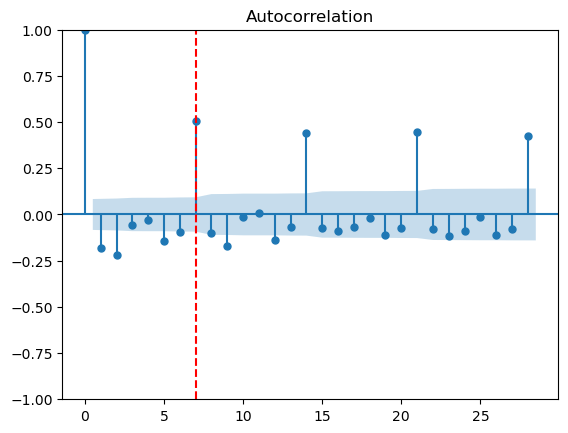

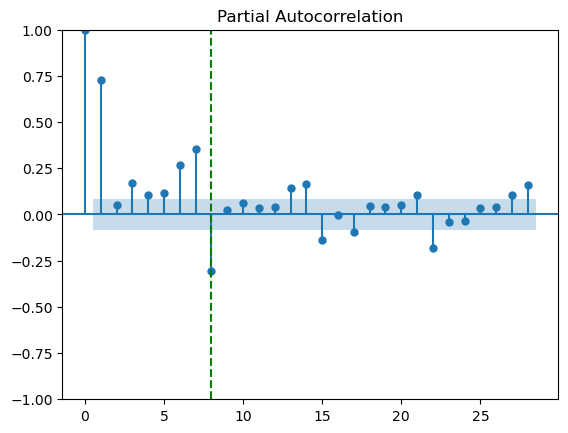

In [86]:
plot_acf(german_st)
plt.axvline(7, color = 'r', linestyle = '--');
plot_pacf(german)
plt.axvline(8, color = 'g', linestyle = '--');

- ### **The ACF plot of time series for language `"english"` suggests that the values of `"q"` in MA should be equal to 7 because on both sides i.e. left and right side of 7, the value starts to drop. We can see the same at 14 and 21 which also confirms that q should be 7**

- ### **The PACF plot of time series for language `"english"` suggests that the values of `"p"` in AR should be 1 because after 1, the value suddenly drops.**

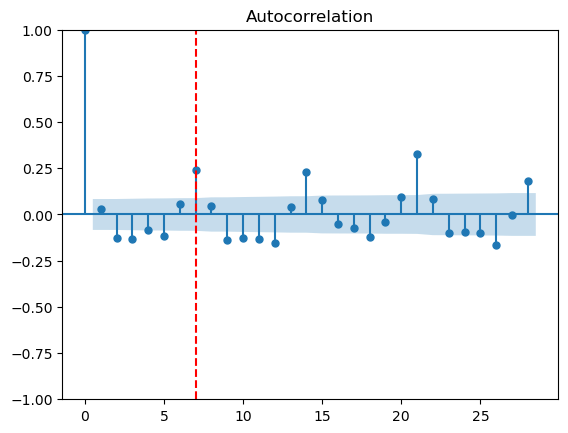

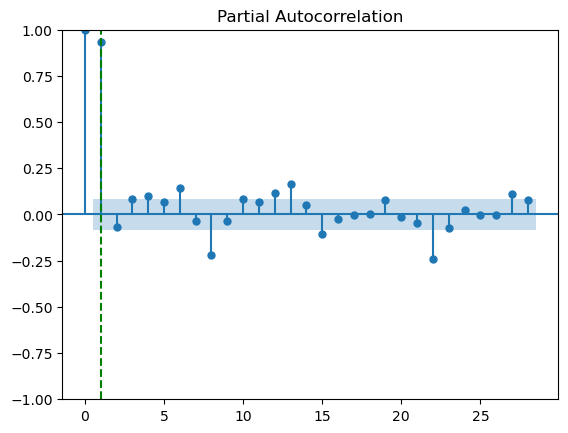

In [87]:
plot_acf(english_st)
plt.axvline(7, color = 'r', linestyle = '--');
plot_pacf(english)
plt.axvline(1, color = 'g', linestyle = '--');

- ### **The ACF plot of time series for language `"spanish"` suggests that the values of `"q"` in MA should be equal to 7 because on both sides i.e. left and right side of 7, the value starts to drop. We can see the same at 14 and 21 which also confirms that q should be 7**

- ### **The PACF plot of time series for language `"spanish"` suggests that the values of `"p"` in AR should be in the range of `"1-9"` because after 9, the value remains low all throughout.**

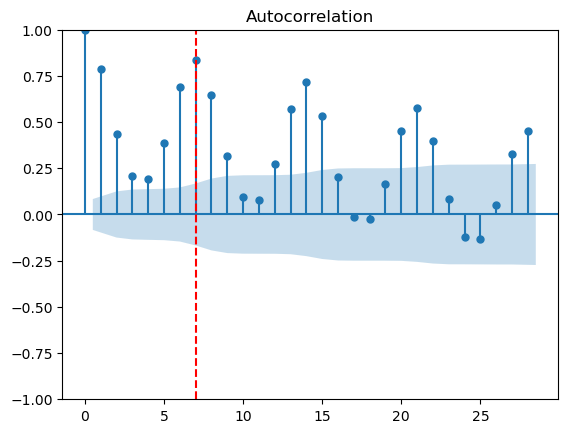

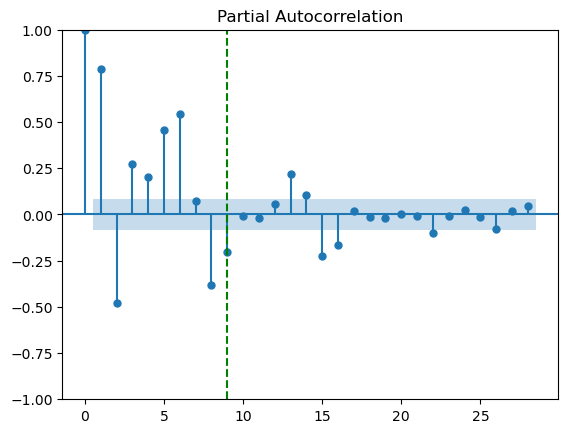

In [88]:
plot_acf(spanish)
plt.axvline(7, color = 'r', linestyle = '--');
plot_pacf(spanish)
plt.axvline(9, color = 'g', linestyle = '--');

- ### **The ACF plot of time series for language `"french"` suggests that the values of `"q"` in MA should be equal to 7 because on both sides i.e. left and right side of 7, the value starts to drop. We can see the same at 14 and 21 which also confirms that q should be 7**

- ### **The PACF plot of time series for language `"french"` suggests that the values of `"p"` in AR should be 1 because after 1, the value suddenly drops.**

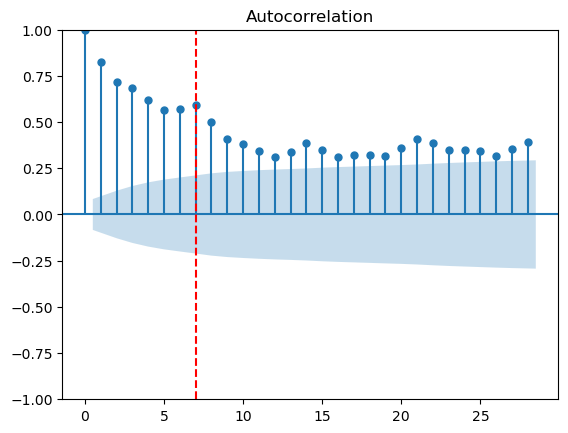

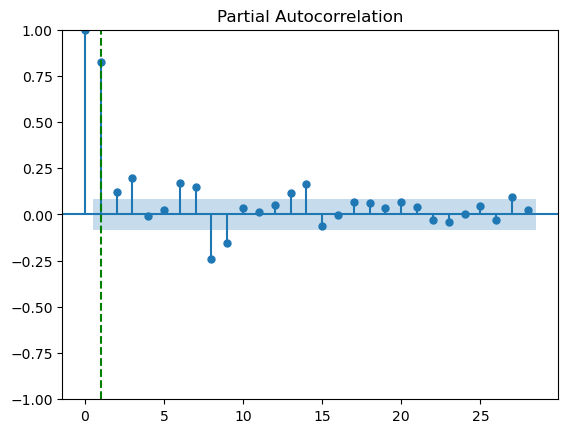

In [89]:
plot_acf(french)
plt.axvline(7, color = 'r', linestyle = '--');
plot_pacf(french)
plt.axvline(1, color = 'g', linestyle = '--');

- ### **The ACF plot of time series for language `"japanese"` suggests that the values of `"q"` in MA should be equal to 7 because on both sides i.e. left and right side of 7, the value starts to drop. We can see the same at 14 and 21 which also confirms that q should be 7**

- ### **The PACF plot of time series for language `"japanese"` suggests that the values of `"p"` in AR should be in the range of `"1-7"` because after 7, the value reamins very low all throughout.**

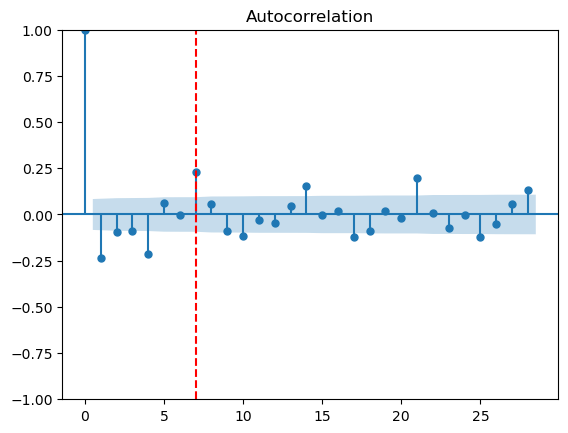

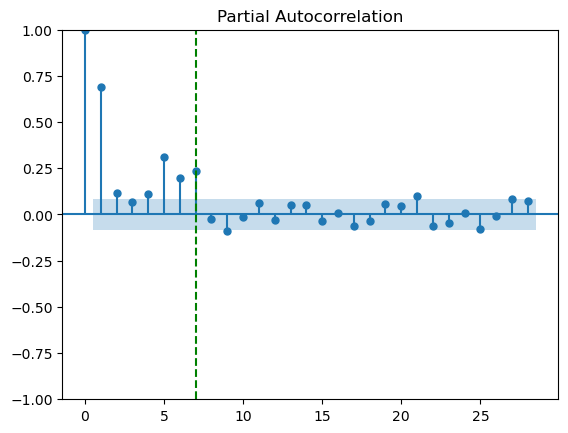

In [90]:
plot_acf(japanese_st)
plt.axvline(7, color = 'r', linestyle = '--');
plot_pacf(japanese)
plt.axvline(7, color = 'g', linestyle = '--');

- ### **The ACF plot of time series for language `"russian"` suggests that it is purely an AR model as ACF values keeps on decreasing gardually.**

- ### **The PACF plot of time series for language `"russian"` suggests that the values of `"p"` in AR should be equal to `"1"` because after 1, the value suddenly drops.**

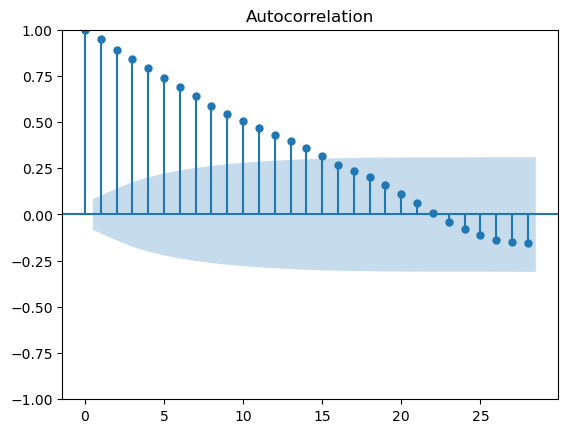

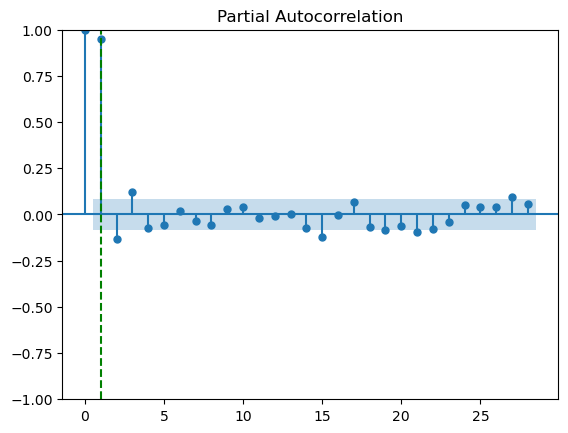

In [91]:
plot_acf(russian);
plot_pacf(russian)
plt.axvline(1, color = 'g', linestyle = '--');

- ### **The ACF plot of time series for language `"www"` can't suggest any value of `"q"` in MA model**

- ### **The PACF plot of time series for language `"www"` suggests that the values of `"p"` in AR should be equal to `"1"` because after 1, the value suddenly drops amd remains low all throughout.**

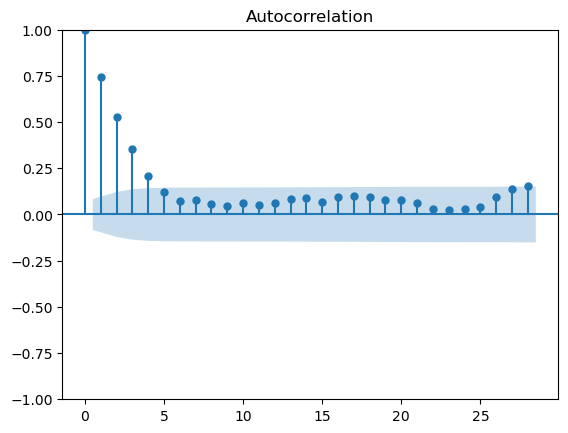

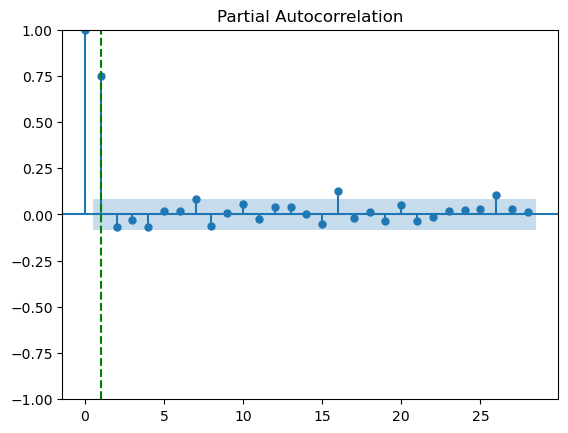

In [92]:
plot_acf(www);
plot_pacf(www)
plt.axvline(1, color = 'g', linestyle = '--');

- ### **The ACF plot of time series for language `"chinese"` suggests that the values of `"q"` in MA should be equal to 7 because on both sides i.e. left and right side of 7, the value starts to drop. We can see the same at 14 and 21 which also confirms that q should be 7**

- ### **The PACF plot of time series for language `"chinese"` suggests that the values of `"p"` in AR should be in the range of `"1-7"` because after 7, the value reamins very low all throughout.**

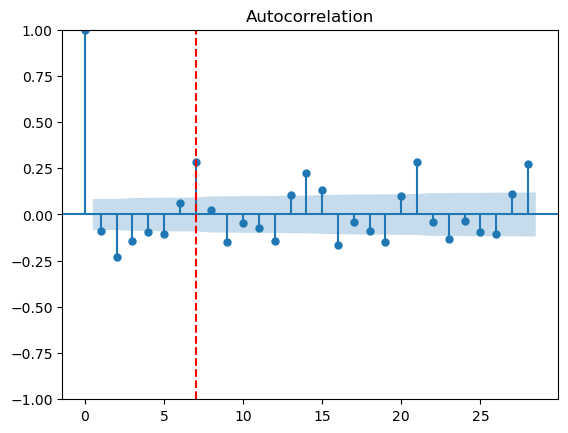

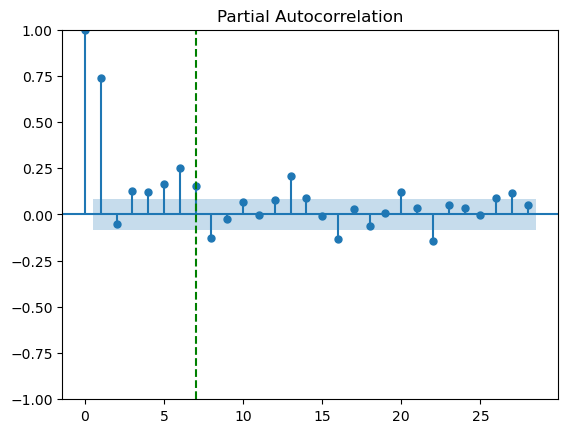

In [93]:
plot_acf(chinese_st)
plt.axvline(7, color = 'r', linestyle = '--');
plot_pacf(chinese)
plt.axvline(7, color = 'g', linestyle = '--');

## **Data Splitting into train, validation (28 days) and test sets (28 days)**

In [241]:
from sklearn.model_selection import train_test_split
commons_train_val_2, commons_test_2 = train_test_split(commons, test_size = 28, shuffle = False)


In [243]:
len(commons_train_val_2)

522

In [94]:
commons_train_val, commons_test = np.split(commons, [-28])
commons_train, commons_val = np.split(commons_train_val, [-28])

german_train_val, german_test = np.split(german, [-28])
german_train, german_val = np.split(german_train_val, [-28])

english_train_val, english_test = np.split(english, [-28])
english_train, english_val = np.split(english_train_val, [-28])

spanish_train_val, spanish_test = np.split(spanish, [-28])
spanish_train, spanish_val = np.split(spanish_train_val, [-28])

french_train_val, french_test = np.split(french, [-28])
french_train, french_val = np.split(french_train_val, [-28])

japanese_train_val, japanese_test = np.split(japanese, [-28])
japanese_train, japanese_val = np.split(japanese_train_val, [-28])

russian_train_val, russian_test = np.split(russian, [-28])
russian_train, russian_val = np.split(russian_train_val, [-28])

www_train_val, www_test = np.split(www, [-28])
www_train, www_val = np.split(www_train_val, [-28])

chinese_train_val, chinese_test = np.split(chinese, [-28])
chinese_train, chinese_val = np.split(chinese_train_val, [-28])

In [95]:
from statsmodels.tsa.arima.model import ARIMA
from math import sqrt
from multiprocessing import cpu_count
from joblib import Parallel
from joblib import delayed
from sklearn.metrics import mean_absolute_percentage_error
import warnings
warnings.filterwarnings('ignore')

## **ARIMA Model**

#### **Framework similar to GridSearchCV for Hyperparameter Tuning of ARIMA Model**

In [96]:
def arima_forecast(x_train, config, forecast_period):
    order = config
    # define model
    model = ARIMA(x_train, order = order)
    # fit model
    model_fit = model.fit()
    # forecast
    yhat = model_fit.forecast(forecast_period)
    return yhat


# walk-forward validation for univariate data
def arima_walk_forward_validation(x_train, x_test, config):
    forecast_period = len(x_test)
    predictions = arima_forecast(x_train, config, forecast_period)
    error = mean_absolute_percentage_error(x_test, predictions)
    return error


# score a model
def arima_score_model(x_train, x_test, config):
    # convert config to a key
    result = arima_walk_forward_validation(x_train, x_test, config)
    return (config, result)

# grid search configs
def arima_grid_search(x_train, cfg_list, x_test, parallel = False):
    scores = None
    if parallel:
    # execute configs in parallel
        executor = Parallel(n_jobs = cpu_count(), backend = 'multiprocessing')
        tasks = (delayed(arima_score_model)(x_train, x_test, config) for config in cfg_list)
        scores = executor(tasks)
    else:
        scores = [arima_score_model(x_train, x_test, config) for config in cfg_list]
    # sort configs by error, asc
    scores.sort(key = lambda tup: tup[1])
    return scores

# create a set of arima configs to try
def arima_configs(p_params, d_params, q_params):
    models = []
    
    # create config instances
    for p in p_params:
        for d in d_params:
            for q in q_params:
                config  = (p,d,q)
                models.append(config)
    return models

### **Hyperparameter Tuning of ARIMA Model for language `"commons"`**

In [99]:
commons_arima_config_list = arima_configs(p_params = [1, 2, 3], d_params = [1], q_params = [6, 7, 8])
commons_arima_scores = arima_grid_search(commons_train, commons_arima_config_list, commons_val)
# list top 3 configs
for commons_config, commons_error in commons_arima_scores[:3]:
    p, d, q = commons_config
    print(f'For (p, d, q) = ({p}, {d}, {q}), MAPE = {round(commons_error, 3)}')
    print('-' * 150)

best_commons_arima_config = commons_arima_scores[0][0]

For (p, d, q) = (3, 1, 8), MAPE = 0.045
------------------------------------------------------------------------------------------------------------------------------------------------------
For (p, d, q) = (3, 1, 6), MAPE = 0.046
------------------------------------------------------------------------------------------------------------------------------------------------------
For (p, d, q) = (1, 1, 8), MAPE = 0.047
------------------------------------------------------------------------------------------------------------------------------------------------------


### **Test Error of ARIMA Model for language `"commons"`**

In [101]:
best_commons_arima_model = ARIMA(commons_train_val, order = best_commons_arima_config)
# fit model
best_commons_arima_model_fit = best_commons_arima_model.fit()
# forecast
commons_arima_yhat = best_commons_arima_model_fit.forecast(28)
mean_absolute_percentage_error(commons_test, commons_arima_yhat)

0.09371701361228257

MAPE = 0.09371701361228257


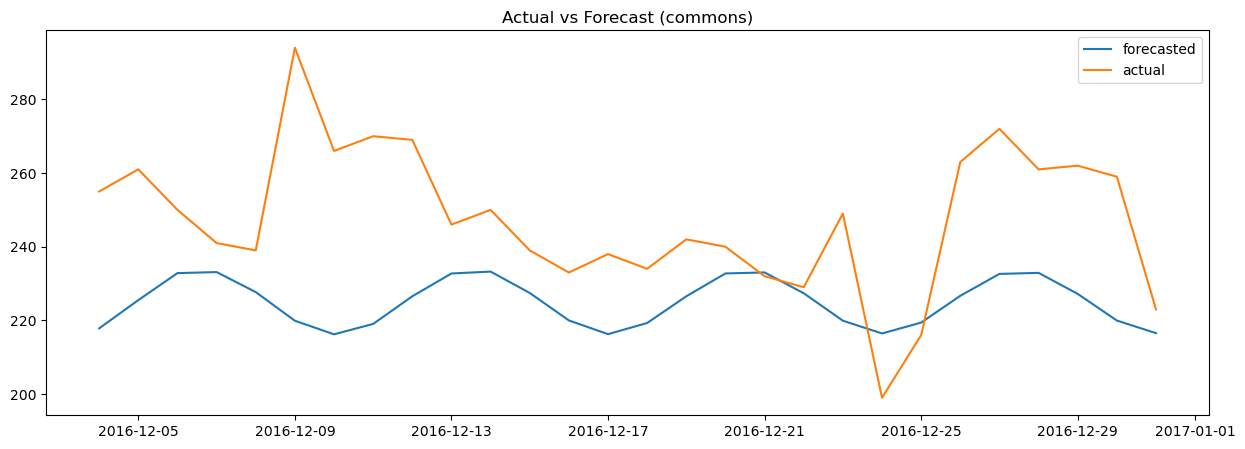

In [102]:
print(f'MAPE = {mean_absolute_percentage_error(commons_test, commons_arima_yhat)}')
plt.figure(figsize = (15, 5))
plt.plot(commons_arima_yhat, label = 'forecasted')
plt.plot(commons_test, label = 'actual')
plt.title('Actual vs Forecast (commons) - ARIMA Model')
plt.legend()
plt.show()

### **Hyperparameter Tuning of ARIMA Model for language `"german"`**

In [103]:
german_arima_config_list = arima_configs(p_params = list(range(1, 9)), d_params = [1], q_params = [6, 7, 8])

# grid search

german_arima_scores = arima_grid_search(german_train, german_arima_config_list, german_val)

# list top 3 configs
for german_config, german_error in german_arima_scores[:3]:
    p, d, q = german_config
    print(f'For (p, d, q) = ({p}, {d}, {q}), MAPE = {round(german_error, 3)}')
    print('-' * 150)

best_german_arima_config = german_arima_scores[0][0]

For (p, d, q) = (6, 1, 8), MAPE = 0.061
------------------------------------------------------------------------------------------------------------------------------------------------------
For (p, d, q) = (6, 1, 7), MAPE = 0.064
------------------------------------------------------------------------------------------------------------------------------------------------------
For (p, d, q) = (8, 1, 7), MAPE = 0.064
------------------------------------------------------------------------------------------------------------------------------------------------------


### **Test Error of ARIMA Model for language `"german"`**

In [104]:
best_german_arima_model = ARIMA(german_train_val, order = best_german_arima_config)
# fit model
best_german_arima_model_fit = best_german_arima_model.fit()
# forecast
german_arima_yhat = best_german_arima_model_fit.forecast(28)
mean_absolute_percentage_error(german_test, german_arima_yhat)

0.07353585453486763

MAPE = 0.07353585453486763


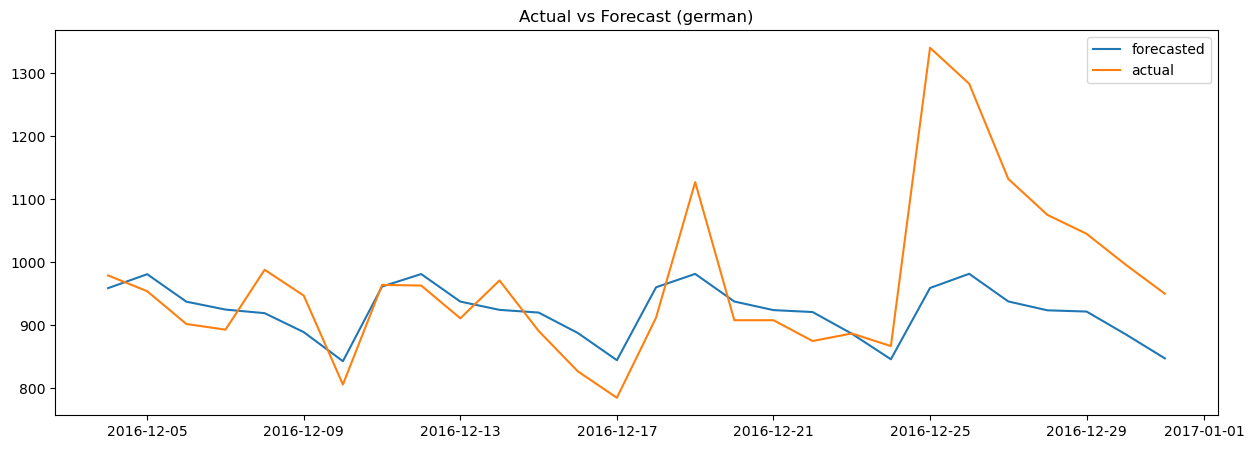

In [105]:
print(f'MAPE = {mean_absolute_percentage_error(german_test, german_arima_yhat)}')
plt.figure(figsize = (15, 5))
plt.plot(german_arima_yhat, label = 'forecasted')
plt.plot(german_test, label = 'actual')
plt.title('Actual vs Forecast (german) - ARIMA Model')
plt.legend()
plt.show()

### **Hyperparameter Tuning of ARIMA Model for language `"english"`**

In [106]:
english_arima_config_list = arima_configs(p_params = [1, 2], d_params = [1], q_params = [6, 7, 8])

# grid search

english_arima_scores = arima_grid_search(english_train, english_arima_config_list, english_val)

# list top 3 configs
for english_arima_config, english_arima_error in english_arima_scores[:3]:
    p, d, q = english_arima_config
    print(f'For (p, d, q) = ({p}, {d}, {q}), MAPE = {round(english_arima_error, 3)}')
    print('-' * 150)

best_english_arima_config = english_arima_scores[0][0]

For (p, d, q) = (2, 1, 6), MAPE = 0.068
------------------------------------------------------------------------------------------------------------------------------------------------------
For (p, d, q) = (2, 1, 8), MAPE = 0.075
------------------------------------------------------------------------------------------------------------------------------------------------------
For (p, d, q) = (1, 1, 8), MAPE = 0.078
------------------------------------------------------------------------------------------------------------------------------------------------------


### **Test Error of ARIMA Model for language `"english"`**

In [107]:
best_english_arima_model = ARIMA(english_train_val, order = best_english_arima_config)
# fit model
best_english_arima_model_fit = best_english_arima_model.fit()
# forecast
english_arima_yhat = best_english_arima_model_fit.forecast(28)
mean_absolute_percentage_error(english_test, english_arima_yhat)

0.06737362488993315

MAPE = 0.06737362488993315


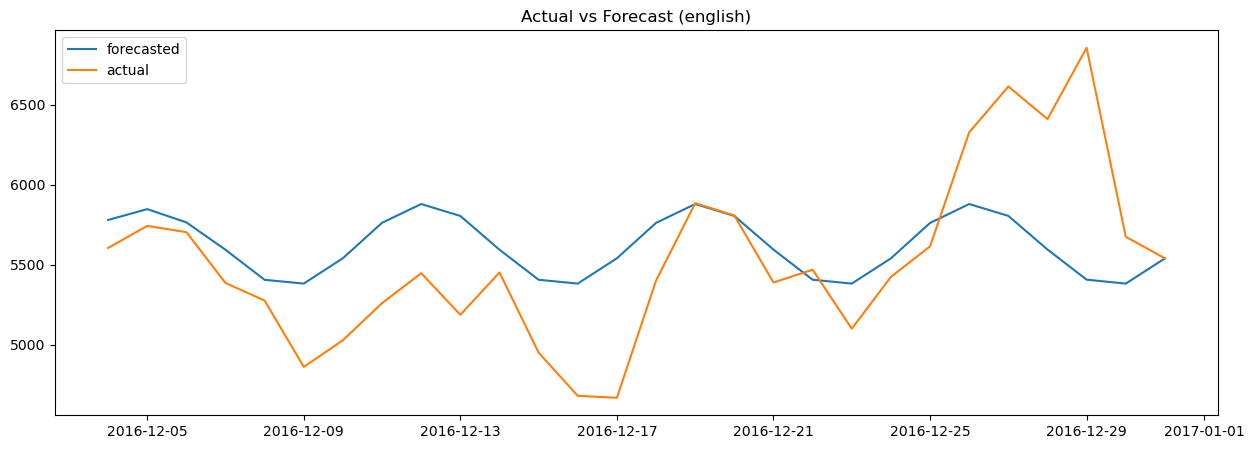

In [108]:
print(f'MAPE = {mean_absolute_percentage_error(english_test, english_arima_yhat)}')
plt.figure(figsize = (15, 5))
plt.plot(english_arima_yhat, label = 'forecasted')
plt.plot(english_test, label = 'actual')
plt.title('Actual vs Forecast (english) - ARIMA Model')
plt.legend()
plt.show()

### **Hyperparameter Tuning of ARIMA Model for language `"spanish"`**

In [109]:
spanish_arima_config_list = arima_configs(p_params = list(range(1, 10)), d_params = [1, 2, 3], q_params = [5, 6, 7, 8, 9])

# grid search

spanish_arima_scores = arima_grid_search(spanish_train, spanish_arima_config_list, spanish_val)

# list top 3 configs
for spanish_config, spanish_error in spanish_arima_scores[:3]:
    p, d, q = spanish_config
    print(f'For (p, d, q) = ({p}, {d}, {q}), MAPE = {round(spanish_error, 3)}')
    print('-' * 150)

best_spanish_arima_config = spanish_arima_scores[0][0]

For (p, d, q) = (2, 1, 7), MAPE = 0.083
------------------------------------------------------------------------------------------------------------------------------------------------------
For (p, d, q) = (5, 3, 6), MAPE = 0.084
------------------------------------------------------------------------------------------------------------------------------------------------------
For (p, d, q) = (2, 1, 5), MAPE = 0.084
------------------------------------------------------------------------------------------------------------------------------------------------------


### **Test Error of ARIMA Model for language `"spanish"`**

In [110]:
best_spanish_arima_model = ARIMA(spanish_train_val, order = best_spanish_arima_config)
# fit model
best_spanish_arima_model_fit = best_spanish_arima_model.fit()
# forecast
spanish_arima_yhat = best_spanish_arima_model_fit.forecast(28)
mean_absolute_percentage_error(spanish_test, spanish_arima_yhat)

0.20665263284710525

MAPE = 0.20665263284710525


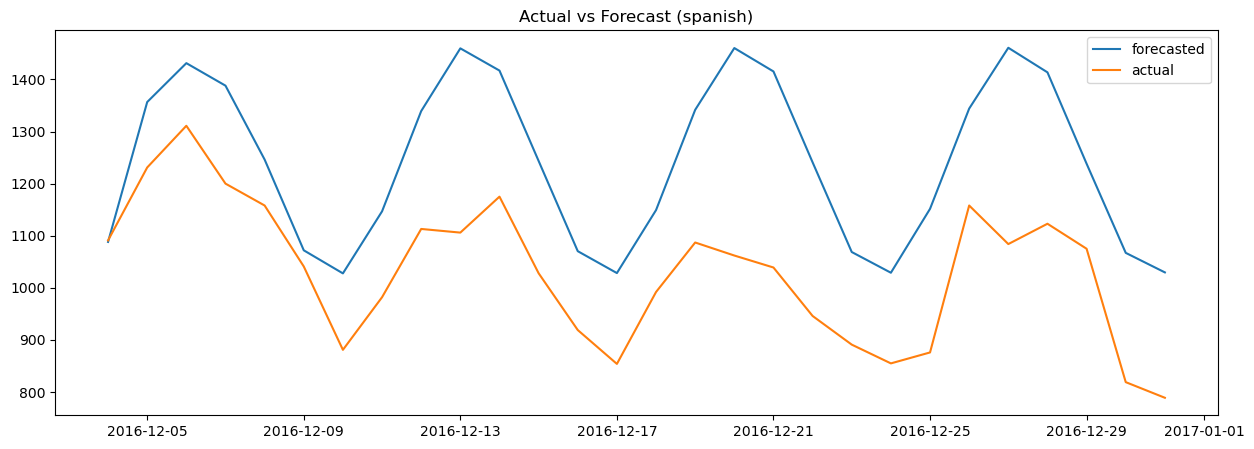

In [111]:
print(f'MAPE = {mean_absolute_percentage_error(spanish_test, spanish_arima_yhat)}')
plt.figure(figsize = (15, 5))
plt.plot(spanish_arima_yhat, label = 'forecasted')
plt.plot(spanish_test, label = 'actual')
plt.title('Actual vs Forecast (spanish) - ARIMA Model')
plt.legend()
plt.show()

### **Hyperparameter Tuning of ARIMA Model for language `"french"`**

In [112]:
french_arima_config_list = arima_configs(p_params = [1, 2], d_params = [1, 2], q_params = [6, 7, 8])

# grid search

french_arima_scores = arima_grid_search(french_train, french_arima_config_list, french_val)

# list top 3 configs
for french_config, french_error in french_arima_scores[:3]:
    p, d, q = french_config
    print(f'For (p, d, q) = ({p}, {d}, {q}), MAPE = {round(french_error, 3)}')
    print('-' * 150)

best_french_arima_config = french_arima_scores[0][0]

For (p, d, q) = (1, 1, 8), MAPE = 0.07
------------------------------------------------------------------------------------------------------------------------------------------------------
For (p, d, q) = (2, 1, 8), MAPE = 0.073
------------------------------------------------------------------------------------------------------------------------------------------------------
For (p, d, q) = (1, 1, 6), MAPE = 0.073
------------------------------------------------------------------------------------------------------------------------------------------------------


### **Test Error of ARIMA Model for language `"french"`**

In [113]:
best_french_arima_model = ARIMA(french_train_val, order = best_french_arima_config)
# fit model
best_french_arima_model_fit = best_french_arima_model.fit()
# forecast
french_arima_yhat = best_french_arima_model_fit.forecast(28)
mean_absolute_percentage_error(french_test, french_arima_yhat)

0.07408921422322509

MAPE = 0.07408921422322509


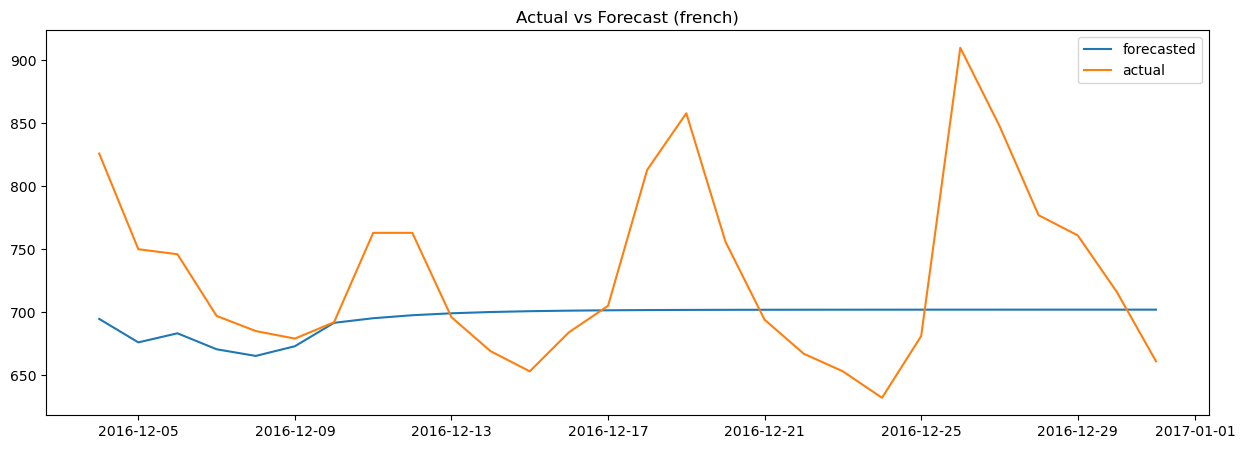

In [114]:
print(f'MAPE = {mean_absolute_percentage_error(french_test, french_arima_yhat)}')
plt.figure(figsize = (15, 5))
plt.plot(french_arima_yhat, label = 'forecasted')
plt.plot(french_test, label = 'actual')
plt.title('Actual vs Forecast (french) - ARIMA Model')
plt.legend()
plt.show()

### **Hyperparameter Tuning of ARIMA Model for language `"japanese"`**

In [115]:
japanese_arima_config_list = arima_configs(p_params = list(range(1, 9)), d_params = [1, 2], q_params = [6, 7, 8])

# grid search

japanese_arima_scores = arima_grid_search(japanese_train, japanese_arima_config_list, japanese_val)

# list top 3 configs
for japanese_config, japanese_error in japanese_arima_scores[:3]:
    p, d, q = japanese_config
    print(f'For (p, d, q) = ({p}, {d}, {q}), MAPE = {round(japanese_error, 3)}')
    print('-' * 150)

best_japanese_arima_config = japanese_arima_scores[0][0]

For (p, d, q) = (4, 1, 7), MAPE = 0.044
------------------------------------------------------------------------------------------------------------------------------------------------------
For (p, d, q) = (6, 1, 8), MAPE = 0.046
------------------------------------------------------------------------------------------------------------------------------------------------------
For (p, d, q) = (3, 1, 6), MAPE = 0.046
------------------------------------------------------------------------------------------------------------------------------------------------------


### **Test Error of ARIMA Model for language `"japanese"`**

In [116]:
best_japanese_arima_model = ARIMA(japanese_train_val, order = best_japanese_arima_config)
# fit model
best_japanese_arima_model_fit = best_japanese_arima_model.fit()
# forecast
japanese_arima_yhat = best_japanese_arima_model_fit.forecast(28)
mean_absolute_percentage_error(japanese_test, japanese_arima_yhat)

0.08720502433126234

MAPE = 0.08720502433126234


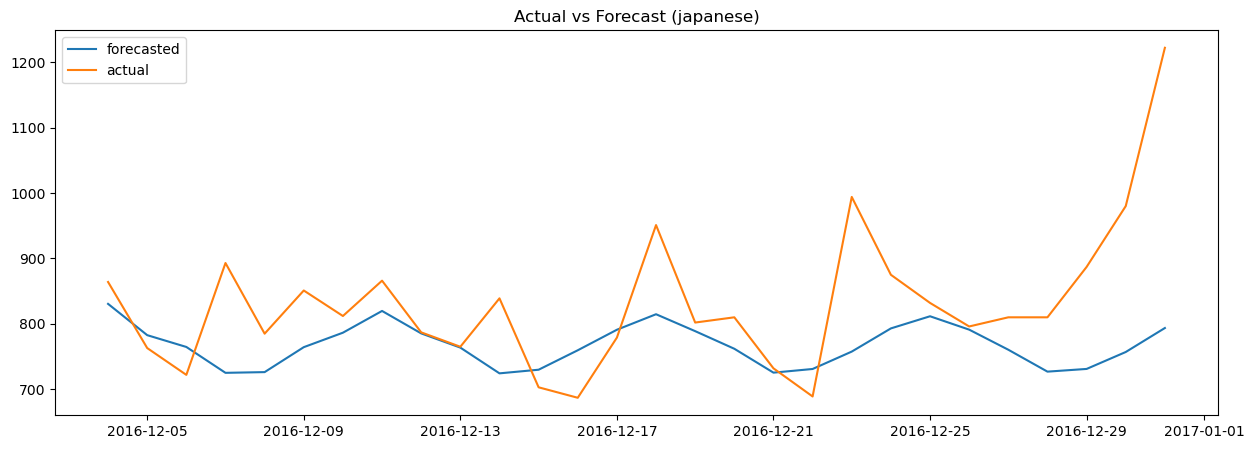

In [117]:
print(f'MAPE = {mean_absolute_percentage_error(japanese_test, japanese_arima_yhat)}')
plt.figure(figsize = (15, 5))
plt.plot(japanese_arima_yhat, label = 'forecasted')
plt.plot(japanese_test, label = 'actual')
plt.title('Actual vs Forecast (japanese) - ARIMA Model')
plt.legend()
plt.show()

### **Hyperparameter Tuning of ARIMA Model for language `"russian"`**

In [118]:
russian_arima_config_list = arima_configs(p_params = [1, 2, 3], d_params = [1], q_params = [0, 6, 7, 8])

# grid search

russian_arima_scores = arima_grid_search(russian_train, russian_arima_config_list, russian_val)

# list top 3 configs
for russian_config, russian_error in russian_arima_scores[:3]:
    p, d, q = russian_config
    print(f'For (p, d, q) = ({p}, {d}, {q}), MAPE = {round(russian_error, 3)}')
    print('-' * 150)

best_russian_arima_config = russian_arima_scores[0][0]

For (p, d, q) = (3, 1, 6), MAPE = 0.061
------------------------------------------------------------------------------------------------------------------------------------------------------
For (p, d, q) = (1, 1, 8), MAPE = 0.065
------------------------------------------------------------------------------------------------------------------------------------------------------
For (p, d, q) = (2, 1, 8), MAPE = 0.067
------------------------------------------------------------------------------------------------------------------------------------------------------


### **Test Error of ARIMA Model for language `"russian"`**

In [119]:
best_russian_arima_model = ARIMA(russian_train_val, order = best_russian_arima_config)
# fit model
best_russian_arima_model_fit = best_russian_arima_model.fit()
# forecast
russian_arima_yhat = best_russian_arima_model_fit.forecast(28)
mean_absolute_percentage_error(russian_test, russian_arima_yhat)

0.09272831161686677

MAPE = 0.09272831161686677


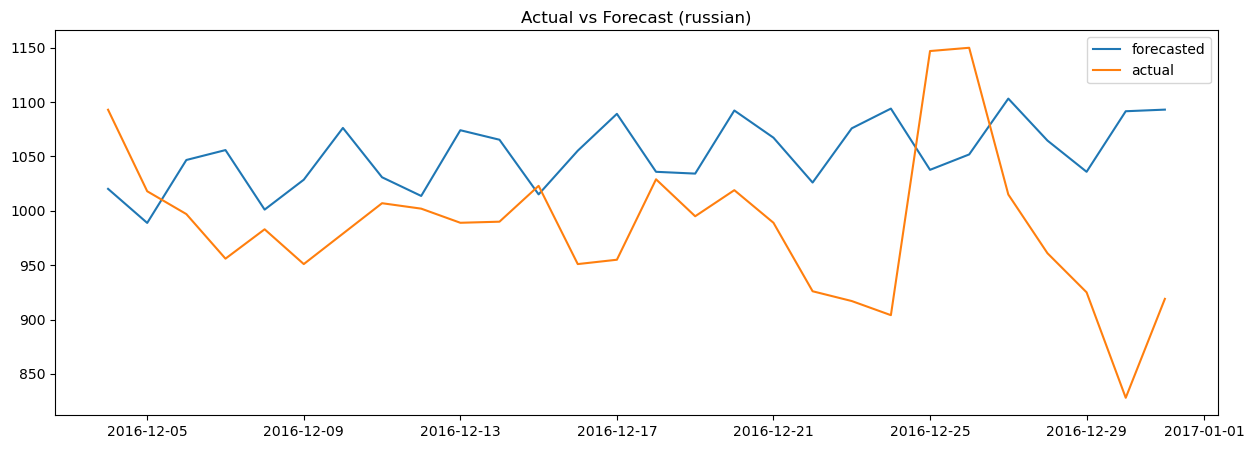

In [120]:
print(f'MAPE = {mean_absolute_percentage_error(russian_test, russian_arima_yhat)}')
plt.figure(figsize = (15, 5))
plt.plot(russian_arima_yhat, label = 'forecasted')
plt.plot(russian_test, label = 'actual')
plt.title('Actual vs Forecast (russian) - ARIMA Model')
plt.legend()
plt.show()

### **Hyperparameter Tuning of ARIMA Model for language `"www"`**

In [121]:
www_arima_config_list = arima_configs(p_params = [1, 2, 3, 4, 5], d_params = [1, 2, 3], q_params = [1, 2, 3, 6, 7, 8])

# grid search

www_arima_scores = arima_grid_search(www_train, www_arima_config_list, www_val)

# list top 3 configs
for www_config, www_error in www_arima_scores[:3]:
    p, d, q = www_config
    print(f'For (p, d, q) = ({p}, {d}, {q}), MAPE = {round(www_error, 3)}')
    print('-' * 150)

best_www_arima_config = www_arima_scores[0][0]

For (p, d, q) = (4, 2, 7), MAPE = 0.091
------------------------------------------------------------------------------------------------------------------------------------------------------
For (p, d, q) = (3, 2, 7), MAPE = 0.107
------------------------------------------------------------------------------------------------------------------------------------------------------
For (p, d, q) = (3, 2, 6), MAPE = 0.108
------------------------------------------------------------------------------------------------------------------------------------------------------


### **Test Error of ARIMA Model for language `"www"`**

In [122]:
best_www_arima_model = ARIMA(www_train_val, order = best_www_arima_config)
# fit model
best_www_arima_model_fit = best_www_arima_model.fit()
# forecast
www_arima_yhat = best_www_arima_model_fit.forecast(28)
mean_absolute_percentage_error(www_test, www_arima_yhat)

0.1560785448253181

MAPE = 0.1560785448253181


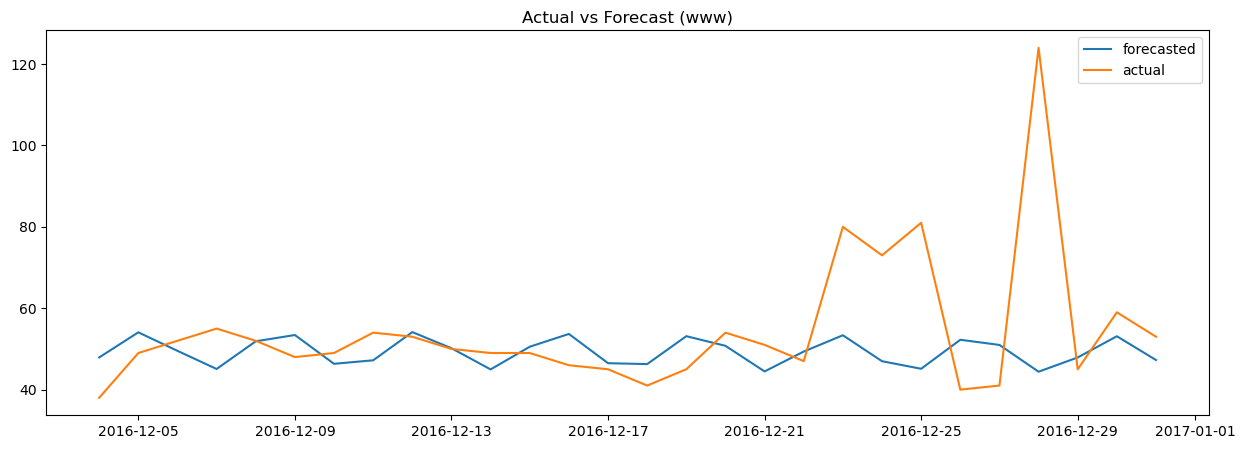

In [123]:
print(f'MAPE = {mean_absolute_percentage_error(www_test, www_arima_yhat)}')
plt.figure(figsize = (15, 5))
plt.plot(www_arima_yhat, label = 'forecasted')
plt.plot(www_test, label = 'actual')
plt.title('Actual vs Forecast (www) - ARIMA Model')
plt.legend()
plt.show()

### **Hyperparameter Tuning of ARIMA Model for language `"chinese"`**

In [124]:
chinese_arima_config_list = arima_configs(p_params = list(range(1, 9)), d_params = [1], q_params = [6, 7, 8])

# grid search

chinese_arima_scores = arima_grid_search(chinese_train, chinese_arima_config_list, chinese_val)

# list top 3 configs
for chinese_config, chinese_error in chinese_arima_scores[:3]:
    p, d, q = chinese_config
    print(f'For (p, d, q) = ({p}, {d}, {q}), MAPE = {round(chinese_error, 3)}')
    print('-' * 150)

best_chinese_arima_config = chinese_arima_scores[0][0]

For (p, d, q) = (8, 1, 8), MAPE = 0.05
------------------------------------------------------------------------------------------------------------------------------------------------------
For (p, d, q) = (7, 1, 7), MAPE = 0.054
------------------------------------------------------------------------------------------------------------------------------------------------------
For (p, d, q) = (8, 1, 7), MAPE = 0.055
------------------------------------------------------------------------------------------------------------------------------------------------------


### **Test Error of ARIMA Model for language `"chinese"`**

In [125]:
best_chinese_arima_model = ARIMA(chinese_train_val, order = best_chinese_arima_config)
# fit model
best_chinese_arima_model_fit = best_chinese_arima_model.fit()
# forecast
chinese_arima_yhat = best_chinese_arima_model_fit.forecast(28)
mean_absolute_percentage_error(chinese_test, chinese_arima_yhat)

0.047708404931566264

MAPE = 0.047708404931566264


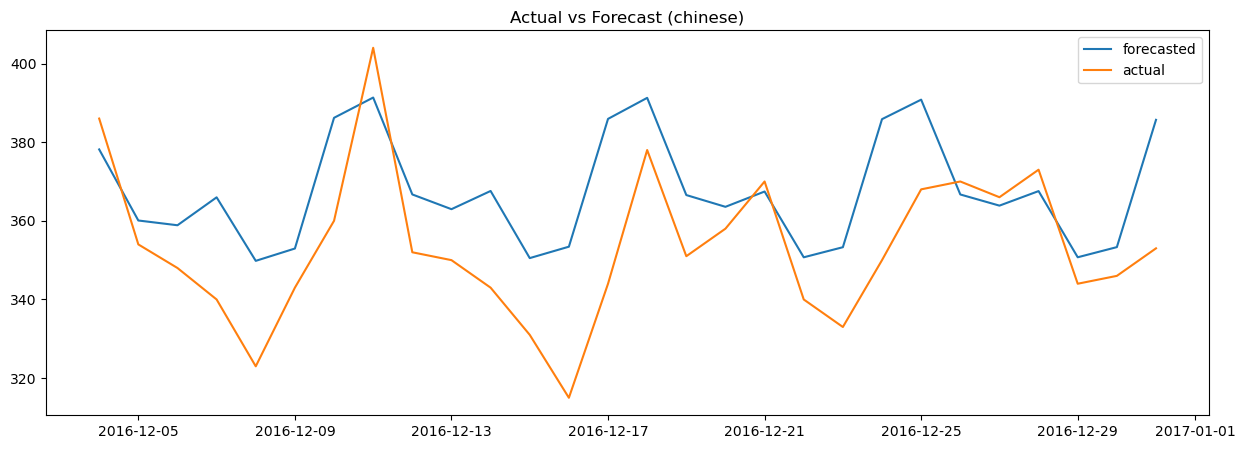

In [126]:
print(f'MAPE = {mean_absolute_percentage_error(chinese_test, chinese_arima_yhat)}')
plt.figure(figsize = (15, 5))
plt.plot(chinese_arima_yhat, label = 'forecasted')
plt.plot(chinese_test, label = 'actual')
plt.title('Actual vs Forecast (chinese) - ARIMA Model')
plt.legend()
plt.show()

## **SARIMA/SARIMAX Model**

In [127]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [128]:
exog = pd.read_csv(r'C:\Users\U403439\Downloads\Exog_Campaign_eng.csv')
exog.index = spanish.index

In [129]:
exog.head()

Exog
date            
2015-07-01     0
2015-07-02     0
2015-07-03     0
2015-07-04     0
2015-07-05     0

### **Data Splitting of exogenous feature into train, validation and test sets.**

In [130]:
exog_train_val, exog_test = np.split(exog, [-28])
exog_train, exog_val = np.split(exog_train_val, [-28])

#### **Framework similar to GridSearchCV for Hyperparameter Tuning of SARIMA/SARIMAX Model**

In [143]:
def sarimax_forecast(x_train, config, forecast_period, exog_train = None, exog_test = None):
    order, seasonal_order = config
    # define model
    if exog_train is not None and exog_test is not None:
        model = SARIMAX(x_train, order = order, seasonal_order = seasonal_order,
                        exog = exog_train, enforce_stationarity = False, enforce_invertibility = False)
    else:
        model = SARIMAX(x_train, order = order, seasonal_order = seasonal_order,
                        enforce_stationarity = False, enforce_invertibility = False)
    # fit model
    model_fit = model.fit()
    # forecast
    yhat = model_fit.forecast(forecast_period, exog = exog_test)
    return yhat


# walk-forward validation for univariate data
def sarimax_walk_forward_validation(x_train, x_test, config, exog_train = None, exog_test = None):
    forecast_period = len(x_test)
    if exog_train is not None and exog_test is not None:
        predictions = sarimax_forecast(x_train, config, forecast_period, exog_train, exog_test)
    else:
        predictions = sarimax_forecast(x_train, config, forecast_period)
    error = mean_absolute_percentage_error(x_test, predictions)
    return error


# score a model
def sarimax_score_model(x_train, x_test, config, exog_train = None, exog_test = None):
    # convert config to a key
    if exog_train is not None and exog_test is not None:
        result = sarimax_walk_forward_validation(x_train, x_test, config, exog_train, exog_test)
    else:
        result = sarimax_walk_forward_validation(x_train, x_test, config)
    return (config, result)

# grid search configs
def sarimax_grid_search(x_train, cfg_list, x_test, exog_train = None, exog_test = None, parallel = False):
    scores = None
    if parallel:
    # execute configs in parallel
        executor = Parallel(n_jobs = cpu_count(), backend = 'multiprocessing')
        if exog_train is not None and exog_test is not None:
            tasks = (delayed(sarimax_score_model)(x_train, x_test, config, exog_train, exog_test) 
                     for config in cfg_list)
        else:
            tasks = (delayed(sarimax_score_model)(x_train, x_test, config) for config in cfg_list)
        scores = executor(tasks)
    else:
        if exog_train is not None and exog_test is not None:
            scores = [sarimax_score_model(x_train, x_test, config, exog_train, exog_test) 
                      for config in cfg_list]
        else:
            scores = [sarimax_score_model(x_train, x_test, config) for config in cfg_list]
    # sort configs by error, asc
    scores.sort(key = lambda tup: tup[1])
    return scores

# create a set of arima configs to try
def sarimax_configs(p_params, d_params, q_params, P_params, D_params, Q_params, s_params):
    if type(p_params) == int:
        p_params = [p_params]
    if type(d_params) == int:
        d_params = [d_params]
    if type(q_params) == int:
        q_params = [q_params]
    if type(P_params) == int:
        P_params = [P_params]
    if type(D_params) == int:
        D_params = [D_params]
    if type(Q_params) == int:
        Q_params = [Q_params]
    if type(s_params) == int:
        s_params = [s_params]
    models = []
    
    # create config instances
    for p in p_params:
        for d in d_params:
            for q in q_params:
                for P in P_params:
                    for D in D_params:
                        for Q in Q_params:
                            for s in s_params:                            
                                order  = (p,d,q)
                                seasonal_order = (P, D, Q, s)
                                models.append([order, seasonal_order])
    return models

### **Hyperparameter Tuning of SARIMA Model for language `"commons"`**

In [ ]:
commons_sarima_config_list = sarimax_configs(p_params = 3, d_params = 1, q_params = 6, 
                                              P_params = list(range(4)), D_params = [1, 2], 
                                             Q_params = list(range(5)), s_params = [7, 8, 9])

# grid search

commons_sarima_scores = sarimax_grid_search(commons_train, commons_sarima_config_list, commons_val)

# list top 3 configs
for commons_sarima_config, commons_sarima_error in commons_sarima_scores[:3]:
    order, seasonal_order = commons_sarima_config
    p, d, q = order
    P, D, Q, s = seasonal_order
    print(f'For (p, d, q) = ({p}, {d}, {q}) and (P, D, Q, s) = ({P}, {D}, {Q}, {s}),\
            MAPE = {round(commons_sarima_error, 3)}')
    print('-' * 150)

best_commons_sarima_config = commons_sarima_scores[0][0]

For (p, d, q) = (3, 1, 6) and (P, D, Q, s) = (0, 1, 4, 7), MAPE = 0.027
------------------------------------------------------------------------------------------------------------------------------------------------------
For (p, d, q) = (3, 1, 6) and (P, D, Q, s) = (1, 1, 3, 7), MAPE = 0.03
------------------------------------------------------------------------------------------------------------------------------------------------------
For (p, d, q) = (3, 1, 6) and (P, D, Q, s) = (3, 1, 1, 7), MAPE = 0.031
------------------------------------------------------------------------------------------------------------------------------------------------------


### **Test Error of SARIMA Model for language `"commons"`**

In [147]:
best_commons_sarima_model = SARIMAX(commons_train_val, order = best_commons_sarima_config[0],
                                    seasonal_order = best_commons_sarima_config[1])
# fit model
best_commons_sarima_model_fit = best_commons_sarima_model.fit()
# forecast
commons_sarima_yhat = best_commons_sarima_model_fit.forecast(28)
mean_absolute_percentage_error(commons_test, commons_sarima_yhat)

0.07970011258851904

MAPE = 0.07970011258851904


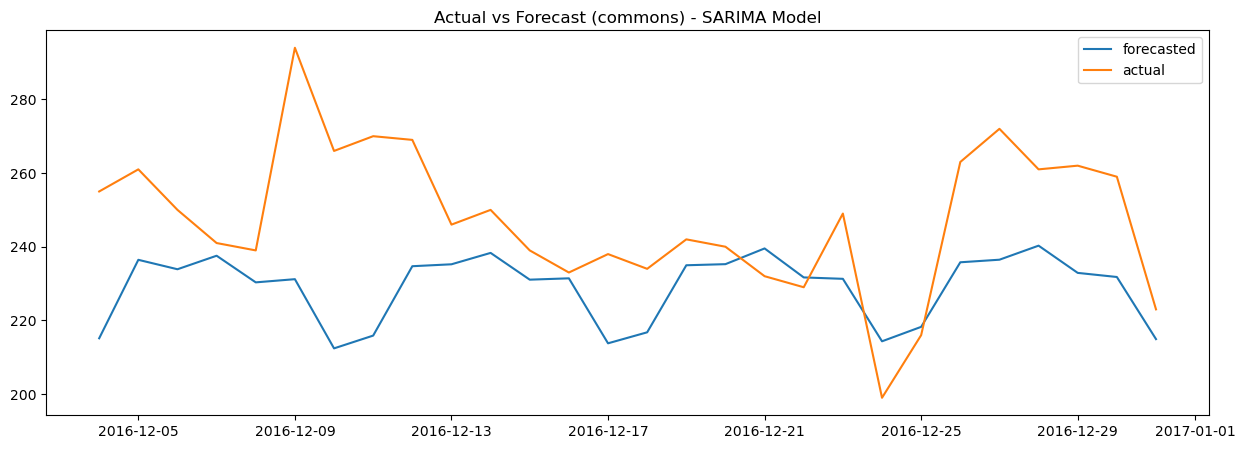

In [153]:
print(f'MAPE = {mean_absolute_percentage_error(commons_test, commons_sarima_yhat)}')
plt.figure(figsize = (15, 5))
plt.plot(commons_sarima_yhat, label = 'forecasted')
plt.plot(commons_test, label = 'actual')
plt.title('Actual vs Forecast (commons) - SARIMA Model')
plt.legend()
plt.show()

### **Hyperparameter Tuning of SARIMA Model for language `"german"`**

In [154]:
german_sarima_config_list = sarimax_configs(p_params = 6, d_params = 1, q_params = 7, 
                                              P_params = list(range(4)), D_params = [1, 2], 
                                            Q_params = list(range(5)), s_params = [8, 9])

# grid search

german_sarima_scores = sarimax_grid_search(german_train, german_sarima_config_list, german_val)

# list top 3 configs
for german_sarima_config, german_sarima_error in german_sarima_scores[:3]:
    order, seasonal_order = german_sarima_config
    p, d, q = order
    P, D, Q, s = seasonal_order
    print(f'For (p, d, q) = ({p}, {d}, {q}) and (P, D, Q, s) = ({P}, {D}, {Q}, {s}),\
            MAPE = {round(german_sarima_error, 3)}')
    print('-' * 150)

best_german_sarima_config = german_sarima_scores[0][0]

For (p, d, q) = (6, 1, 7) and (P, D, Q, s) = (2, 1, 1, 9),            MAPE = 0.058
------------------------------------------------------------------------------------------------------------------------------------------------------
For (p, d, q) = (6, 1, 7) and (P, D, Q, s) = (3, 1, 0, 9),            MAPE = 0.058
------------------------------------------------------------------------------------------------------------------------------------------------------
For (p, d, q) = (6, 1, 7) and (P, D, Q, s) = (0, 1, 4, 9),            MAPE = 0.059
------------------------------------------------------------------------------------------------------------------------------------------------------


### **Test Error of SARIMA Model for language `"german"`**

In [155]:
best_german_sarima_model = SARIMAX(german_train_val, order = best_german_sarima_config[0],
                                   seasonal_order = best_german_sarima_config[1])
# fit model
best_german_sarima_model_fit = best_german_sarima_model.fit()
# forecast
german_sarima_yhat = best_german_sarima_model_fit.forecast(28)
mean_absolute_percentage_error(german_test, german_sarima_yhat)

0.07908775791070445

MAPE = 0.07908775791070445


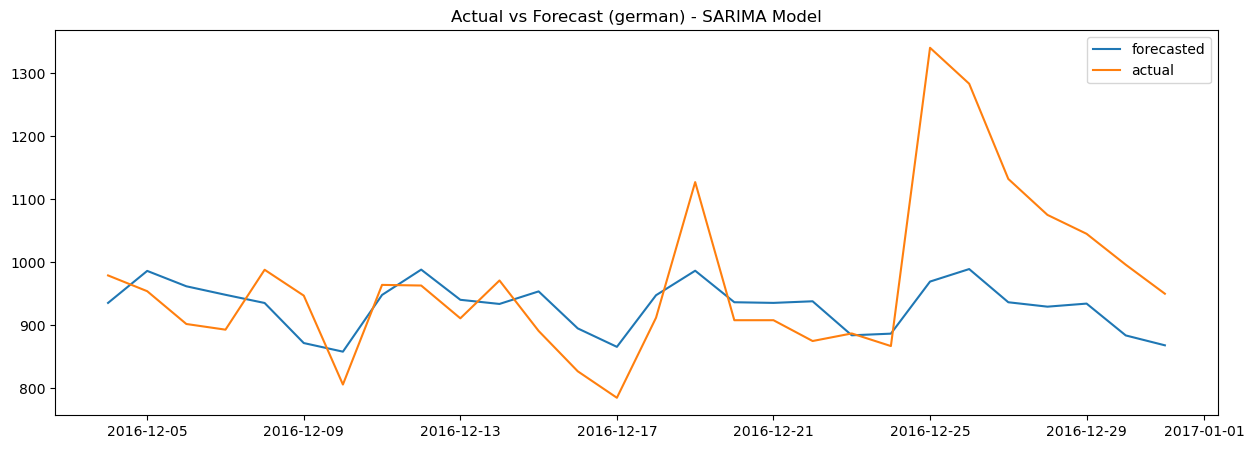

In [156]:
print(f'MAPE = {mean_absolute_percentage_error(german_test, german_sarima_yhat)}')
plt.figure(figsize = (15, 5))
plt.plot(german_sarima_yhat, label = 'forecasted')
plt.plot(german_test, label = 'actual')
plt.title('Actual vs Forecast (german) - SARIMA Model')
plt.legend()
plt.show()

### **Hyperparameter Tuning of SARIMAX Model for language `"english"`**

In [157]:
english_sarimax_config_list = sarimax_configs(p_params = best_english_arima_config[0],
                                              d_params = best_english_arima_config[1],
                                              q_params = best_english_arima_config[2], 
                                              P_params = list(range(4)), D_params = [1, 2],
                                              Q_params = list(range(5)), s_params = [7, 8, 9])

# grid search

english_sarimax_scores = sarimax_grid_search(english_train, english_sarimax_config_list,
                                             english_val, exog_train, exog_val)

# list top 3 configs
for english_sarimax_config, english_sarimax_error in english_sarimax_scores[:3]:
    order, seasonal_order = english_sarimax_config
    p, d, q = order
    P, D, Q, s = seasonal_order
    print(f'For (p, d, q) = ({p}, {d}, {q}) and (P, D, Q, s) = ({P}, {D}, {Q}, {s}),\
            MAPE = {round(english_sarimax_error, 3)}')
    print('-' * 150)

best_english_sarimax_config = english_sarimax_scores[0][0]

For (p, d, q) = (2, 1, 6) and (P, D, Q, s) = (0, 1, 3, 7),            MAPE = 0.051
------------------------------------------------------------------------------------------------------------------------------------------------------
For (p, d, q) = (2, 1, 6) and (P, D, Q, s) = (1, 1, 3, 7),            MAPE = 0.052
------------------------------------------------------------------------------------------------------------------------------------------------------
For (p, d, q) = (2, 1, 6) and (P, D, Q, s) = (1, 1, 4, 7),            MAPE = 0.053
------------------------------------------------------------------------------------------------------------------------------------------------------


### **Test Error of SARIMA Model for language `"english"`**

In [193]:
best_english_sarimax_model = SARIMAX(english_train_val, exog = exog_train_val, 
                                     order = best_english_sarimax_config[0], 
                                     seasonal_order = best_english_sarimax_config[1],
                                     enforce_stationarity = False, enforce_invertibility = False)
# fit model
best_english_sarimax_model_fit = best_english_sarimax_model.fit()
# forecast
english_sarimax_yhat = best_english_sarimax_model_fit.forecast(28, exog = exog_test)
mean_absolute_percentage_error(english_test, english_sarimax_yhat)

0.05027189237233613

MAPE = 0.05027189237233613


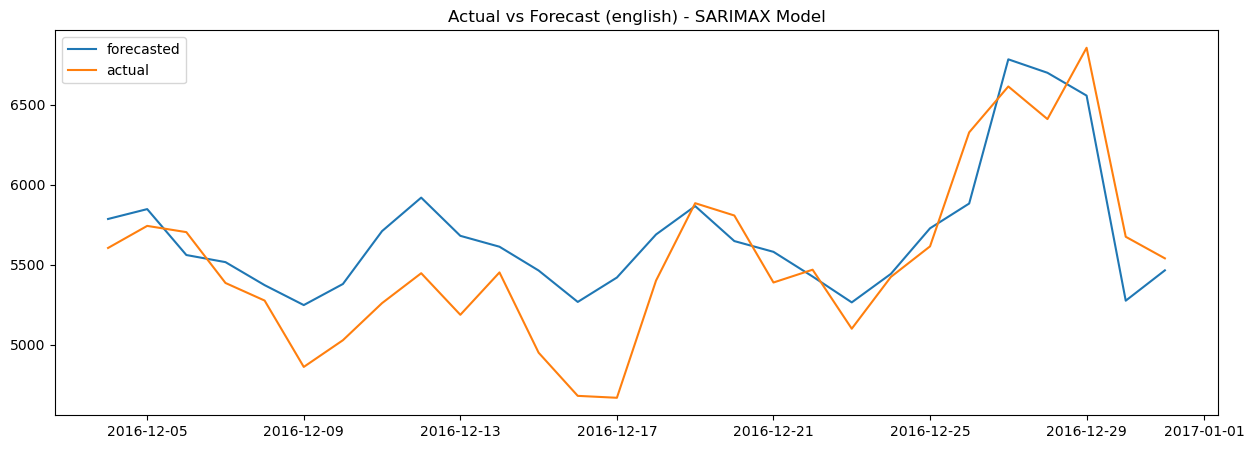

In [194]:
print(f'MAPE = {mean_absolute_percentage_error(english_test, english_sarimax_yhat)}')
plt.figure(figsize = (15, 5))
plt.plot(english_sarimax_yhat, label = 'forecasted')
plt.plot(english_test, label = 'actual')
plt.title('Actual vs Forecast (english) - SARIMAX Model')
plt.legend()
plt.show()

### **Hyperparameter Tuning of SARIMA Model for language `"spanish"`**

In [160]:
spanish_sarima_config_list = sarimax_configs(p_params = 2, d_params = 1, q_params = 5, 
                                             P_params = list(range(4)), D_params = [1, 2],
                                             Q_params = list(range(5)), s_params = [6, 7, 8])

# grid search

spanish_sarima_scores = sarimax_grid_search(spanish_train, spanish_sarima_config_list, spanish_val)

# list top 3 configs
for spanish_sarima_config, spanish_sarima_error in spanish_sarima_scores[:3]:
    order, seasonal_order = spanish_sarima_config
    p, d, q = order
    P, D, Q, s = seasonal_order
    print(f'For (p, d, q) = ({p}, {d}, {q}) and (P, D, Q, s) = ({P}, {D}, {Q}, {s}),\
            MAPE = {round(spanish_sarima_error, 3)}')
    print('-' * 150)

best_spanish_sarima_config = spanish_sarima_scores[0][0]

For (p, d, q) = (2, 1, 5) and (P, D, Q, s) = (0, 1, 1, 7),            MAPE = 0.076
------------------------------------------------------------------------------------------------------------------------------------------------------
For (p, d, q) = (2, 1, 5) and (P, D, Q, s) = (0, 2, 2, 7),            MAPE = 0.077
------------------------------------------------------------------------------------------------------------------------------------------------------
For (p, d, q) = (2, 1, 5) and (P, D, Q, s) = (2, 2, 2, 7),            MAPE = 0.077
------------------------------------------------------------------------------------------------------------------------------------------------------


### **Test Error of SARIMA Model for language `"spanish"`**

In [197]:
best_spanish_sarima_model = SARIMAX(spanish_train_val, order = best_spanish_sarima_config[0],
                                    seasonal_order = best_spanish_sarima_config[1],
                                    enforce_stationarity = False, enforce_invertibility = False)
# fit model
best_spanish_sarima_model_fit = best_spanish_sarima_model.fit()
# forecast
spanish_sarima_yhat = best_spanish_sarima_model_fit.forecast(28)
mean_absolute_percentage_error(spanish_test, spanish_sarima_yhat)

0.20698888664345852

MAPE = 0.20698888664345852


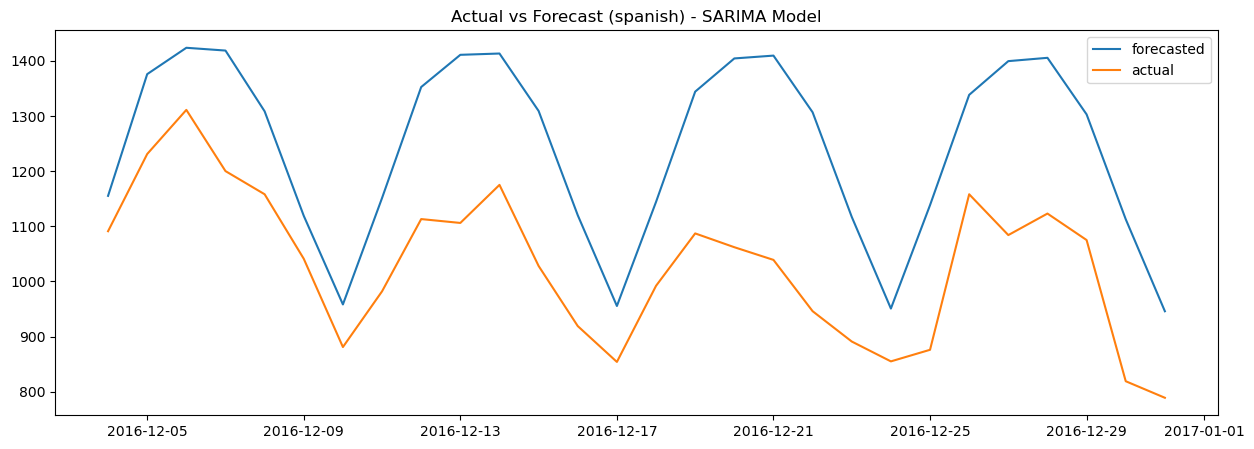

In [198]:
print(f'MAPE = {mean_absolute_percentage_error(spanish_test, spanish_sarima_yhat)}')
plt.figure(figsize = (15, 5))
plt.plot(spanish_sarima_yhat, label = 'forecasted')
plt.plot(spanish_test, label = 'actual')
plt.title('Actual vs Forecast (spanish) - SARIMA Model')
plt.legend()
plt.show()

### **Hyperparameter Tuning of SARIMA Model for language `"french"`**

In [163]:
french_sarima_config_list = sarimax_configs(p_params = 1, d_params = 1, q_params = 6, 
                                              P_params = list(range(4)), D_params = [1, 2],
                                            Q_params = list(range(5)), s_params = [7, 8])

# grid search

french_sarima_scores = sarimax_grid_search(french_train, french_sarima_config_list, french_val)

# list top 3 configs
for french_sarima_config, french_sarima_error in french_sarima_scores[:3]:
    order, seasonal_order = french_sarima_config
    p, d, q = order
    P, D, Q, s = seasonal_order
    print(f'For (p, d, q) = ({p}, {d}, {q}) and (P, D, Q, s) = ({P}, {D}, {Q}, {s}),\
            MAPE = {round(french_sarima_error, 3)}')
    print('-' * 150)

best_french_sarima_config = french_sarima_scores[0][0]

For (p, d, q) = (1, 1, 6) and (P, D, Q, s) = (3, 1, 0, 7),            MAPE = 0.049
------------------------------------------------------------------------------------------------------------------------------------------------------
For (p, d, q) = (1, 1, 6) and (P, D, Q, s) = (2, 2, 2, 7),            MAPE = 0.051
------------------------------------------------------------------------------------------------------------------------------------------------------
For (p, d, q) = (1, 1, 6) and (P, D, Q, s) = (3, 2, 1, 7),            MAPE = 0.054
------------------------------------------------------------------------------------------------------------------------------------------------------


### **Test Error of SARIMA Model for language `"french"`**

In [199]:
best_french_sarima_model = SARIMAX(french_train_val, order = best_french_sarima_config[0],
                                   seasonal_order = best_french_sarima_config[1],
                                    enforce_stationarity = False, enforce_invertibility = False)
# fit model
best_french_sarima_model_fit = best_french_sarima_model.fit()
# forecast
french_sarima_yhat = best_french_sarima_model_fit.forecast(28)
mean_absolute_percentage_error(french_test, french_sarima_yhat)

0.07101399741589723

MAPE = 0.07101399741589723


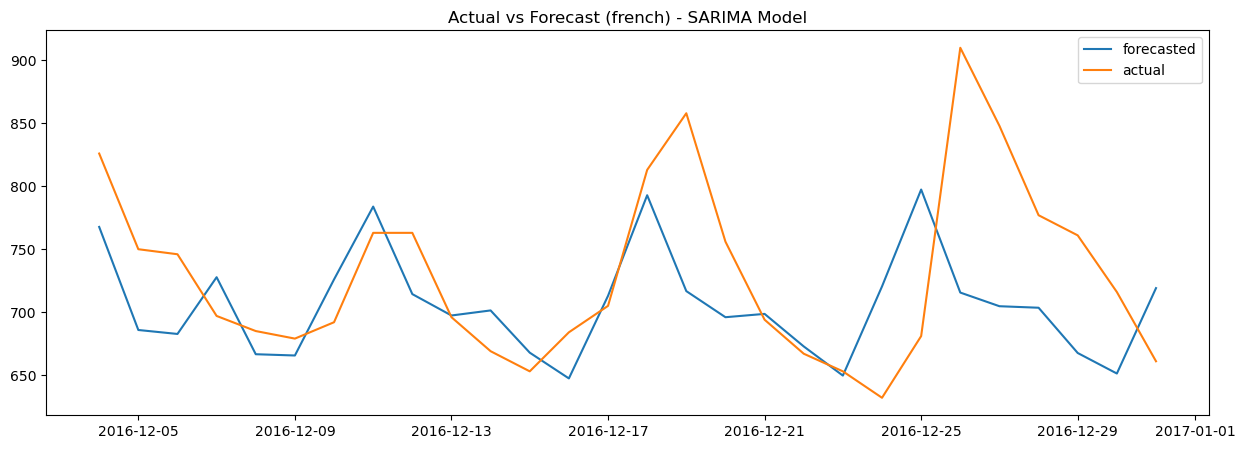

In [200]:
print(f'MAPE = {mean_absolute_percentage_error(french_test, french_sarima_yhat)}')
plt.figure(figsize = (15, 5))
plt.plot(french_sarima_yhat, label = 'forecasted')
plt.plot(french_test, label = 'actual')
plt.title('Actual vs Forecast (french) - SARIMA Model')
plt.legend()
plt.show()

### **Hyperparameter Tuning of SARIMA Model for language `"japanese"`**

In [166]:
japanese_sarima_config_list = sarimax_configs(p_params = 3, d_params = 1, q_params = 6, 
                                              P_params = list(range(4)), D_params = [1, 2],
                                              Q_params = list(range(5)), s_params = [7, 8])

# grid search

japanese_sarima_scores = sarimax_grid_search(japanese_train, japanese_sarima_config_list, japanese_val)

# list top 3 configs
for japanese_sarima_config, japanese_sarima_error in japanese_sarima_scores[:3]:
    order, seasonal_order = japanese_sarima_config
    p, d, q = order
    P, D, Q, s = seasonal_order
    print(f'For (p, d, q) = ({p}, {d}, {q}) and (P, D, Q, s) = ({P}, {D}, {Q}, {s}),\
            MAPE = {round(japanese_sarima_error, 3)}')
    print('-' * 150)

best_japanese_sarima_config = japanese_sarima_scores[0][0]

For (p, d, q) = (3, 1, 6) and (P, D, Q, s) = (1, 1, 2, 7),            MAPE = 0.039
------------------------------------------------------------------------------------------------------------------------------------------------------
For (p, d, q) = (3, 1, 6) and (P, D, Q, s) = (0, 1, 2, 7),            MAPE = 0.039
------------------------------------------------------------------------------------------------------------------------------------------------------
For (p, d, q) = (3, 1, 6) and (P, D, Q, s) = (2, 1, 2, 7),            MAPE = 0.04
------------------------------------------------------------------------------------------------------------------------------------------------------


### **Test Error of SARIMA Model for language `"japanese"`**

In [203]:
best_japanese_sarima_model = SARIMAX(japanese_train_val, order = best_japanese_sarima_config[0],
                                     seasonal_order = best_japanese_sarima_config[1])
# fit model
best_japanese_sarima_model_fit = best_japanese_sarima_model.fit()
# forecast
japanese_sarima_yhat = best_japanese_sarima_model_fit.forecast(28)
mean_absolute_percentage_error(japanese_test, japanese_sarima_yhat)

0.07761154044497938

MAPE = 0.07761154044497938


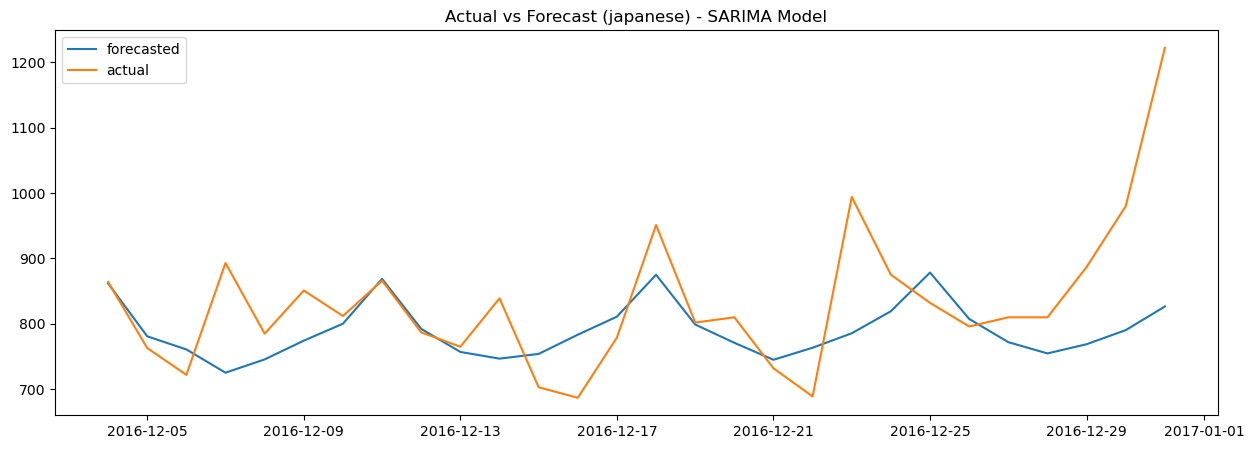

In [168]:
print(f'MAPE = {mean_absolute_percentage_error(japanese_test, japanese_sarima_yhat)}')
plt.figure(figsize = (15, 5))
plt.plot(japanese_sarima_yhat, label = 'forecasted')
plt.plot(japanese_test, label = 'actual')
plt.title('Actual vs Forecast (japanese) - SARIMA Model')
plt.legend()
plt.show()

### **Hyperparameter Tuning of SARIMA Model for language `"russian"`**

In [169]:
russian_sarima_config_list = sarimax_configs(p_params = 3, d_params = 1, q_params = 6, 
                                              P_params = list(range(4)), D_params = [1, 2],
                                             Q_params = list(range(5)), s_params = [7, 8])

# grid search

russian_sarima_scores = sarimax_grid_search(russian_train, russian_sarima_config_list, russian_val)

# list top 3 configs
for russian_sarima_config, russian_sarima_error in russian_sarima_scores[:3]:
    order, seasonal_order = russian_sarima_config
    p, d, q = order
    P, D, Q, s = seasonal_order
    print(f'For (p, d, q) = ({p}, {d}, {q}) and (P, D, Q, s) = ({P}, {D}, {Q}, {s}),\
            MAPE = {round(russian_sarima_error, 3)}')
    print('-' * 150)

best_russian_sarima_config = russian_sarima_scores[0][0]

For (p, d, q) = (3, 1, 6) and (P, D, Q, s) = (0, 1, 4, 7),            MAPE = 0.052
------------------------------------------------------------------------------------------------------------------------------------------------------
For (p, d, q) = (3, 1, 6) and (P, D, Q, s) = (1, 1, 1, 7),            MAPE = 0.053
------------------------------------------------------------------------------------------------------------------------------------------------------
For (p, d, q) = (3, 1, 6) and (P, D, Q, s) = (2, 1, 2, 7),            MAPE = 0.053
------------------------------------------------------------------------------------------------------------------------------------------------------


### **Test Error of SARIMA Model for language `"russian"`**

In [173]:
best_russian_sarima_model = SARIMAX(russian_train_val, order = best_russian_sarima_config[0],
                                    seasonal_order = best_russian_sarima_config[1],
                                    enforce_stationarity = False, enforce_invertibility = False)
# fit model
best_russian_sarima_model_fit = best_russian_sarima_model.fit()
# forecast
russian_sarima_yhat = best_russian_sarima_model_fit.forecast(28)
mean_absolute_percentage_error(russian_test, russian_sarima_yhat)

0.11074050481744917

MAPE = 0.11074050481744917


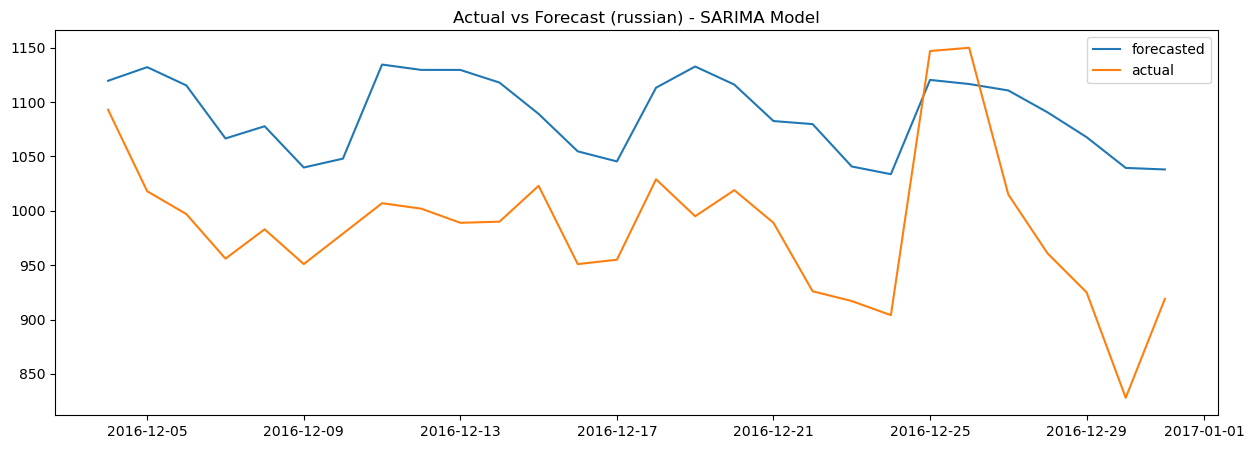

In [174]:
print(f'MAPE = {mean_absolute_percentage_error(russian_test, russian_sarima_yhat)}')
plt.figure(figsize = (15, 5))
plt.plot(russian_sarima_yhat, label = 'forecasted')
plt.plot(russian_test, label = 'actual')
plt.title('Actual vs Forecast (russian) - SARIMA Model')
plt.legend()
plt.show()

### **Hyperparameter Tuning of SARIMA Model for language `"www"`**

In [175]:
www_sarima_config_list = sarimax_configs(p_params = best_www_arima_config[0],
                                         d_params = best_www_arima_config[1],
                                         q_params = best_www_arima_config[2], 
                                         P_params = list(range(4)), D_params = [1, 2],
                                         Q_params = list(range(5)), s_params = [8, 9])

# grid search

www_sarima_scores = sarimax_grid_search(www_train, www_sarima_config_list, www_val)

# list top 3 configs
for www_sarima_config, www_sarima_error in www_sarima_scores[:3]:
    order, seasonal_order = www_sarima_config
    p, d, q = order
    P, D, Q, s = seasonal_order
    print(f'For (p, d, q) = ({p}, {d}, {q}) and (P, D, Q, s) = ({P}, {D}, {Q}, {s}),\
            MAPE = {round(www_sarima_error, 3)}')
    print('-' * 150)

best_www_sarima_config = www_sarima_scores[0][0]

For (p, d, q) = (4, 2, 7) and (P, D, Q, s) = (2, 1, 2, 8),            MAPE = 0.113
------------------------------------------------------------------------------------------------------------------------------------------------------
For (p, d, q) = (4, 2, 7) and (P, D, Q, s) = (1, 1, 1, 8),            MAPE = 0.121
------------------------------------------------------------------------------------------------------------------------------------------------------
For (p, d, q) = (4, 2, 7) and (P, D, Q, s) = (1, 1, 3, 8),            MAPE = 0.123
------------------------------------------------------------------------------------------------------------------------------------------------------


### **Test Error of SARIMA Model for language `"www"`**

In [205]:
best_www_sarima_model = SARIMAX(www_train_val, order = best_www_sarima_config[0],
                                seasonal_order = best_www_sarima_config[1],
                                enforce_stationarity = False, enforce_invertibility = False)
# fit model
best_www_sarima_model_fit = best_www_sarima_model.fit()
# forecast
www_sarima_yhat = best_www_sarima_model_fit.forecast(28)
mean_absolute_percentage_error(www_test, www_sarima_yhat)

0.15665901626863762

MAPE = 0.15665901626863762


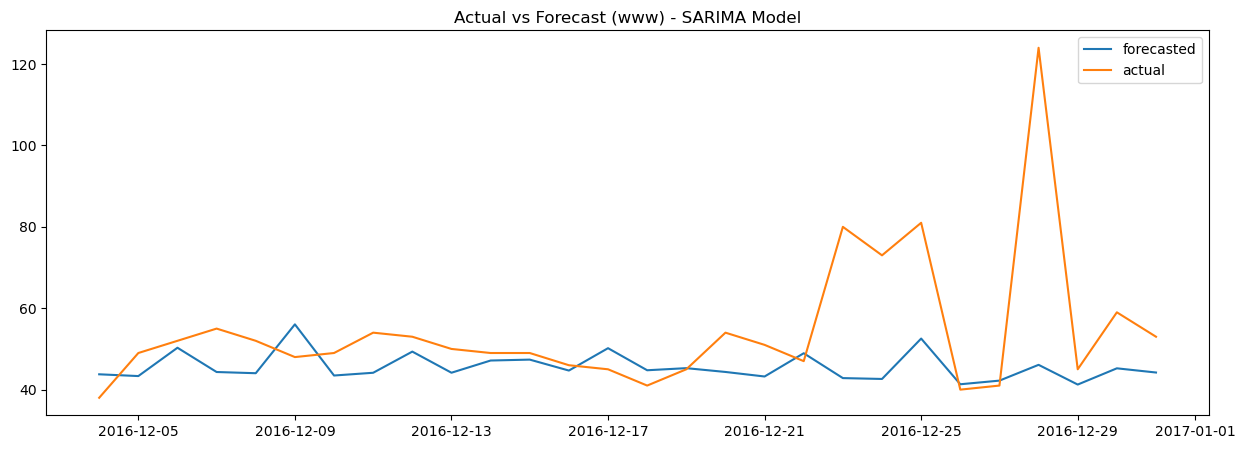

In [208]:
print(f'MAPE = {mean_absolute_percentage_error(www_test, www_sarima_yhat)}')
plt.figure(figsize = (15, 5))
plt.plot(www_sarima_yhat, label = 'forecasted')
plt.plot(www_test, label = 'actual')
plt.title('Actual vs Forecast (www) - SARIMA Model')
plt.legend()
plt.show()

### **Hyperparameter Tuning of SARIMA Model for language `"chinese"`**

In [178]:
chinese_sarima_config_list = sarimax_configs(p_params = 7, d_params = 1, q_params = 7, 
                                              P_params = list(range(4)), D_params = [1, 2],
                                             Q_params = list(range(5)), s_params = [8, 9])

# grid search

chinese_sarima_scores = sarimax_grid_search(chinese_train, chinese_sarima_config_list, chinese_val)

# list top 3 configs
for chinese_sarima_config, chinese_sarima_error in chinese_sarima_scores[:3]:
    order, seasonal_order = chinese_sarima_config
    p, d, q = order
    P, D, Q, s = seasonal_order
    print(f'For (p, d, q) = ({p}, {d}, {q}) and (P, D, Q, s) = ({P}, {D}, {Q}, {s}),\
            MAPE = {round(chinese_sarima_error, 3)}')
    print('-' * 150)

best_chinese_sarima_config = chinese_sarima_scores[0][0]

For (p, d, q) = (7, 1, 7) and (P, D, Q, s) = (2, 2, 3, 8),            MAPE = 0.05
------------------------------------------------------------------------------------------------------------------------------------------------------
For (p, d, q) = (7, 1, 7) and (P, D, Q, s) = (2, 1, 2, 9),            MAPE = 0.05
------------------------------------------------------------------------------------------------------------------------------------------------------
For (p, d, q) = (7, 1, 7) and (P, D, Q, s) = (2, 1, 0, 9),            MAPE = 0.051
------------------------------------------------------------------------------------------------------------------------------------------------------


### **Test Error of SARIMA Model for language `"chinese"`**

In [179]:
best_chinese_sarima_model = SARIMAX(chinese_train_val, order = best_chinese_sarima_config[0],
                                    seasonal_order = best_chinese_sarima_config[1],
                                    enforce_stationarity = False, enforce_invertibility = False)
# fit model
best_chinese_sarima_model_fit = best_chinese_sarima_model.fit()
# forecast
chinese_sarima_yhat = best_chinese_sarima_model_fit.forecast(28)
mean_absolute_percentage_error(chinese_test, chinese_sarima_yhat)

0.044564838382336644

MAPE = 0.044564838382336644


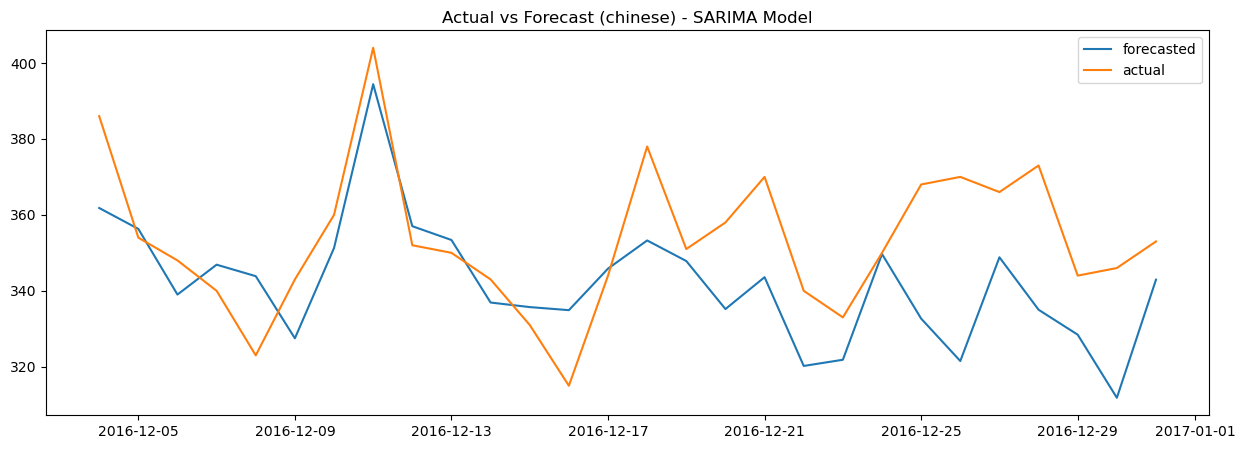

In [207]:
print(f'MAPE = {mean_absolute_percentage_error(chinese_test, chinese_sarima_yhat)}')
plt.figure(figsize = (15, 5))
plt.plot(chinese_sarima_yhat, label = 'forecasted')
plt.plot(chinese_test, label = 'actual')
plt.title('Actual vs Forecast (chinese) - SARIMA Model')
plt.legend()
plt.show()

In [10]:
!pip install pystan~=2.14
import pystan
!pip install prophet

In [13]:
from prophet import Prophet
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install ruptures
import ruptures as rpt

## **Renaming the date column to `"ds"` and target variable to `"y"` in accordance with "Prophet" library**.

In [10]:
commons = commons.reset_index().rename(columns = {'date': 'ds', 'commons': 'y'})
german = german.reset_index().rename(columns = {'date': 'ds', 'de': 'y'})
spanish = spanish.reset_index().rename(columns = {'date': 'ds', 'es': 'y'})
french = french.reset_index().rename(columns = {'date': 'ds', 'fr': 'y'})
japanese = japanese.reset_index().rename(columns = {'date': 'ds', 'ja': 'y'})
russian = russian.reset_index().rename(columns = {'date': 'ds', 'ru': 'y'})
www = www.reset_index().rename(columns = {'date': 'ds', 'www': 'y'})
chinese = chinese.reset_index().rename(columns = {'date': 'ds', 'zh': 'y'})

english = english.reset_index().rename(columns = {'date': 'ds', 'en': 'y'})
exog = exog.reset_index().rename(columns = {'date': 'ds', 'Exog': 'Holiday'})
english = english.merge(exog, on = 'ds')

## **Identifying Change Points with `ruptures` library**

In [220]:
commons_rpt = rpt.Pelt(model = "rbf").fit(np.array(commons_train_val.set_index('ds')['y']))
commons_cp_index = commons_rpt.predict(pen = 5)[:-1]
commons_cp_dates = commons_train_val.loc[commons_cp_index, 'ds'].values

german_rpt = rpt.Pelt(model = "rbf").fit(np.array(german_train_val.set_index('ds')['y']))
german_cp_index = german_rpt.predict(pen = 5)[:-1]
german_cp_dates = german_train_val.loc[german_cp_index, 'ds'].values

english_rpt = rpt.Pelt(model = "rbf").fit(np.array(english_train_val.set_index('ds')['y']))
english_cp_index = english_rpt.predict(pen = 5)[:-1]
english_cp_dates = english_train_val.loc[english_cp_index, 'ds'].values

spanish_rpt = rpt.Pelt(model = "rbf").fit(np.array(spanish_train_val.set_index('ds')['y']))
spanish_cp_index = spanish_rpt.predict(pen = 5)[:-1]
spanish_cp_dates = spanish_train_val.loc[spanish_cp_index, 'ds'].values

french_rpt = rpt.Pelt(model = "rbf").fit(np.array(french_train_val.set_index('ds')['y']))
french_cp_index = french_rpt.predict(pen = 5)[:-1]
french_cp_dates = french_train_val.loc[french_cp_index, 'ds'].values

japanese_rpt = rpt.Pelt(model = "rbf").fit(np.array(japanese_train_val.set_index('ds')['y']))
japanese_cp_index = japanese_rpt.predict(pen = 5)[:-1]
japanese_cp_dates = japanese_train_val.loc[japanese_cp_index, 'ds'].values

russian_rpt = rpt.Pelt(model = "l1").fit(np.array(russian_train_val.set_index('ds')['y']))
russian_cp_index = russian_rpt.predict(pen = 12000)[:-1]
russian_cp_dates = russian_train_val.loc[russian_cp_index, 'ds'].values

www_rpt = rpt.Pelt(model = "l2").fit(np.array(www_train_val.set_index('ds')['y']))
www_cp_index = www_rpt.predict(pen = 15000)[:-1]
www_cp_dates = www_train_val.loc[www_cp_index, 'ds'].values

## **Plotting Change Points**

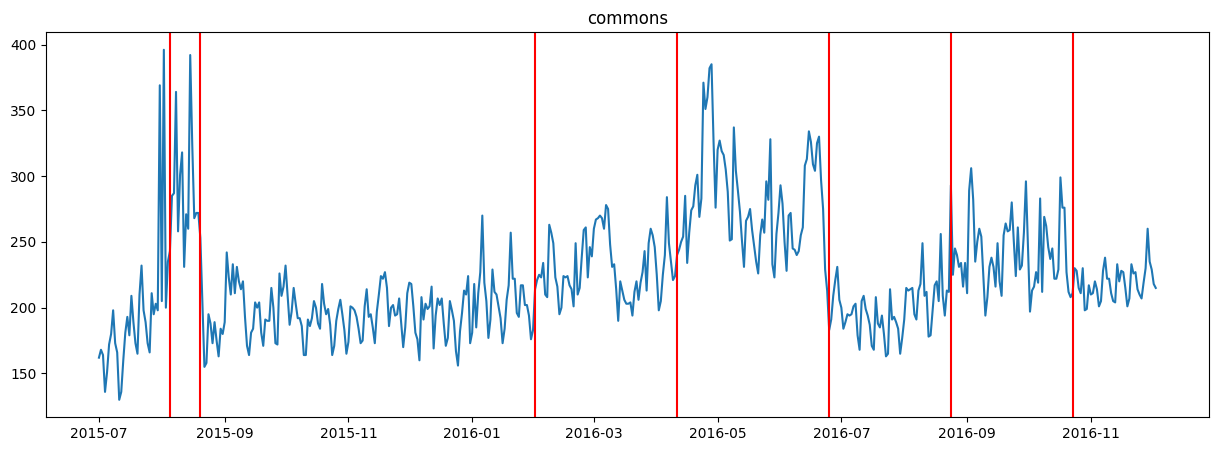

In [221]:
plt.figure(figsize = (15, 5))
plt.plot(commons_train_val['ds'], commons_train_val['y'])
for cp_date in commons_cp_dates:
  plt.axvline(cp_date, c = 'r')
plt.title('commons')
plt.show()

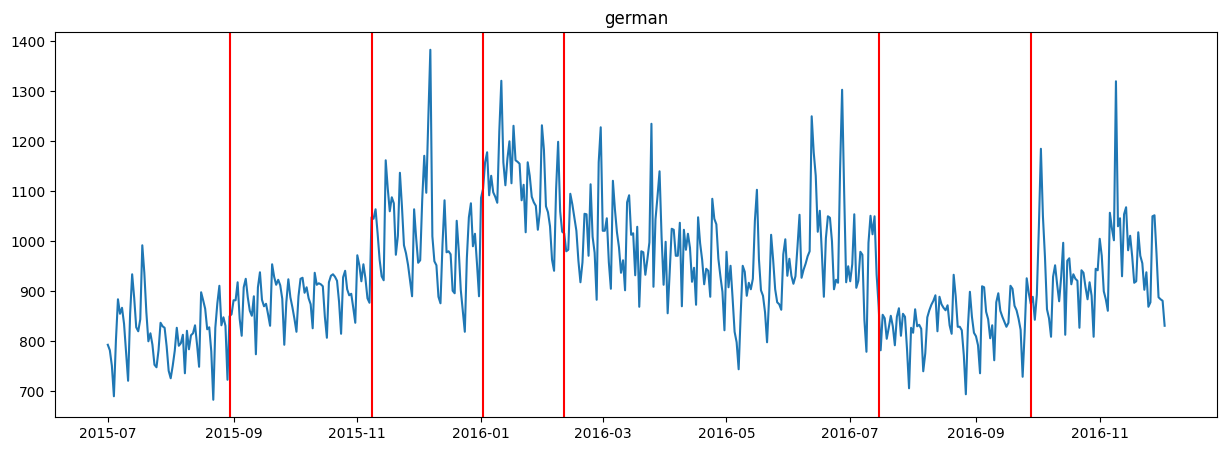

In [395]:
plt.figure(figsize = (15, 5))
plt.plot(german_train_val['ds'], german_train_val['y'])
for cp_date in german_cp_dates:
  plt.axvline(cp_date, c = 'r')
plt.title('german')
# plt.fill([pd.to_datetime('2016-01-01'), pd.to_datetime('2016-05-01')], [500, 2000])
plt.show()

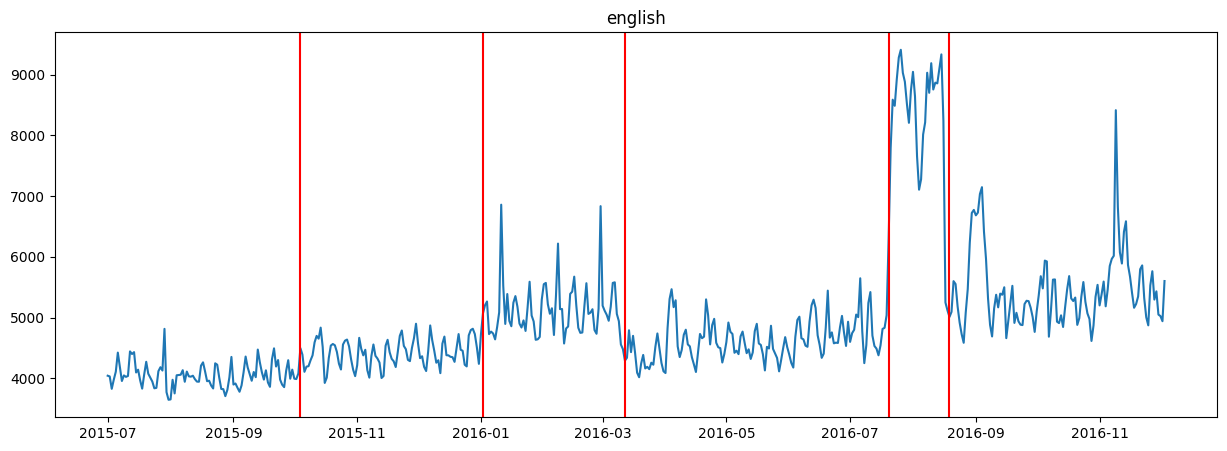

In [223]:
plt.figure(figsize = (15, 5))
plt.plot(english_train_val['ds'], english_train_val['y'])
for cp_date in english_cp_dates:
  plt.axvline(cp_date, c = 'r')
plt.title('english')
plt.show()

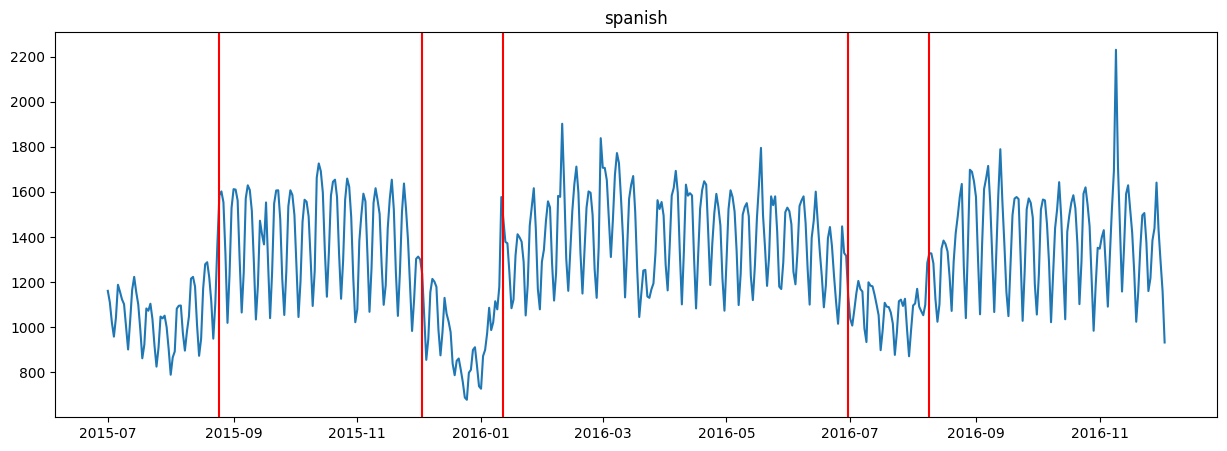

In [224]:
plt.figure(figsize = (15, 5))
plt.plot(spanish_train_val['ds'], spanish_train_val['y'])
for cp_date in spanish_cp_dates:
  plt.axvline(cp_date, c = 'r')
plt.title('spanish')
plt.show()

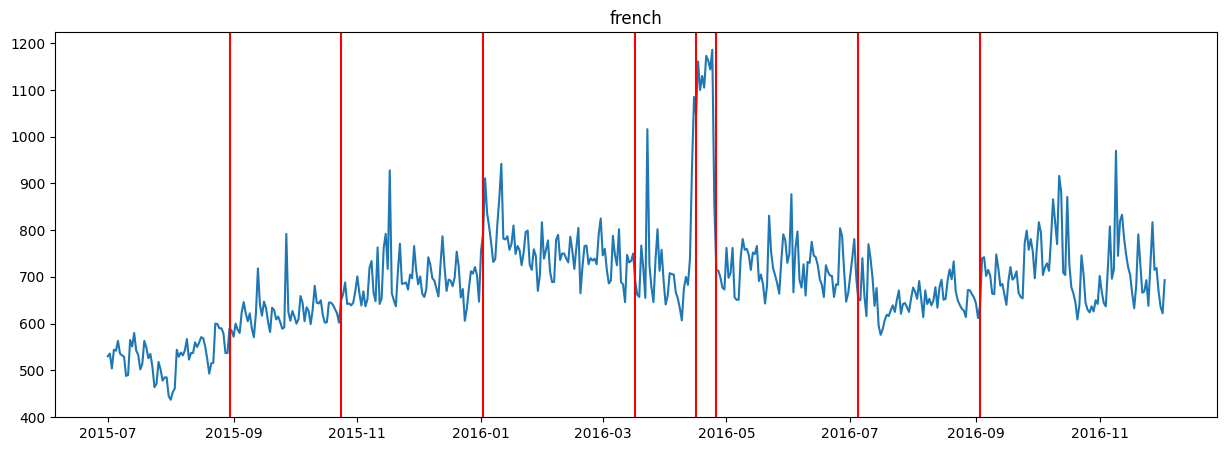

In [225]:
plt.figure(figsize = (15, 5))
plt.plot(french_train_val['ds'], french_train_val['y'])
for cp_date in french_cp_dates:
  plt.axvline(cp_date, c = 'r')
plt.title('french')
plt.show()

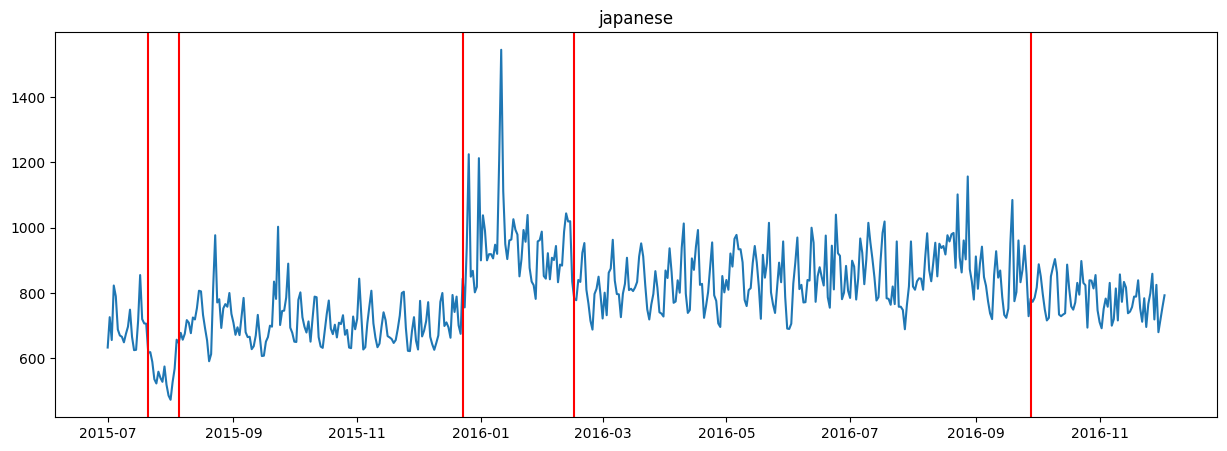

In [226]:
plt.figure(figsize = (15, 5))
plt.plot(japanese_train_val['ds'], japanese_train_val['y'])
for cp_date in japanese_cp_dates:
  plt.axvline(cp_date, c = 'r')
plt.title('japanese')
plt.show()

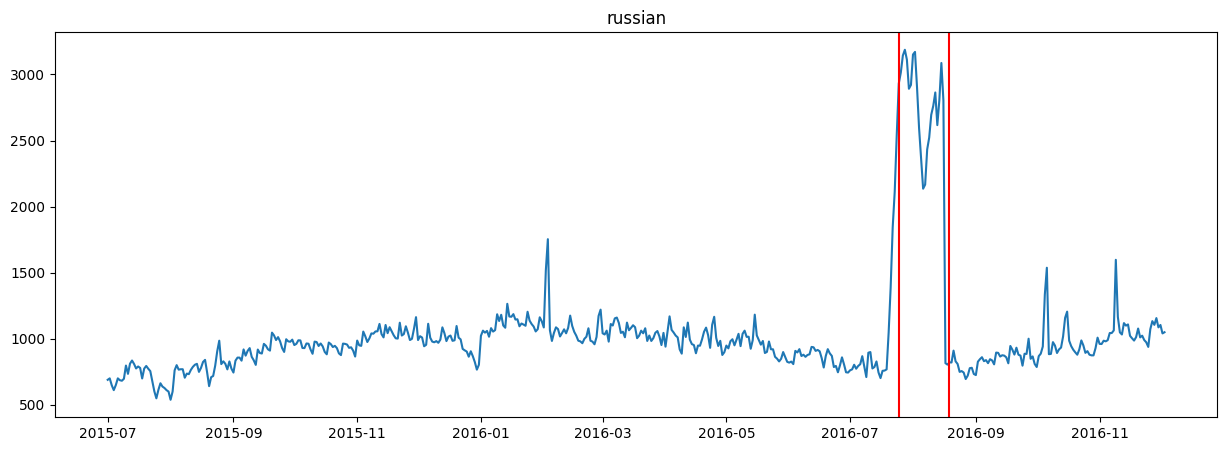

In [227]:
plt.figure(figsize = (15, 5))
plt.plot(russian_train_val['ds'], russian_train_val['y'])
for cp_date in russian_cp_dates:
  plt.axvline(cp_date, c = 'r')
plt.title('russian')
plt.show()

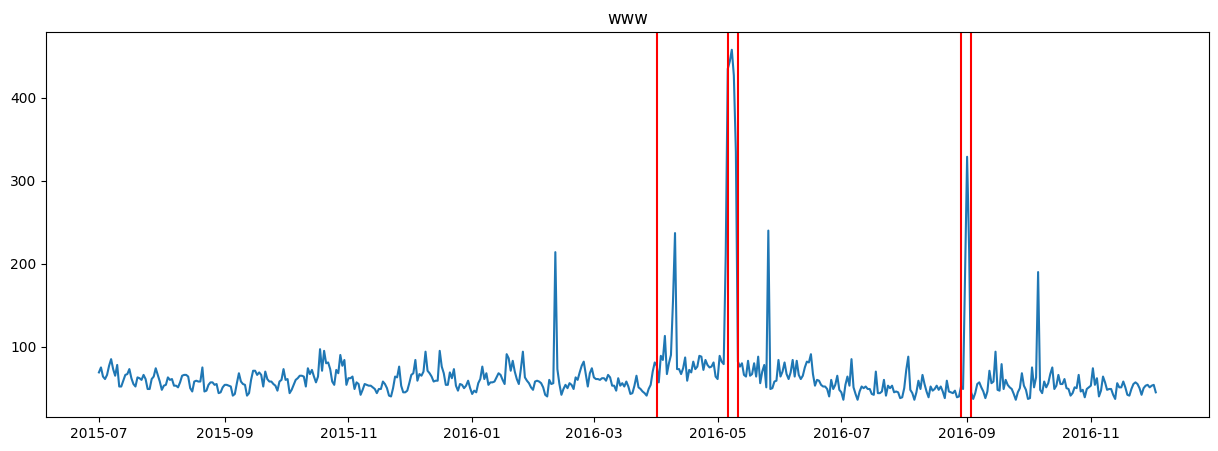

In [228]:
plt.figure(figsize = (15, 5))
plt.plot(www_train_val['ds'], www_train_val['y'])
for cp_date in www_cp_dates:
  plt.axvline(cp_date, c = 'r')
plt.title('www')
plt.show()

## **FbProphet**

In [229]:
import warnings
import logging
warnings.filterwarnings('ignore')
logging.getLogger('fbprophet').disabled = True
logging.propagate = False

## **commons**

#### **Training model**

In [254]:
commons_prophet_model = Prophet(yearly_seasonality = True, weekly_seasonality = True,
                                changepoints = commons_cp_dates)

commons_prophet_model.fit(commons_train_val)
commons_prophet_train_val_forecast = commons_prophet_model.predict(commons_train_val)
commons_prophet_test_forecast = commons_prophet_model.predict(commons_test)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz8b90_ne/9woi1ll2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz8b90_ne/0k0f59ta.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58186', 'data', 'file=/tmp/tmpz8b90_ne/9woi1ll2.json', 'init=/tmp/tmpz8b90_ne/0k0f59ta.json', 'output', 'file=/tmp/tmpz8b90_ne/prophet_modelyxtseftu/prophet_model-20231229190102.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:01:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:01:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


#### **Making predictions on the test data**

In [255]:
commons_test_date = commons_prophet_test_forecast['ds']
commons_test_pred = commons_prophet_test_forecast['yhat']
commons_test_y = commons_test['y']

#### **Plotting actual vs predicted values**

MAPE = 0.08474894750984639


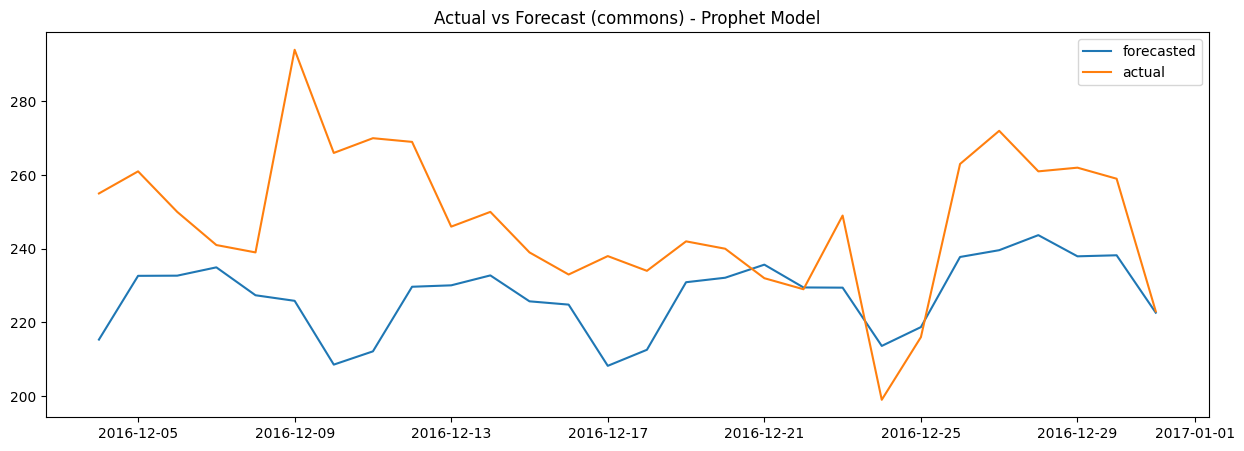

In [380]:
print(f'MAPE = {mean_absolute_percentage_error(commons_test_y, commons_test_pred)}')
plt.figure(figsize = (15, 5))
plt.plot(commons_test_date, commons_test_pred, label = 'forecasted')
plt.plot(commons_test_date, commons_test_y, label = 'actual')
plt.title('Actual vs Forecast (commons) - Prophet Model')
plt.legend()
plt.show()

## **german**

#### **Training model**

In [258]:
german_prophet_model = Prophet(yearly_seasonality = True, weekly_seasonality = True,
                                changepoints = german_cp_dates)

german_prophet_model.fit(german_train_val)
german_prophet_train_val_forecast = german_prophet_model.predict(german_train_val)
german_prophet_test_forecast = german_prophet_model.predict(german_test)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz8b90_ne/ot13er09.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz8b90_ne/7ib5dsuh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8901', 'data', 'file=/tmp/tmpz8b90_ne/ot13er09.json', 'init=/tmp/tmpz8b90_ne/7ib5dsuh.json', 'output', 'file=/tmp/tmpz8b90_ne/prophet_model6_t_3qsx/prophet_model-20231229190331.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:03:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:03:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
19:03:31 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during p

#### **Making predictions on the test data**

In [259]:
german_test_date = german_prophet_test_forecast['ds']
german_test_pred = german_prophet_test_forecast['yhat']
german_test_y = german_test['y']

#### **Plotting actual vs predicted values**

MAPE = 0.06617120271593452


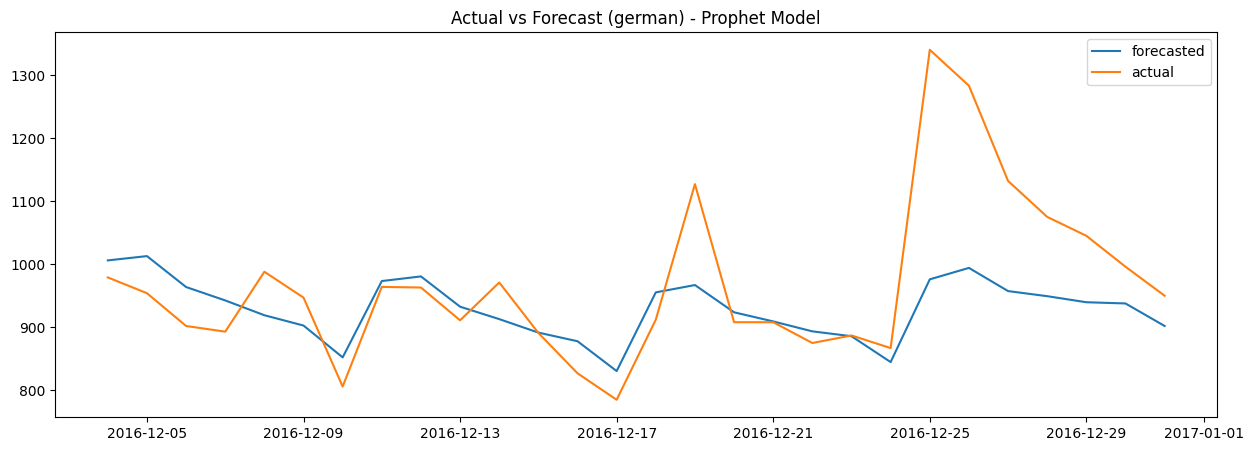

In [381]:
print(f'MAPE = {mean_absolute_percentage_error(german_test_y, german_test_pred)}')
plt.figure(figsize = (15, 5))
plt.plot(german_test_date, german_test_pred, label = 'forecasted')
plt.plot(german_test_date, german_test_y, label = 'actual')
plt.title('Actual vs Forecast (german) - Prophet Model')
plt.legend()
plt.show()

## **english**

#### **Training model**

In [278]:
english_prophet_model = Prophet(yearly_seasonality = True, weekly_seasonality = True,
                                changepoints = english_cp_dates)
english_prophet_model.add_regressor('Holiday')
english_prophet_model.fit(english_train_val)
english_prophet_train_val_forecast = english_prophet_model.predict(english_train_val)
english_prophet_test_forecast = english_prophet_model.predict(english_test)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz8b90_ne/vom042v2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz8b90_ne/gemfvnxz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24569', 'data', 'file=/tmp/tmpz8b90_ne/vom042v2.json', 'init=/tmp/tmpz8b90_ne/gemfvnxz.json', 'output', 'file=/tmp/tmpz8b90_ne/prophet_model14_nyqkk/prophet_model-20231229191422.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:14:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:14:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


#### **Making predictions on the test data**

In [2]:
english_test_date = english_prophet_test_forecast['ds']
english_test_pred = english_prophet_test_forecast['yhat']
english_test_y = english_test['y']

#### **Plotting actual vs predicted values**

MAPE = 0.05040141485489064


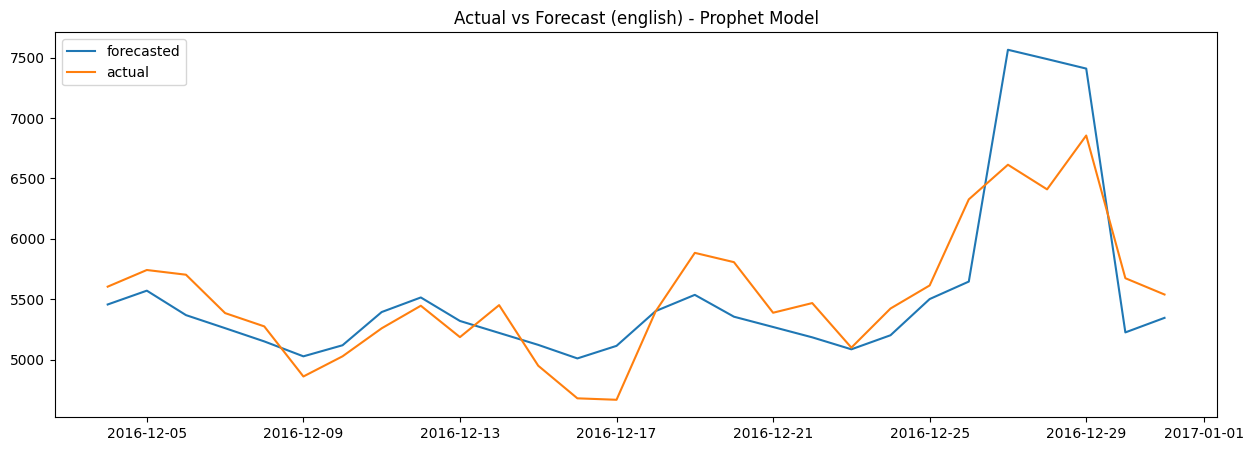

In [382]:
print(f'MAPE = {mean_absolute_percentage_error(english_test_y, english_test_pred)}')
plt.figure(figsize = (15, 5))
plt.plot(english_test_date, english_test_pred, label = 'forecasted')
plt.plot(english_test_date, english_test_y, label = 'actual')
plt.title('Actual vs Forecast (english) - Prophet Model')
plt.legend()
plt.show()

## **spanish**

#### **Training model**

In [344]:
spanish_prophet_model = Prophet(yearly_seasonality = True, weekly_seasonality = True,
                                changepoints = spanish_cp_dates)

spanish_prophet_model.fit(spanish_train_val)
spanish_prophet_train_val_forecast = spanish_prophet_model.predict(spanish_train_val)
spanish_prophet_test_forecast = spanish_prophet_model.predict(spanish_test)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz8b90_ne/uwwe9azs.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz8b90_ne/srmn6v0j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73110', 'data', 'file=/tmp/tmpz8b90_ne/uwwe9azs.json', 'init=/tmp/tmpz8b90_ne/srmn6v0j.json', 'output', 'file=/tmp/tmpz8b90_ne/prophet_model65d7otpv/prophet_model-20231229192015.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:20:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:20:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
19:20:15 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during 

#### **Making predictions on the test data**

In [345]:
spanish_test_date = spanish_prophet_test_forecast['ds']
spanish_test_pred = spanish_prophet_test_forecast['yhat']
spanish_test_y = spanish_test['y']

#### **Plotting actual vs predicted values**

MAPE = 0.10476969429912678


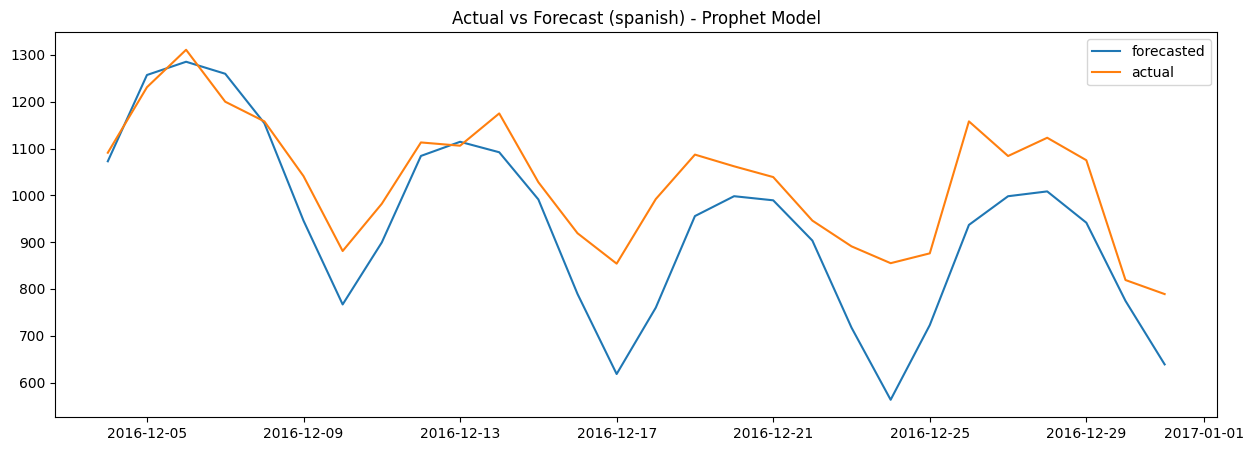

In [383]:
print(f'MAPE = {mean_absolute_percentage_error(spanish_test_y, spanish_test_pred)}')
plt.figure(figsize = (15, 5))
plt.plot(spanish_test_date, spanish_test_pred, label = 'forecasted')
plt.plot(spanish_test_date, spanish_test_y, label = 'actual')
plt.title('Actual vs Forecast (spanish) - Prophet Model')
plt.legend()
plt.show()

## **french**

#### **Training model**

In [268]:
french_prophet_model = Prophet(yearly_seasonality = True, weekly_seasonality = True,
                                changepoints = french_cp_dates)

french_prophet_model.fit(french_train_val)
french_prophet_train_val_forecast = french_prophet_model.predict(french_train_val)
french_prophet_test_forecast = french_prophet_model.predict(french_test)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz8b90_ne/_ywu_s3s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz8b90_ne/w21mfrq2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44739', 'data', 'file=/tmp/tmpz8b90_ne/_ywu_s3s.json', 'init=/tmp/tmpz8b90_ne/w21mfrq2.json', 'output', 'file=/tmp/tmpz8b90_ne/prophet_modeldemmyru0/prophet_model-20231229190923.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:09:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:09:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


#### **Making predictions on the test data**

In [270]:
french_test_date = french_prophet_test_forecast['ds']
french_test_pred = french_prophet_test_forecast['yhat']
french_test_y = french_test['y']

#### **Plotting actual vs predicted values**

MAPE = 0.07088104901730144


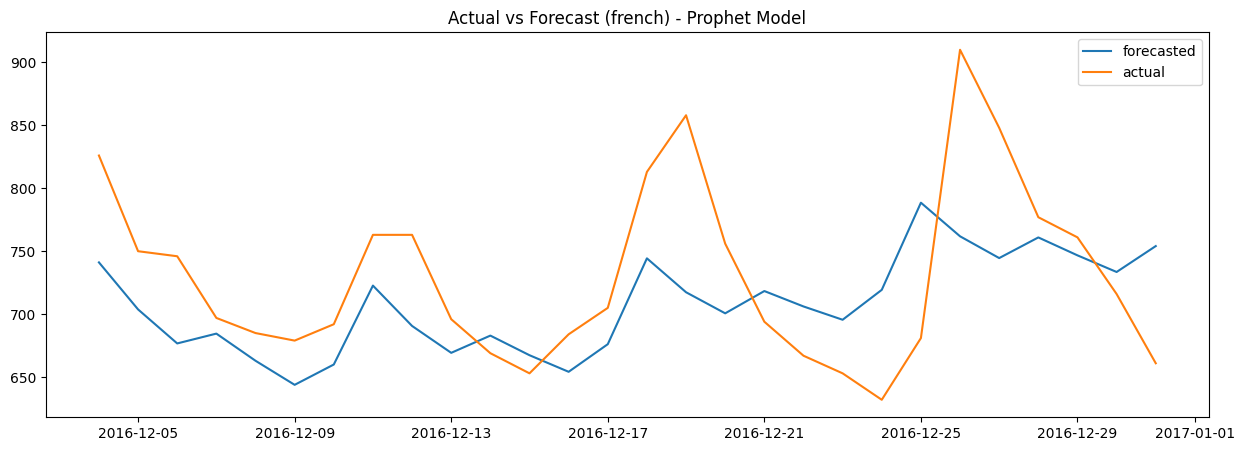

In [384]:
print(f'MAPE = {mean_absolute_percentage_error(french_test_y, french_test_pred)}')
plt.figure(figsize = (15, 5))
plt.plot(french_test_date, french_test_pred, label = 'forecasted')
plt.plot(french_test_date, french_test_y, label = 'actual')
plt.title('Actual vs Forecast (french) - Prophet Model')
plt.legend()
plt.show()

## **japanese**

#### **Training model**

In [319]:
japanese_prophet_model = Prophet(yearly_seasonality = True, weekly_seasonality = True,
                                changepoints = japanese_cp_dates)

japanese_prophet_model.fit(japanese_train_val)
japanese_prophet_train_val_forecast = japanese_prophet_model.predict(japanese_train_val)
japanese_prophet_test_forecast = japanese_prophet_model.predict(japanese_test)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz8b90_ne/0oojm2cj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz8b90_ne/toukfac9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63184', 'data', 'file=/tmp/tmpz8b90_ne/0oojm2cj.json', 'init=/tmp/tmpz8b90_ne/toukfac9.json', 'output', 'file=/tmp/tmpz8b90_ne/prophet_modeltdqbl843/prophet_model-20231229191838.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:18:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:18:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


#### **Making predictions on the test data**

In [320]:
japanese_test_date = japanese_prophet_test_forecast['ds']
japanese_test_pred = japanese_prophet_test_forecast['yhat']
japanese_test_y = japanese_test['y']

#### **Plotting actual vs predicted values**

MAPE = 0.0867951050545166


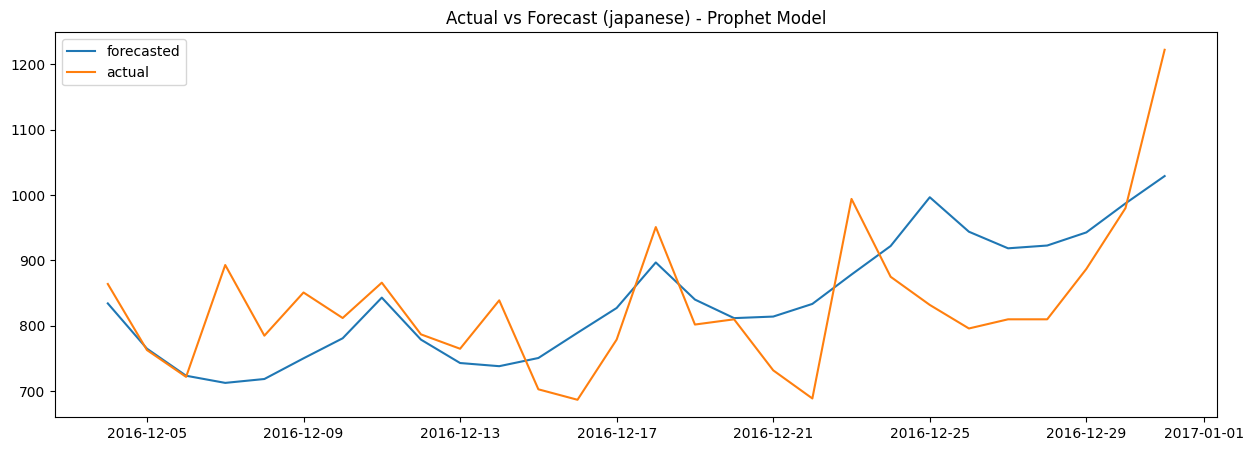

In [385]:
print(f'MAPE = {mean_absolute_percentage_error(japanese_test_y, japanese_test_pred)}')
plt.figure(figsize = (15, 5))
plt.plot(japanese_test_date, japanese_test_pred, label = 'forecasted')
plt.plot(japanese_test_date, japanese_test_y, label = 'actual')
plt.title('Actual vs Forecast (japanese) - Prophet Model')
plt.legend()
plt.show()

## **russian**

#### **Training model**

In [305]:
russian_prophet_model = Prophet(yearly_seasonality = True, weekly_seasonality = True, n_changepoints = 7)

russian_prophet_model.fit(russian_train_val)
russian_prophet_train_val_forecast = russian_prophet_model.predict(russian_train_val)
russian_prophet_test_forecast = russian_prophet_model.predict(russian_test)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz8b90_ne/sibziopn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz8b90_ne/advcvq1h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78869', 'data', 'file=/tmp/tmpz8b90_ne/sibziopn.json', 'init=/tmp/tmpz8b90_ne/advcvq1h.json', 'output', 'file=/tmp/tmpz8b90_ne/prophet_model9rldef4q/prophet_model-20231229191714.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:17:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:17:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
19:17:14 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during 

#### **Making predictions on the test data**

In [306]:
russian_test_date = russian_prophet_test_forecast['ds']
russian_test_pred = russian_prophet_test_forecast['yhat']
russian_test_y = russian_test['y']

#### **Plotting actual vs predicted values**

MAPE = 0.08699458912978927


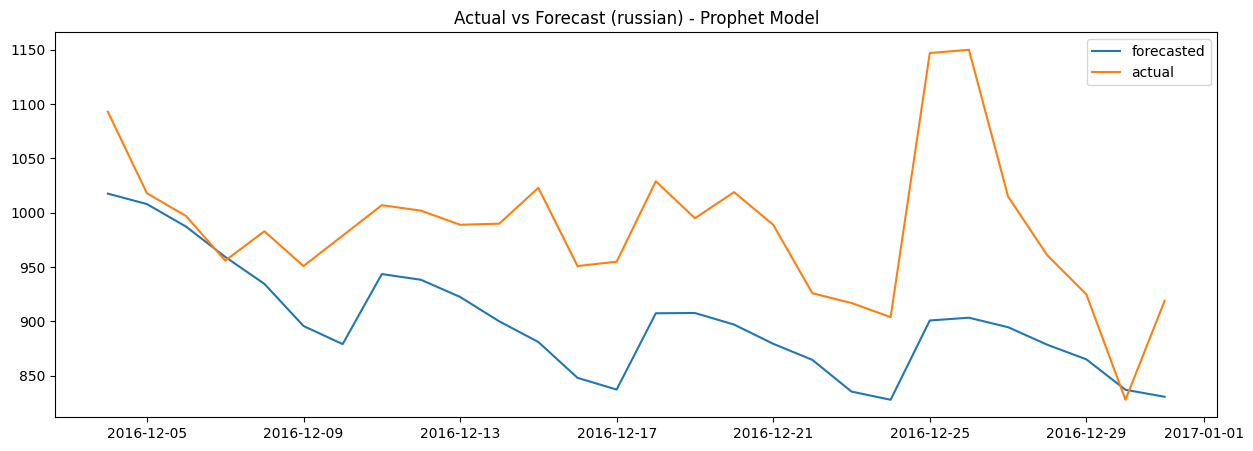

In [386]:
print(f'MAPE = {mean_absolute_percentage_error(russian_test_y, russian_test_pred)}')
plt.figure(figsize = (15, 5))
plt.plot(russian_test_date, russian_test_pred, label = 'forecasted')
plt.plot(russian_test_date, russian_test_y, label = 'actual')
plt.title('Actual vs Forecast (russian) - Prophet Model')
plt.legend()
plt.show()

## **www**

#### **Training model**

In [374]:
www_prophet_model = Prophet(yearly_seasonality = True, weekly_seasonality = True,
                            daily_seasonality = True, changepoints = www_cp_dates)

www_prophet_model.fit(www_train_val)
www_prophet_train_val_forecast = www_prophet_model.predict(www_train_val)
www_prophet_test_forecast = www_prophet_model.predict(www_test)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpz8b90_ne/lw8u_ijk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz8b90_ne/zhxdnpgh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53400', 'data', 'file=/tmp/tmpz8b90_ne/lw8u_ijk.json', 'init=/tmp/tmpz8b90_ne/zhxdnpgh.json', 'output', 'file=/tmp/tmpz8b90_ne/prophet_model5s0jmquu/prophet_model-20231229192430.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:24:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:24:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


#### **Making predictions on the test data**

In [375]:
www_test_date = www_prophet_test_forecast['ds']
www_test_pred = www_prophet_test_forecast['yhat']
www_test_y = www_test['y']

#### **Plotting actual vs predicted values**

MAPE = 0.3175548620556456


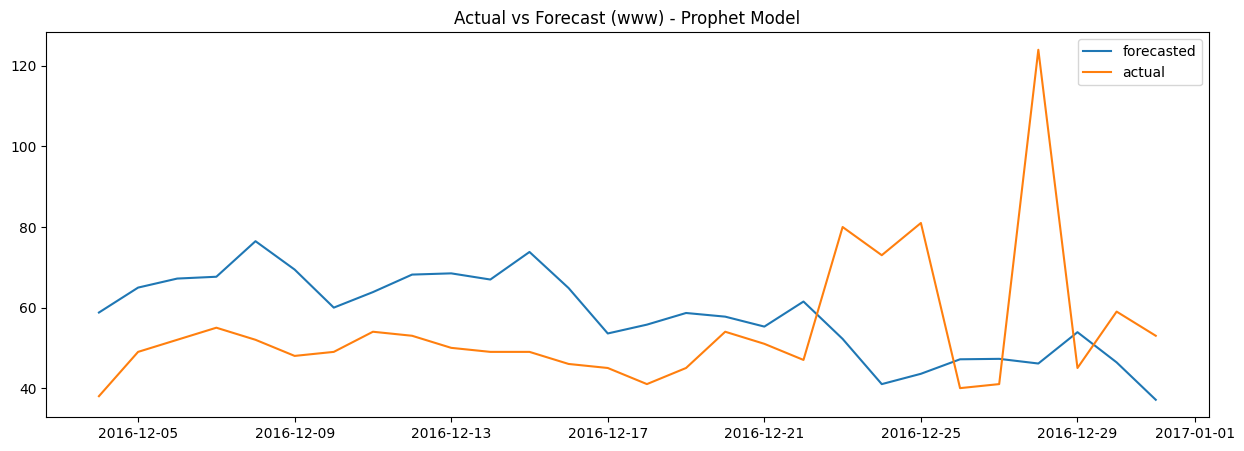

In [387]:
print(f'MAPE = {mean_absolute_percentage_error(www_test_y, www_test_pred)}')
plt.figure(figsize = (15, 5))
plt.plot(www_test_date, www_test_pred, label = 'forecasted')
plt.plot(www_test_date, www_test_y, label = 'actual')
plt.title('Actual vs Forecast (www) - Prophet Model')
plt.legend()
plt.show()

## **chinese**

#### **Training model**

In [377]:
chinese_prophet_model = Prophet(yearly_seasonality = True, weekly_seasonality = True,
                            daily_seasonality = True)

chinese_prophet_model.fit(chinese_train_val)
chinese_prophet_train_val_forecast = chinese_prophet_model.predict(chinese_train_val)
chinese_prophet_test_forecast = chinese_prophet_model.predict(chinese_test)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpz8b90_ne/jluj7x92.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz8b90_ne/ysu6ep8o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79910', 'data', 'file=/tmp/tmpz8b90_ne/jluj7x92.json', 'init=/tmp/tmpz8b90_ne/ysu6ep8o.json', 'output', 'file=/tmp/tmpz8b90_ne/prophet_modeli1filzsf/prophet_model-20231229192521.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:25:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:25:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


#### **Making predictions on the test data**

In [378]:
chinese_test_date = chinese_prophet_test_forecast['ds']
chinese_test_pred = chinese_prophet_test_forecast['yhat']
chinese_test_y = chinese_test['y']

#### **Plotting actual vs predicted values**

MAPE = 0.08572376008908052


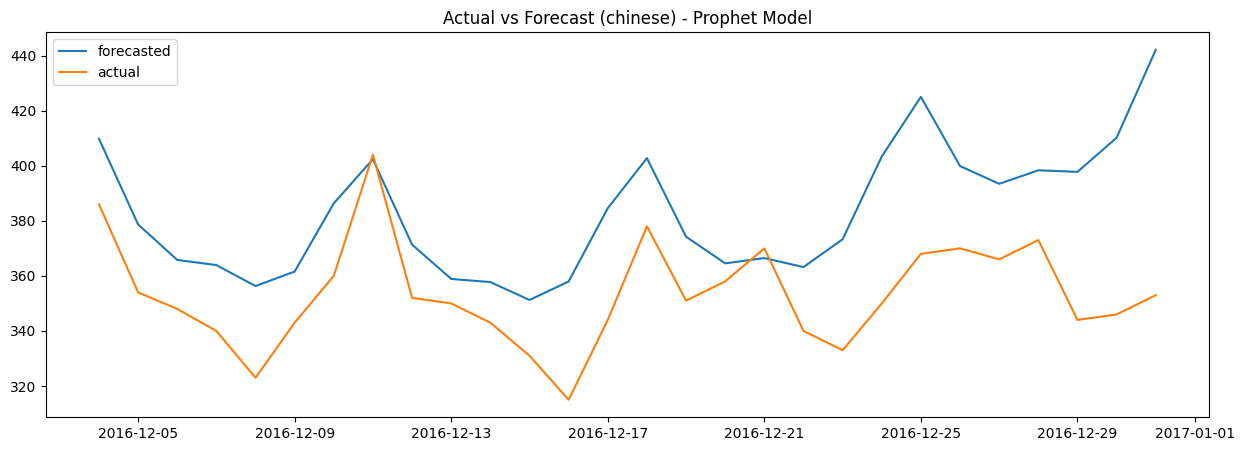

In [388]:
print(f'MAPE = {mean_absolute_percentage_error(chinese_test_y, chinese_test_pred)}')
plt.figure(figsize = (15, 5))
plt.plot(chinese_test_date, chinese_test_pred, label = 'forecasted')
plt.plot(chinese_test_date, chinese_test_y, label = 'actual')
plt.title('Actual vs Forecast (chinese) - Prophet Model')
plt.legend()
plt.show()

## **Comparison of ARIMA, SARIMA/SARIMAX and FB Prophet**

### **1. `"commons" :`**
### **`MAPE (ARIMA) = 9.3 %`**
### **`MAPE (SARIMA) = 8 %`**
### **`MAPE (FB Prophet) = 8.4 %`**

### **2. `"german" :`**
### **`MAPE (ARIMA) = 7.3 %`**
### **`MAPE (SARIMA) = 7.9 %`**
### **`MAPE (FB Prophet) = 6.6 %`**

### **3. `"english" :`**
### **`MAPE (ARIMA) = 6.7 %`**
### **`MAPE (SARIMA) = 5 %`**
### **`MAPE (FB Prophet) = 5 %`**

### **4. `"spanish" :`**
### **`MAPE (ARIMA) = 20.6 %`**
### **`MAPE (SARIMA) = 20.7 %`**
### **`MAPE (FB Prophet) = 10.5 %`**

### **5. `"french" :`**
### **`MAPE (ARIMA) = 7.4 %`**
### **`MAPE (SARIMA) = 7.1 %`**
### **`MAPE (FB Prophet) = 7.1 %`**

### **6. `"japanese" :`**
### **`MAPE (ARIMA) = 8.7 %`**
### **`MAPE (SARIMA) = 7.7 %`**
### **`MAPE (FB Prophet) = 8.6 %`**

### **7. `"russian" :`**
### **`MAPE (ARIMA) = 9.2 %`**
### **`MAPE (SARIMA) = 11 %`**
### **`MAPE (FB Prophet) = 8.6 %`**

### **8. `"www" :`**
### **`MAPE (ARIMA) = 15.6 %`**
### **`MAPE (SARIMA) = 15.6 %`**
### **`MAPE (FB Prophet) = 31.7 %`**

### **9. `"chinese" :`**
### **`MAPE (ARIMA) = 4.7 %`**
### **`MAPE (SARIMA) = 4.5 %`**
### **`MAPE (FB Prophet) = 8.5 %`**

## **Creating a pipeline for working with multiple series**

In [ ]:
# Function for missing value imputation by weekday
# - Take just previous non-null value (from the same weekday) and take just next non-null value (from the same weekday)
# - Impute the missing value with the mean of these two values
def interpolate_by_weekday(df):
    import numpy as np
    import pandas as pd
    for page in df.columns:
        for date in df.index:
            if np.isnan(df.loc[date, page]):
                weekly_prev_not_null_val = np.nan
                weekly_next_not_null_val = np.nan
                imputed_val = np.nan
                week_cnt = 1
                prev_date = date
                next_date = date
                min_date = min(df.index)
                max_date = max(df.index)
        while min_date <= prev_date <= max_date and min_date <= next_date <= max_date:
            prev_date = date - pd.Timedelta(weeks = week_cnt)
            next_date = date + pd.Timedelta(weeks = week_cnt)
            if prev_date >= min_date and prev_date <= max_date:
                prev_week_val = df.loc[prev_date, page]
            else:
                prev_week_val = np.nan
            if next_date >= min_date and next_date <= max_date:
                next_week_val = df.loc[next_date, page]
            else:
                next_week_val = np.nan
            if np.isnan(weekly_prev_not_null_val) and not np.isnan(prev_week_val):
                weekly_prev_not_null_val = prev_week_val
            if np.isnan(weekly_next_not_null_val) and not np.isnan(next_week_val):
                weekly_next_not_null_val = next_week_val
            if not (np.isnan(weekly_prev_not_null_val) or np.isnan(weekly_next_not_null_val)):
                break
            else:
                week_cnt += 1
        if np.isnan(weekly_prev_not_null_val) and not np.isnan(weekly_next_not_null_val):
            imputed_val = weekly_next_not_null_val
        elif np.isnan(weekly_next_not_null_val) and not np.isnan(weekly_prev_not_null_val):
            imputed_val = weekly_prev_not_null_val
        else:
            if not np.isnan(weekly_next_not_null_val) and not np.isnan(weekly_prev_not_null_val):
                imputed_val = (weekly_prev_not_null_val + weekly_next_not_null_val)/2

        df.loc[date, page] = imputed_val


def multi_forecast(multi_series, null_thresh = 0.2, test_size = 28, exog = None, order = (1, 0, 0), seasonal_order = (0, 0, 0, 0)):
    import numpy as np
    import pandas as pd
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import mean_absolute_percentage_error
    from statsmodels.tsa.statespace.sarimax import SARIMAX

    n = multi_series.shape[0]
    if null_thresh > 1:
        null_thresh /= n

    if validation_size < 1:
        validation_size *= n
    if test_size < 1:
        test_size *= n

    # Segregating "language", "access_origin" and "access_type" from "page"
    multi_series['language'] = v['Page'].str.split('_').str[-3].str.split('.').str[0]
    multi_series['access_origin'] = multi_series['Page'].str.split('_').str[-1]
    multi_series['access_type'] = multi_series['Page'].str.split('_').str[-2]

    # Dropping the records for those pages for which more than 20 % of the values are missing.
    multi_series.drop(multi_series[(multi_series.iloc[:, 1:].isnull().sum(axis = 1)\
                                            > null_thresh * n)].index, inplace = True)
    multi_series.reset_index(drop = True, inplace = True)

    # Making a DataFrame with missing values imputed by linear interpolation
    df_filled_by_interpolation = multi_series.set_index('Page').T.iloc[: -3, :]
    df_filled_by_interpolation.index = (df_filled_by_interpolation.index).astype('datetime64[ns]')
    df_filled_by_interpolation = df_filled_by_interpolation.astype('float64').interpolate(limit_direction = 'both')

    # Making a DataFrame in which missing values will be imputed by interpolation by weekday.
    df_filled_by_weekday = multi_series.set_index('Page').T.iloc[: -3, :]
    df_filled_by_weekday.index = (df_filled_by_weekday.index).astype('datetime64[ns]')
    df_filled_by_weekday = df_filled_by_weekday.astype('float64')

    # Calling the function which will impute taking weekly seasonality into account.
    interpolate_by_weekday(df_filled_by_weekday)

    # Taking mean of above two DataFrames to preserve both short term trend and weekly seasonality while imputing missing values
    imputed_df = ((df_filled_by_interpolation + df_filled_by_weekday)/2).round().T
    multi_series.iloc[:, :-3] = imputed_df.loc[:, :].values

    # Aggregating on laguage and taking mean of page visits and then pivoting.
    final_df = multi_series.drop(columns = ['Page', 'access_origin', 'access_type'])
    final_df = final_df.groupby('language').mean().round().T
    final_df.columns.name = None
    final_df.index.name = 'date'

    # Storing all the unique languages in an array
    unique_languages = np.unique(df['language'])

    series_by_language = []

    for language in unique_languages:
        series = final_df[language] # Filtering the series for each language
        series_by_language.append(series)  # Appending time series for each language in list "language"

    train_test_sets_by_language = []

    # Data Splitting into train and test sets for each language**
    for series in series_by_language:
        train, test = train_test_split(series, test_size = test_size, shuffle = False)
        sets = [train, test]
        train_test_sets_by_language.append(sets)

    train_test_sets_by_language.clear()

    # Splitting exogenous data into train and test sets**
    if exog is not None:
        exog_train, exog_test = train_test_split(exog, test_size = test_size, shuffle = False)

    # A dictionary store the forecasts, MAPE and ARIMA/SARIMA/SARIMAX models for each language
    forecasts_n_mapes = {language: {'mape': 0, 'forecast': 0, 'model_fit': 0} for language in unique_languages}

    idx = 0

    # Iterating over each of the language time series
    for language_sets in train_test_sets_by_language:
        language = unique_languages[idx]
        train, test = language_sets
        if exog is not None:
            # Training ARIMA/SARIMA/SARIMAX model on train data
            sarimax_model = SARIMAX(train, exog = exog_train, order = order,
                                    seasonal_order = seasonal_order,
                                    enforce_stationarity = False, enforce_invertibility = False)

            sarimax_model_fit = sarimax_model.fit()

            # Forecasting for test data and evaluating MAPE.
            test_pred = sarimax_model_fit.forecast(test_size, exog = exog_test)
            mape = mean_absolute_percentage_error(test, test_pred)

            # Populating the dictionary "forecasts_n_mapes" with MAPE, test predictions and models of each language
            forecasts_n_mapes[language]['mape'] = mape
            forecasts_n_mapes[language]['forecast'] = test_pred
            forecasts_n_mapes[language]['model_fit'] = sarimax_model_fit

        else:
            sarimax_model = SARIMAX(train, order = order, seasonal_order = seasonal_order,
                                    enforce_stationarity = False, enforce_invertibility = False)

            sarimax_model_fit = sarimax_model.fit()
            test_pred = sarimax_model_fit.forecast(test_size)
            mape = mean_absolute_percentage_error(test, test_pred)

        forecasts_n_mapes[language]['mape'] = mape
        forecasts_n_mapes[language]['forecast'] = test_pred
        forecasts_n_mapes[language]['model_fit'] = sarimax_model_fit

    return forecasts_n_mapes

***

## **Defining the problem statements and where can this and modifications of this be used?**

### **The problem statement is to help businesses promote themselves easily, effectively, and economically and for that, we'll have to understand the per page view report for different wikipedia pages for 550 days, and forecast the number of views so that we can predict and optimize the ad placement for your clients. This problem statement can be used in ad placement where ROAS (Return on Ad Spend) matters very much.**

***

## **What does the decomposition of series do?**

- ## **Decomposition of series gives us the different components of a time series by breaking it down into `trend` (which tells us the overall direction), `seasonality` (any repetitive pattern in the time series) and `residuals` (the unmodelled effect)**

****

## **What level of differencing gave you a stationary series?**

- ### **Level 1 differencing gave us a stationary time series**

****

## **Difference between `ARIMA`, `SARIMA` & `SARIMAX`**

- **`ARIMA : ` ARIMA is made up of three parts i.e. AR (Autoregression), I (Integrated) and MA (Moving Average)**
  - **`AR (AutoRegression) : ` AR takes weighted average of previous few terms (lags) where the weights are computed by fitting the best fit regression line.**
  - **`MA (Moving Average) : ` MA takes weighted average of error of prediction for previous few terms (lags) where the weights are again computed by fitting the best fit regression line.**
  - **`I (Integrated) : ` I just make the time series stationary for forecasting and then again de-stationarize it**

- **`SARIMA : ` SARIMA is nothing but `Seasonal ARIMA` which mathematically means that in addition to `AR` and `MA` terms, `SAR (Seasonal AR)` and `SMA (Seasonal Moving Average)` terms are also included.**
  - **`SAR (Seasonal AR) : ` SAR takes weighted average of error of prediction for previous few terms (lags) but with jump size = seasonality where the weights are again computed by fitting the best fit regression line.**
  - **`SMA (Seasonal Moving Average) : ` SMA takes weighted average of error of prediction for previous few terms (lags) but with jump size = seasonality where the weights are again computed by fitting the best fit regression line.**

- **`SARIMAX : ` SARIMAX is nothing but SARIMA with exogenous feature which has a strong correlation with the target variable**



***

## **Compare the number of views in different languages**
- We'll compare average number of views per page for each language in the last 28 days.
- **`"English"`** language has maximum number of views per page in the last 28 days. So in other words, English Wikipedia Pages are most investable.

In [19]:
last_month_avg_views = final_df.iloc[-28:, :]
last_month_avg_views = pd.melt(last_month_avg_views, id_vars = ['date'], value_vars = [col for col in last_month_avg_views if col != 'date'], var_name = 'language', value_name = 'avg_views')

In [20]:
last_month_avg_views = last_month_avg_views.groupby('language')['avg_views'].mean().round().to_frame().reset_index()

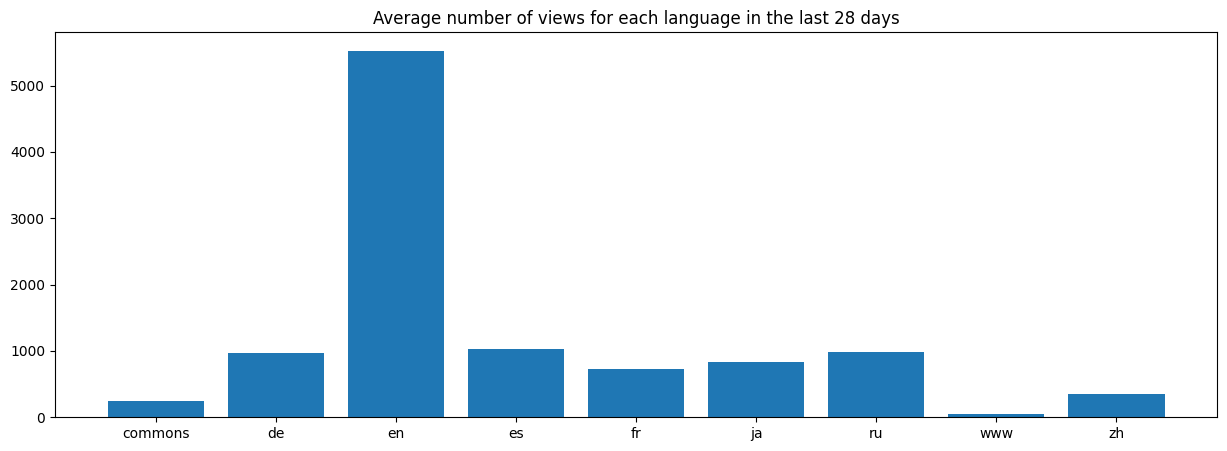

In [24]:
plt.figure(figsize = (15, 5))
plt.bar(last_month_avg_views['language'], height = last_month_avg_views['avg_views'])
plt.title('Average number of views for each language in the last 28 days')
plt.show()

***

## **What other methods other than grid search would be suitable to get the model for all languages?**

- ### **We can use `skforecast.model_selection_statsmodels.grid_search_sarimax` in place of GridSearchCV` for ARIMA/SARIMA/SARIMAX**

- ### **Or we can define custom functions for the same as below :**

In [ ]:
def sarimax_forecast(x_train, config, forecast_period, exog_train = None, exog_test = None):
    import numpy as np
    import pandas as pd
    from statsmodels.tsa.statespace.sarimax import SARIMAX
    order, seasonal_order = config
    # define model
    if exog_train is not None and exog_test is not None:
        model = SARIMAX(x_train, order = order, seasonal_order = seasonal_order,
                        exog = exog_train, enforce_stationarity = False,
                        enforce_invertibility = False)
    else:
        model = SARIMAX(x_train, order = order, seasonal_order = seasonal_order,
                        enforce_stationarity = False, enforce_invertibility = False)
    # fit model
    model_fit = model.fit()
    # forecast
    yhat = model_fit.forecast(forecast_period, exog = exog_test)
    return yhat


# walk-forward validation for univariate data
def sarimax_walk_forward_validation(x_train, x_test, config, exog_train = None, exog_test = None):
    import numpy as np
    import pandas as pd
    from sklearn.metrics import mean_absolute_percentage_error

    forecast_period = len(x_test)
    if exog_train is not None and exog_test is not None:
        predictions = sarimax_forecast(x_train, config, forecast_period, exog_train, exog_test)
    else:
        predictions = sarimax_forecast(x_train, config, forecast_period)
    error = mean_absolute_percentage_error(x_test, predictions)
    return error


# score a model
def sarimax_score_model(x_train, x_test, config, exog_train = None, exog_test = None):
  # convert config to a key
    if exog_train is not None and exog_test is not None:
        result = sarimax_walk_forward_validation(x_train, x_test, config, exog_train, exog_test)
    else:
        result = sarimax_walk_forward_validation(x_train, x_test, config)
    return (config, result)

# grid search configs
def sarimax_grid_search(x_train, cfg_list, x_test, exog_train = None, exog_test = None, parallel = False):
    from multiprocessing import cpu_count
    from joblib import Parallel
    from joblib import delayed
    import warnings
    warnings.filterwarnings('ignore')

    scores = None
    if parallel:
    # execute configs in parallel
    executor = Parallel(n_jobs = cpu_count(), backend = 'multiprocessing')
    if exog_train is not None and exog_test is not None:
        tasks = (delayed(sarimax_score_model)(x_train, x_test, config, exog_train, exog_test)
                 for config in cfg_list)
    else:
        tasks = (delayed(sarimax_score_model)(x_train, x_test, config) for config in cfg_list)
    scores = executor(tasks)
    else:
        if exog_train is not None and exog_test is not None:
            scores = [sarimax_score_model(x_train, x_test, config, exog_train, exog_test)
                      for config in cfg_list]
    else:
        scores = [sarimax_score_model(x_train, x_test, config) for config in cfg_list]
  # sort configs by error, asc
    scores.sort(key = lambda tup: tup[1])
    return scores

# create a set of arima configs to try
def sarimax_configs(p_params, d_params, q_params, P_params, D_params, Q_params, s_params):
    if type(p_params) == int:
        p_params = [p_params]
    if type(d_params) == int:
        d_params = [d_params]
    if type(q_params) == int:
        q_params = [q_params]
    if type(P_params) == int:
        P_params = [P_params]
    if type(D_params) == int:
        D_params = [D_params]
    if type(Q_params) == int:
        Q_params = [Q_params]
    if type(s_params) == int:
        s_params = [s_params]
    models = []

    # create config instances
    for p in p_params:
        for d in d_params:
            for q in q_params:
                for P in P_params:
                    for D in D_params:
                        for Q in Q_params:
                            for s in s_params:
                                order  = (p,d,q)
                                seasonal_order = (P, D, Q, s)
                                models.append([order, seasonal_order])
    return models